# Face Generation

In this project, you'll define and train a DCGAN on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The project will be broken down into a series of tasks from **loading in data to defining and training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

### Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset is more complex than the number datasets (like MNIST or SVHN) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

### Pre-processed Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='assets/processed_face_data.png' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that you'll need to extract in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed_celeba_small/`

In [8]:
# can comment out after executing
!unzip processed_celeba_small.zip

Archive:  processed_celeba_small.zip
   creating: processed_celeba_small/
  inflating: processed_celeba_small/.DS_Store  
   creating: __MACOSX/processed_celeba_small/
  inflating: __MACOSX/processed_celeba_small/._.DS_Store  
   creating: processed_celeba_small/celeba/
  inflating: processed_celeba_small/celeba/.DS_Store  
   creating: __MACOSX/processed_celeba_small/celeba/
  inflating: __MACOSX/processed_celeba_small/celeba/._.DS_Store  
  inflating: processed_celeba_small/celeba/161979.jpg  
  inflating: processed_celeba_small/celeba/161980.jpg  
  inflating: processed_celeba_small/celeba/161981.jpg  
  inflating: processed_celeba_small/celeba/161982.jpg  
  inflating: processed_celeba_small/celeba/161983.jpg  
  inflating: processed_celeba_small/celeba/161984.jpg  
  inflating: processed_celeba_small/celeba/161985.jpg  
  inflating: processed_celeba_small/celeba/161986.jpg  
  inflating: processed_celeba_small/celeba/161987.jpg  
  inflating: processed_celeba_small/celeba/161988.j

  inflating: processed_celeba_small/celeba/162159.jpg  
  inflating: processed_celeba_small/celeba/162160.jpg  
  inflating: processed_celeba_small/celeba/162161.jpg  
  inflating: processed_celeba_small/celeba/162162.jpg  
  inflating: processed_celeba_small/celeba/162163.jpg  
  inflating: processed_celeba_small/celeba/162164.jpg  
  inflating: processed_celeba_small/celeba/162165.jpg  
  inflating: processed_celeba_small/celeba/162166.jpg  
  inflating: processed_celeba_small/celeba/162167.jpg  
  inflating: processed_celeba_small/celeba/162168.jpg  
  inflating: processed_celeba_small/celeba/162169.jpg  
  inflating: processed_celeba_small/celeba/162170.jpg  
  inflating: processed_celeba_small/celeba/162171.jpg  
  inflating: processed_celeba_small/celeba/162172.jpg  
  inflating: processed_celeba_small/celeba/162173.jpg  
  inflating: processed_celeba_small/celeba/162174.jpg  
  inflating: processed_celeba_small/celeba/162175.jpg  
  inflating: processed_celeba_small/celeba/16217

  inflating: processed_celeba_small/celeba/162405.jpg  
  inflating: processed_celeba_small/celeba/162406.jpg  
  inflating: processed_celeba_small/celeba/162407.jpg  
  inflating: processed_celeba_small/celeba/162408.jpg  
  inflating: processed_celeba_small/celeba/162409.jpg  
  inflating: processed_celeba_small/celeba/162410.jpg  
  inflating: processed_celeba_small/celeba/162411.jpg  
  inflating: processed_celeba_small/celeba/162412.jpg  
  inflating: processed_celeba_small/celeba/162413.jpg  
  inflating: processed_celeba_small/celeba/162414.jpg  
  inflating: processed_celeba_small/celeba/162415.jpg  
  inflating: processed_celeba_small/celeba/162416.jpg  
  inflating: processed_celeba_small/celeba/162417.jpg  
  inflating: processed_celeba_small/celeba/162418.jpg  
  inflating: processed_celeba_small/celeba/162419.jpg  
  inflating: processed_celeba_small/celeba/162420.jpg  
  inflating: processed_celeba_small/celeba/162421.jpg  
  inflating: processed_celeba_small/celeba/16242

  inflating: processed_celeba_small/celeba/162587.jpg  
  inflating: processed_celeba_small/celeba/162588.jpg  
  inflating: processed_celeba_small/celeba/162589.jpg  
  inflating: processed_celeba_small/celeba/162590.jpg  
  inflating: processed_celeba_small/celeba/162591.jpg  
  inflating: processed_celeba_small/celeba/162592.jpg  
  inflating: processed_celeba_small/celeba/162593.jpg  
  inflating: processed_celeba_small/celeba/162594.jpg  
  inflating: processed_celeba_small/celeba/162595.jpg  
  inflating: processed_celeba_small/celeba/162596.jpg  
  inflating: processed_celeba_small/celeba/162597.jpg  
  inflating: processed_celeba_small/celeba/162598.jpg  
  inflating: processed_celeba_small/celeba/162599.jpg  
  inflating: processed_celeba_small/celeba/162600.jpg  
  inflating: processed_celeba_small/celeba/162601.jpg  
  inflating: processed_celeba_small/celeba/162602.jpg  
  inflating: processed_celeba_small/celeba/162603.jpg  
  inflating: processed_celeba_small/celeba/16260

  inflating: processed_celeba_small/celeba/162794.jpg  
  inflating: processed_celeba_small/celeba/162795.jpg  
  inflating: processed_celeba_small/celeba/162796.jpg  
  inflating: processed_celeba_small/celeba/162797.jpg  
  inflating: processed_celeba_small/celeba/162798.jpg  
  inflating: processed_celeba_small/celeba/162799.jpg  
  inflating: processed_celeba_small/celeba/162800.jpg  
  inflating: processed_celeba_small/celeba/162801.jpg  
  inflating: processed_celeba_small/celeba/162802.jpg  
  inflating: processed_celeba_small/celeba/162803.jpg  
  inflating: processed_celeba_small/celeba/162804.jpg  
  inflating: processed_celeba_small/celeba/162805.jpg  
  inflating: processed_celeba_small/celeba/162806.jpg  
  inflating: processed_celeba_small/celeba/162807.jpg  
  inflating: processed_celeba_small/celeba/162808.jpg  
  inflating: processed_celeba_small/celeba/162809.jpg  
  inflating: processed_celeba_small/celeba/162810.jpg  
  inflating: processed_celeba_small/celeba/16281

  inflating: processed_celeba_small/celeba/162966.jpg  
  inflating: processed_celeba_small/celeba/162967.jpg  
  inflating: processed_celeba_small/celeba/162968.jpg  
  inflating: processed_celeba_small/celeba/162969.jpg  
  inflating: processed_celeba_small/celeba/162970.jpg  
  inflating: processed_celeba_small/celeba/162971.jpg  
  inflating: processed_celeba_small/celeba/162972.jpg  
  inflating: processed_celeba_small/celeba/162973.jpg  
  inflating: processed_celeba_small/celeba/162974.jpg  
  inflating: processed_celeba_small/celeba/162975.jpg  
  inflating: processed_celeba_small/celeba/162976.jpg  
  inflating: processed_celeba_small/celeba/162977.jpg  
  inflating: processed_celeba_small/celeba/162978.jpg  
  inflating: processed_celeba_small/celeba/162979.jpg  
  inflating: processed_celeba_small/celeba/162980.jpg  
  inflating: processed_celeba_small/celeba/162981.jpg  
  inflating: processed_celeba_small/celeba/162982.jpg  
  inflating: processed_celeba_small/celeba/16298

  inflating: processed_celeba_small/celeba/163123.jpg  
  inflating: processed_celeba_small/celeba/163124.jpg  
  inflating: processed_celeba_small/celeba/163125.jpg  
  inflating: processed_celeba_small/celeba/163126.jpg  
  inflating: processed_celeba_small/celeba/163127.jpg  
  inflating: processed_celeba_small/celeba/163128.jpg  
  inflating: processed_celeba_small/celeba/163129.jpg  
  inflating: processed_celeba_small/celeba/163130.jpg  
  inflating: processed_celeba_small/celeba/163131.jpg  
  inflating: processed_celeba_small/celeba/163132.jpg  
  inflating: processed_celeba_small/celeba/163133.jpg  
  inflating: processed_celeba_small/celeba/163134.jpg  
  inflating: processed_celeba_small/celeba/163135.jpg  
  inflating: processed_celeba_small/celeba/163136.jpg  
  inflating: processed_celeba_small/celeba/163137.jpg  
  inflating: processed_celeba_small/celeba/163138.jpg  
  inflating: processed_celeba_small/celeba/163139.jpg  
  inflating: processed_celeba_small/celeba/16314

  inflating: processed_celeba_small/celeba/163278.jpg  
  inflating: processed_celeba_small/celeba/163279.jpg  
  inflating: processed_celeba_small/celeba/163280.jpg  
  inflating: processed_celeba_small/celeba/163281.jpg  
  inflating: processed_celeba_small/celeba/163282.jpg  
  inflating: processed_celeba_small/celeba/163283.jpg  
  inflating: processed_celeba_small/celeba/163284.jpg  
  inflating: processed_celeba_small/celeba/163285.jpg  
  inflating: processed_celeba_small/celeba/163286.jpg  
  inflating: processed_celeba_small/celeba/163287.jpg  
  inflating: processed_celeba_small/celeba/163288.jpg  
  inflating: processed_celeba_small/celeba/163289.jpg  
  inflating: processed_celeba_small/celeba/163290.jpg  
  inflating: processed_celeba_small/celeba/163291.jpg  
  inflating: processed_celeba_small/celeba/163292.jpg  
  inflating: processed_celeba_small/celeba/163293.jpg  
  inflating: processed_celeba_small/celeba/163294.jpg  
  inflating: processed_celeba_small/celeba/16329

  inflating: processed_celeba_small/celeba/163436.jpg  
  inflating: processed_celeba_small/celeba/163437.jpg  
  inflating: processed_celeba_small/celeba/163438.jpg  
  inflating: processed_celeba_small/celeba/163439.jpg  
  inflating: processed_celeba_small/celeba/163440.jpg  
  inflating: processed_celeba_small/celeba/163441.jpg  
  inflating: processed_celeba_small/celeba/163442.jpg  
  inflating: processed_celeba_small/celeba/163443.jpg  
  inflating: processed_celeba_small/celeba/163444.jpg  
  inflating: processed_celeba_small/celeba/163445.jpg  
  inflating: processed_celeba_small/celeba/163446.jpg  
  inflating: processed_celeba_small/celeba/163447.jpg  
  inflating: processed_celeba_small/celeba/163448.jpg  
  inflating: processed_celeba_small/celeba/163449.jpg  
  inflating: processed_celeba_small/celeba/163450.jpg  
  inflating: processed_celeba_small/celeba/163451.jpg  
  inflating: processed_celeba_small/celeba/163452.jpg  
  inflating: processed_celeba_small/celeba/16345

  inflating: processed_celeba_small/celeba/163592.jpg  
  inflating: processed_celeba_small/celeba/163593.jpg  
  inflating: processed_celeba_small/celeba/163594.jpg  
  inflating: processed_celeba_small/celeba/163595.jpg  
  inflating: processed_celeba_small/celeba/163596.jpg  
  inflating: processed_celeba_small/celeba/163597.jpg  
  inflating: processed_celeba_small/celeba/163598.jpg  
  inflating: processed_celeba_small/celeba/163599.jpg  
  inflating: processed_celeba_small/celeba/163600.jpg  
  inflating: processed_celeba_small/celeba/163601.jpg  
  inflating: processed_celeba_small/celeba/163602.jpg  
  inflating: processed_celeba_small/celeba/163603.jpg  
  inflating: processed_celeba_small/celeba/163604.jpg  
  inflating: processed_celeba_small/celeba/163605.jpg  
  inflating: processed_celeba_small/celeba/163606.jpg  
  inflating: processed_celeba_small/celeba/163607.jpg  
  inflating: processed_celeba_small/celeba/163608.jpg  
  inflating: processed_celeba_small/celeba/16360

  inflating: processed_celeba_small/celeba/163745.jpg  
  inflating: processed_celeba_small/celeba/163746.jpg  
  inflating: processed_celeba_small/celeba/163747.jpg  
  inflating: processed_celeba_small/celeba/163748.jpg  
  inflating: processed_celeba_small/celeba/163749.jpg  
  inflating: processed_celeba_small/celeba/163750.jpg  
  inflating: processed_celeba_small/celeba/163751.jpg  
  inflating: processed_celeba_small/celeba/163752.jpg  
  inflating: processed_celeba_small/celeba/163753.jpg  
  inflating: processed_celeba_small/celeba/163754.jpg  
  inflating: processed_celeba_small/celeba/163755.jpg  
  inflating: processed_celeba_small/celeba/163756.jpg  
  inflating: processed_celeba_small/celeba/163757.jpg  
  inflating: processed_celeba_small/celeba/163758.jpg  
  inflating: processed_celeba_small/celeba/163759.jpg  
  inflating: processed_celeba_small/celeba/163760.jpg  
  inflating: processed_celeba_small/celeba/163761.jpg  
  inflating: processed_celeba_small/celeba/16376

  inflating: processed_celeba_small/celeba/163900.jpg  
  inflating: processed_celeba_small/celeba/163901.jpg  
  inflating: processed_celeba_small/celeba/163902.jpg  
  inflating: processed_celeba_small/celeba/163903.jpg  
  inflating: processed_celeba_small/celeba/163904.jpg  
  inflating: processed_celeba_small/celeba/163905.jpg  
  inflating: processed_celeba_small/celeba/163906.jpg  
  inflating: processed_celeba_small/celeba/163907.jpg  
  inflating: processed_celeba_small/celeba/163908.jpg  
  inflating: processed_celeba_small/celeba/163909.jpg  
  inflating: processed_celeba_small/celeba/163910.jpg  
  inflating: processed_celeba_small/celeba/163911.jpg  
  inflating: processed_celeba_small/celeba/163912.jpg  
  inflating: processed_celeba_small/celeba/163913.jpg  
  inflating: processed_celeba_small/celeba/163914.jpg  
  inflating: processed_celeba_small/celeba/163915.jpg  
  inflating: processed_celeba_small/celeba/163916.jpg  
  inflating: processed_celeba_small/celeba/16391

  inflating: processed_celeba_small/celeba/164051.jpg  
  inflating: processed_celeba_small/celeba/164052.jpg  
  inflating: processed_celeba_small/celeba/164053.jpg  
  inflating: processed_celeba_small/celeba/164054.jpg  
  inflating: processed_celeba_small/celeba/164055.jpg  
  inflating: processed_celeba_small/celeba/164056.jpg  
  inflating: processed_celeba_small/celeba/164057.jpg  
  inflating: processed_celeba_small/celeba/164058.jpg  
  inflating: processed_celeba_small/celeba/164059.jpg  
  inflating: processed_celeba_small/celeba/164060.jpg  
  inflating: processed_celeba_small/celeba/164061.jpg  
  inflating: processed_celeba_small/celeba/164062.jpg  
  inflating: processed_celeba_small/celeba/164063.jpg  
  inflating: processed_celeba_small/celeba/164064.jpg  
  inflating: processed_celeba_small/celeba/164065.jpg  
  inflating: processed_celeba_small/celeba/164066.jpg  
  inflating: processed_celeba_small/celeba/164067.jpg  
  inflating: processed_celeba_small/celeba/16406

  inflating: processed_celeba_small/celeba/164208.jpg  
  inflating: processed_celeba_small/celeba/164209.jpg  
  inflating: processed_celeba_small/celeba/164210.jpg  
  inflating: processed_celeba_small/celeba/164211.jpg  
  inflating: processed_celeba_small/celeba/164212.jpg  
  inflating: processed_celeba_small/celeba/164213.jpg  
  inflating: processed_celeba_small/celeba/164214.jpg  
  inflating: processed_celeba_small/celeba/164215.jpg  
  inflating: processed_celeba_small/celeba/164216.jpg  
  inflating: processed_celeba_small/celeba/164217.jpg  
  inflating: processed_celeba_small/celeba/164218.jpg  
  inflating: processed_celeba_small/celeba/164219.jpg  
  inflating: processed_celeba_small/celeba/164220.jpg  
  inflating: processed_celeba_small/celeba/164221.jpg  
  inflating: processed_celeba_small/celeba/164222.jpg  
  inflating: processed_celeba_small/celeba/164223.jpg  
  inflating: processed_celeba_small/celeba/164224.jpg  
  inflating: processed_celeba_small/celeba/16422

  inflating: processed_celeba_small/celeba/164362.jpg  
  inflating: processed_celeba_small/celeba/164363.jpg  
  inflating: processed_celeba_small/celeba/164364.jpg  
  inflating: processed_celeba_small/celeba/164365.jpg  
  inflating: processed_celeba_small/celeba/164366.jpg  
  inflating: processed_celeba_small/celeba/164367.jpg  
  inflating: processed_celeba_small/celeba/164368.jpg  
  inflating: processed_celeba_small/celeba/164369.jpg  
  inflating: processed_celeba_small/celeba/164370.jpg  
  inflating: processed_celeba_small/celeba/164371.jpg  
  inflating: processed_celeba_small/celeba/164372.jpg  
  inflating: processed_celeba_small/celeba/164373.jpg  
  inflating: processed_celeba_small/celeba/164374.jpg  
  inflating: processed_celeba_small/celeba/164375.jpg  
  inflating: processed_celeba_small/celeba/164376.jpg  
  inflating: processed_celeba_small/celeba/164377.jpg  
  inflating: processed_celeba_small/celeba/164378.jpg  
  inflating: processed_celeba_small/celeba/16437

  inflating: processed_celeba_small/celeba/164517.jpg  
  inflating: processed_celeba_small/celeba/164518.jpg  
  inflating: processed_celeba_small/celeba/164519.jpg  
  inflating: processed_celeba_small/celeba/164520.jpg  
  inflating: processed_celeba_small/celeba/164521.jpg  
  inflating: processed_celeba_small/celeba/164522.jpg  
  inflating: processed_celeba_small/celeba/164523.jpg  
  inflating: processed_celeba_small/celeba/164524.jpg  
  inflating: processed_celeba_small/celeba/164525.jpg  
  inflating: processed_celeba_small/celeba/164526.jpg  
  inflating: processed_celeba_small/celeba/164527.jpg  
  inflating: processed_celeba_small/celeba/164528.jpg  
  inflating: processed_celeba_small/celeba/164529.jpg  
  inflating: processed_celeba_small/celeba/164530.jpg  
  inflating: processed_celeba_small/celeba/164531.jpg  
  inflating: processed_celeba_small/celeba/164532.jpg  
  inflating: processed_celeba_small/celeba/164533.jpg  
  inflating: processed_celeba_small/celeba/16453

  inflating: processed_celeba_small/celeba/164665.jpg  
  inflating: processed_celeba_small/celeba/164666.jpg  
  inflating: processed_celeba_small/celeba/164667.jpg  
  inflating: processed_celeba_small/celeba/164668.jpg  
  inflating: processed_celeba_small/celeba/164669.jpg  
  inflating: processed_celeba_small/celeba/164670.jpg  
  inflating: processed_celeba_small/celeba/164671.jpg  
  inflating: processed_celeba_small/celeba/164672.jpg  
  inflating: processed_celeba_small/celeba/164673.jpg  
  inflating: processed_celeba_small/celeba/164674.jpg  
  inflating: processed_celeba_small/celeba/164675.jpg  
  inflating: processed_celeba_small/celeba/164676.jpg  
  inflating: processed_celeba_small/celeba/164677.jpg  
  inflating: processed_celeba_small/celeba/164678.jpg  
  inflating: processed_celeba_small/celeba/164679.jpg  
  inflating: processed_celeba_small/celeba/164680.jpg  
  inflating: processed_celeba_small/celeba/164681.jpg  
  inflating: processed_celeba_small/celeba/16468

  inflating: processed_celeba_small/celeba/164817.jpg  
  inflating: processed_celeba_small/celeba/164818.jpg  
  inflating: processed_celeba_small/celeba/164819.jpg  
  inflating: processed_celeba_small/celeba/164820.jpg  
  inflating: processed_celeba_small/celeba/164821.jpg  
  inflating: processed_celeba_small/celeba/164822.jpg  
  inflating: processed_celeba_small/celeba/164823.jpg  
  inflating: processed_celeba_small/celeba/164824.jpg  
  inflating: processed_celeba_small/celeba/164825.jpg  
  inflating: processed_celeba_small/celeba/164826.jpg  
  inflating: processed_celeba_small/celeba/164827.jpg  
  inflating: processed_celeba_small/celeba/164828.jpg  
  inflating: processed_celeba_small/celeba/164829.jpg  
  inflating: processed_celeba_small/celeba/164830.jpg  
  inflating: processed_celeba_small/celeba/164831.jpg  
  inflating: processed_celeba_small/celeba/164832.jpg  
  inflating: processed_celeba_small/celeba/164833.jpg  
  inflating: processed_celeba_small/celeba/16483

  inflating: processed_celeba_small/celeba/164973.jpg  
  inflating: processed_celeba_small/celeba/164974.jpg  
  inflating: processed_celeba_small/celeba/164975.jpg  
  inflating: processed_celeba_small/celeba/164976.jpg  
  inflating: processed_celeba_small/celeba/164977.jpg  
  inflating: processed_celeba_small/celeba/164978.jpg  
  inflating: processed_celeba_small/celeba/164979.jpg  
  inflating: processed_celeba_small/celeba/164980.jpg  
  inflating: processed_celeba_small/celeba/164981.jpg  
  inflating: processed_celeba_small/celeba/164982.jpg  
  inflating: processed_celeba_small/celeba/164983.jpg  
  inflating: processed_celeba_small/celeba/164984.jpg  
  inflating: processed_celeba_small/celeba/164985.jpg  
  inflating: processed_celeba_small/celeba/164986.jpg  
  inflating: processed_celeba_small/celeba/164987.jpg  
  inflating: processed_celeba_small/celeba/164988.jpg  
  inflating: processed_celeba_small/celeba/164989.jpg  
  inflating: processed_celeba_small/celeba/16499

  inflating: processed_celeba_small/celeba/165124.jpg  
  inflating: processed_celeba_small/celeba/165125.jpg  
  inflating: processed_celeba_small/celeba/165126.jpg  
  inflating: processed_celeba_small/celeba/165127.jpg  
  inflating: processed_celeba_small/celeba/165128.jpg  
  inflating: processed_celeba_small/celeba/165129.jpg  
  inflating: processed_celeba_small/celeba/165130.jpg  
  inflating: processed_celeba_small/celeba/165131.jpg  
  inflating: processed_celeba_small/celeba/165132.jpg  
  inflating: processed_celeba_small/celeba/165133.jpg  
  inflating: processed_celeba_small/celeba/165134.jpg  
  inflating: processed_celeba_small/celeba/165135.jpg  
  inflating: processed_celeba_small/celeba/165136.jpg  
  inflating: processed_celeba_small/celeba/165137.jpg  
  inflating: processed_celeba_small/celeba/165138.jpg  
  inflating: processed_celeba_small/celeba/165139.jpg  
  inflating: processed_celeba_small/celeba/165140.jpg  
  inflating: processed_celeba_small/celeba/16514

  inflating: processed_celeba_small/celeba/165275.jpg  
  inflating: processed_celeba_small/celeba/165276.jpg  
  inflating: processed_celeba_small/celeba/165277.jpg  
  inflating: processed_celeba_small/celeba/165278.jpg  
  inflating: processed_celeba_small/celeba/165279.jpg  
  inflating: processed_celeba_small/celeba/165280.jpg  
  inflating: processed_celeba_small/celeba/165281.jpg  
  inflating: processed_celeba_small/celeba/165282.jpg  
  inflating: processed_celeba_small/celeba/165283.jpg  
  inflating: processed_celeba_small/celeba/165284.jpg  
  inflating: processed_celeba_small/celeba/165285.jpg  
  inflating: processed_celeba_small/celeba/165286.jpg  
  inflating: processed_celeba_small/celeba/165287.jpg  
  inflating: processed_celeba_small/celeba/165288.jpg  
  inflating: processed_celeba_small/celeba/165289.jpg  
  inflating: processed_celeba_small/celeba/165290.jpg  
  inflating: processed_celeba_small/celeba/165291.jpg  
  inflating: processed_celeba_small/celeba/16529

  inflating: processed_celeba_small/celeba/165425.jpg  
  inflating: processed_celeba_small/celeba/165426.jpg  
  inflating: processed_celeba_small/celeba/165427.jpg  
  inflating: processed_celeba_small/celeba/165428.jpg  
  inflating: processed_celeba_small/celeba/165429.jpg  
  inflating: processed_celeba_small/celeba/165430.jpg  
  inflating: processed_celeba_small/celeba/165431.jpg  
  inflating: processed_celeba_small/celeba/165432.jpg  
  inflating: processed_celeba_small/celeba/165433.jpg  
  inflating: processed_celeba_small/celeba/165434.jpg  
  inflating: processed_celeba_small/celeba/165435.jpg  
  inflating: processed_celeba_small/celeba/165436.jpg  
  inflating: processed_celeba_small/celeba/165437.jpg  
  inflating: processed_celeba_small/celeba/165438.jpg  
  inflating: processed_celeba_small/celeba/165439.jpg  
  inflating: processed_celeba_small/celeba/165440.jpg  
  inflating: processed_celeba_small/celeba/165441.jpg  
  inflating: processed_celeba_small/celeba/16544

  inflating: processed_celeba_small/celeba/165576.jpg  
  inflating: processed_celeba_small/celeba/165577.jpg  
  inflating: processed_celeba_small/celeba/165578.jpg  
  inflating: processed_celeba_small/celeba/165579.jpg  
  inflating: processed_celeba_small/celeba/165580.jpg  
  inflating: processed_celeba_small/celeba/165581.jpg  
  inflating: processed_celeba_small/celeba/165582.jpg  
  inflating: processed_celeba_small/celeba/165583.jpg  
  inflating: processed_celeba_small/celeba/165584.jpg  
  inflating: processed_celeba_small/celeba/165585.jpg  
  inflating: processed_celeba_small/celeba/165586.jpg  
  inflating: processed_celeba_small/celeba/165587.jpg  
  inflating: processed_celeba_small/celeba/165588.jpg  
  inflating: processed_celeba_small/celeba/165589.jpg  
  inflating: processed_celeba_small/celeba/165590.jpg  
  inflating: processed_celeba_small/celeba/165591.jpg  
  inflating: processed_celeba_small/celeba/165592.jpg  
  inflating: processed_celeba_small/celeba/16559

  inflating: processed_celeba_small/celeba/165771.jpg  
  inflating: processed_celeba_small/celeba/165772.jpg  
  inflating: processed_celeba_small/celeba/165773.jpg  
  inflating: processed_celeba_small/celeba/165774.jpg  
  inflating: processed_celeba_small/celeba/165775.jpg  
  inflating: processed_celeba_small/celeba/165776.jpg  
  inflating: processed_celeba_small/celeba/165777.jpg  
  inflating: processed_celeba_small/celeba/165778.jpg  
  inflating: processed_celeba_small/celeba/165779.jpg  
  inflating: processed_celeba_small/celeba/165780.jpg  
  inflating: processed_celeba_small/celeba/165781.jpg  
  inflating: processed_celeba_small/celeba/165782.jpg  
  inflating: processed_celeba_small/celeba/165783.jpg  
  inflating: processed_celeba_small/celeba/165784.jpg  
  inflating: processed_celeba_small/celeba/165785.jpg  
  inflating: processed_celeba_small/celeba/165786.jpg  
  inflating: processed_celeba_small/celeba/165787.jpg  
  inflating: processed_celeba_small/celeba/16578

  inflating: processed_celeba_small/celeba/165922.jpg  
  inflating: processed_celeba_small/celeba/165923.jpg  
  inflating: processed_celeba_small/celeba/165924.jpg  
  inflating: processed_celeba_small/celeba/165925.jpg  
  inflating: processed_celeba_small/celeba/165926.jpg  
  inflating: processed_celeba_small/celeba/165927.jpg  
  inflating: processed_celeba_small/celeba/165928.jpg  
  inflating: processed_celeba_small/celeba/165929.jpg  
  inflating: processed_celeba_small/celeba/165930.jpg  
  inflating: processed_celeba_small/celeba/165931.jpg  
  inflating: processed_celeba_small/celeba/165932.jpg  
  inflating: processed_celeba_small/celeba/165933.jpg  
  inflating: processed_celeba_small/celeba/165934.jpg  
  inflating: processed_celeba_small/celeba/165935.jpg  
  inflating: processed_celeba_small/celeba/165936.jpg  
  inflating: processed_celeba_small/celeba/165937.jpg  
  inflating: processed_celeba_small/celeba/165938.jpg  
  inflating: processed_celeba_small/celeba/16593

  inflating: processed_celeba_small/celeba/166073.jpg  
  inflating: processed_celeba_small/celeba/166074.jpg  
  inflating: processed_celeba_small/celeba/166075.jpg  
  inflating: processed_celeba_small/celeba/166076.jpg  
  inflating: processed_celeba_small/celeba/166077.jpg  
  inflating: processed_celeba_small/celeba/166078.jpg  
  inflating: processed_celeba_small/celeba/166079.jpg  
  inflating: processed_celeba_small/celeba/166080.jpg  
  inflating: processed_celeba_small/celeba/166081.jpg  
  inflating: processed_celeba_small/celeba/166082.jpg  
  inflating: processed_celeba_small/celeba/166083.jpg  
  inflating: processed_celeba_small/celeba/166084.jpg  
  inflating: processed_celeba_small/celeba/166085.jpg  
  inflating: processed_celeba_small/celeba/166086.jpg  
  inflating: processed_celeba_small/celeba/166087.jpg  
  inflating: processed_celeba_small/celeba/166088.jpg  
  inflating: processed_celeba_small/celeba/166089.jpg  
  inflating: processed_celeba_small/celeba/16609

  inflating: processed_celeba_small/celeba/166222.jpg  
  inflating: processed_celeba_small/celeba/166223.jpg  
  inflating: processed_celeba_small/celeba/166224.jpg  
  inflating: processed_celeba_small/celeba/166225.jpg  
  inflating: processed_celeba_small/celeba/166226.jpg  
  inflating: processed_celeba_small/celeba/166227.jpg  
  inflating: processed_celeba_small/celeba/166228.jpg  
  inflating: processed_celeba_small/celeba/166229.jpg  
  inflating: processed_celeba_small/celeba/166230.jpg  
  inflating: processed_celeba_small/celeba/166231.jpg  
  inflating: processed_celeba_small/celeba/166232.jpg  
  inflating: processed_celeba_small/celeba/166233.jpg  
  inflating: processed_celeba_small/celeba/166234.jpg  
  inflating: processed_celeba_small/celeba/166235.jpg  
  inflating: processed_celeba_small/celeba/166236.jpg  
  inflating: processed_celeba_small/celeba/166237.jpg  
  inflating: processed_celeba_small/celeba/166238.jpg  
  inflating: processed_celeba_small/celeba/16623

  inflating: processed_celeba_small/celeba/166371.jpg  
  inflating: processed_celeba_small/celeba/166372.jpg  
  inflating: processed_celeba_small/celeba/166373.jpg  
  inflating: processed_celeba_small/celeba/166374.jpg  
  inflating: processed_celeba_small/celeba/166375.jpg  
  inflating: processed_celeba_small/celeba/166376.jpg  
  inflating: processed_celeba_small/celeba/166377.jpg  
  inflating: processed_celeba_small/celeba/166378.jpg  
  inflating: processed_celeba_small/celeba/166379.jpg  
  inflating: processed_celeba_small/celeba/166380.jpg  
  inflating: processed_celeba_small/celeba/166381.jpg  
  inflating: processed_celeba_small/celeba/166382.jpg  
  inflating: processed_celeba_small/celeba/166383.jpg  
  inflating: processed_celeba_small/celeba/166384.jpg  
  inflating: processed_celeba_small/celeba/166385.jpg  
  inflating: processed_celeba_small/celeba/166386.jpg  
  inflating: processed_celeba_small/celeba/166387.jpg  
  inflating: processed_celeba_small/celeba/16638

  inflating: processed_celeba_small/celeba/166522.jpg  
  inflating: processed_celeba_small/celeba/166523.jpg  
  inflating: processed_celeba_small/celeba/166524.jpg  
  inflating: processed_celeba_small/celeba/166525.jpg  
  inflating: processed_celeba_small/celeba/166526.jpg  
  inflating: processed_celeba_small/celeba/166527.jpg  
  inflating: processed_celeba_small/celeba/166528.jpg  
  inflating: processed_celeba_small/celeba/166529.jpg  
  inflating: processed_celeba_small/celeba/166530.jpg  
  inflating: processed_celeba_small/celeba/166531.jpg  
  inflating: processed_celeba_small/celeba/166532.jpg  
  inflating: processed_celeba_small/celeba/166533.jpg  
  inflating: processed_celeba_small/celeba/166534.jpg  
  inflating: processed_celeba_small/celeba/166535.jpg  
  inflating: processed_celeba_small/celeba/166536.jpg  
  inflating: processed_celeba_small/celeba/166537.jpg  
  inflating: processed_celeba_small/celeba/166538.jpg  
  inflating: processed_celeba_small/celeba/16653

  inflating: processed_celeba_small/celeba/166672.jpg  
  inflating: processed_celeba_small/celeba/166673.jpg  
  inflating: processed_celeba_small/celeba/166674.jpg  
  inflating: processed_celeba_small/celeba/166675.jpg  
  inflating: processed_celeba_small/celeba/166676.jpg  
  inflating: processed_celeba_small/celeba/166677.jpg  
  inflating: processed_celeba_small/celeba/166678.jpg  
  inflating: processed_celeba_small/celeba/166679.jpg  
  inflating: processed_celeba_small/celeba/166680.jpg  
  inflating: processed_celeba_small/celeba/166681.jpg  
  inflating: processed_celeba_small/celeba/166682.jpg  
  inflating: processed_celeba_small/celeba/166683.jpg  
  inflating: processed_celeba_small/celeba/166684.jpg  
  inflating: processed_celeba_small/celeba/166685.jpg  
  inflating: processed_celeba_small/celeba/166686.jpg  
  inflating: processed_celeba_small/celeba/166687.jpg  
  inflating: processed_celeba_small/celeba/166688.jpg  
  inflating: processed_celeba_small/celeba/16668

  inflating: processed_celeba_small/celeba/166825.jpg  
  inflating: processed_celeba_small/celeba/166826.jpg  
  inflating: processed_celeba_small/celeba/166827.jpg  
  inflating: processed_celeba_small/celeba/166828.jpg  
  inflating: processed_celeba_small/celeba/166829.jpg  
  inflating: processed_celeba_small/celeba/166830.jpg  
  inflating: processed_celeba_small/celeba/166831.jpg  
  inflating: processed_celeba_small/celeba/166832.jpg  
  inflating: processed_celeba_small/celeba/166833.jpg  
  inflating: processed_celeba_small/celeba/166834.jpg  
  inflating: processed_celeba_small/celeba/166835.jpg  
  inflating: processed_celeba_small/celeba/166836.jpg  
  inflating: processed_celeba_small/celeba/166837.jpg  
  inflating: processed_celeba_small/celeba/166838.jpg  
  inflating: processed_celeba_small/celeba/166839.jpg  
  inflating: processed_celeba_small/celeba/166840.jpg  
  inflating: processed_celeba_small/celeba/166841.jpg  
  inflating: processed_celeba_small/celeba/16684

  inflating: processed_celeba_small/celeba/166975.jpg  
  inflating: processed_celeba_small/celeba/166976.jpg  
  inflating: processed_celeba_small/celeba/166977.jpg  
  inflating: processed_celeba_small/celeba/166978.jpg  
  inflating: processed_celeba_small/celeba/166979.jpg  
  inflating: processed_celeba_small/celeba/166980.jpg  
  inflating: processed_celeba_small/celeba/166981.jpg  
  inflating: processed_celeba_small/celeba/166982.jpg  
  inflating: processed_celeba_small/celeba/166983.jpg  
  inflating: processed_celeba_small/celeba/166984.jpg  
  inflating: processed_celeba_small/celeba/166985.jpg  
  inflating: processed_celeba_small/celeba/166986.jpg  
  inflating: processed_celeba_small/celeba/166987.jpg  
  inflating: processed_celeba_small/celeba/166988.jpg  
  inflating: processed_celeba_small/celeba/166989.jpg  
  inflating: processed_celeba_small/celeba/166990.jpg  
  inflating: processed_celeba_small/celeba/166991.jpg  
  inflating: processed_celeba_small/celeba/16699

  inflating: processed_celeba_small/celeba/167126.jpg  
  inflating: processed_celeba_small/celeba/167127.jpg  
  inflating: processed_celeba_small/celeba/167128.jpg  
  inflating: processed_celeba_small/celeba/167129.jpg  
  inflating: processed_celeba_small/celeba/167130.jpg  
  inflating: processed_celeba_small/celeba/167131.jpg  
  inflating: processed_celeba_small/celeba/167132.jpg  
  inflating: processed_celeba_small/celeba/167133.jpg  
  inflating: processed_celeba_small/celeba/167134.jpg  
  inflating: processed_celeba_small/celeba/167135.jpg  
  inflating: processed_celeba_small/celeba/167136.jpg  
  inflating: processed_celeba_small/celeba/167137.jpg  
  inflating: processed_celeba_small/celeba/167138.jpg  
  inflating: processed_celeba_small/celeba/167139.jpg  
  inflating: processed_celeba_small/celeba/167140.jpg  
  inflating: processed_celeba_small/celeba/167141.jpg  
  inflating: processed_celeba_small/celeba/167142.jpg  
  inflating: processed_celeba_small/celeba/16714

  inflating: processed_celeba_small/celeba/167320.jpg  
  inflating: processed_celeba_small/celeba/167321.jpg  
  inflating: processed_celeba_small/celeba/167322.jpg  
  inflating: processed_celeba_small/celeba/167323.jpg  
  inflating: processed_celeba_small/celeba/167324.jpg  
  inflating: processed_celeba_small/celeba/167325.jpg  
  inflating: processed_celeba_small/celeba/167326.jpg  
  inflating: processed_celeba_small/celeba/167327.jpg  
  inflating: processed_celeba_small/celeba/167328.jpg  
  inflating: processed_celeba_small/celeba/167329.jpg  
  inflating: processed_celeba_small/celeba/167330.jpg  
  inflating: processed_celeba_small/celeba/167331.jpg  
  inflating: processed_celeba_small/celeba/167332.jpg  
  inflating: processed_celeba_small/celeba/167333.jpg  
  inflating: processed_celeba_small/celeba/167334.jpg  
  inflating: processed_celeba_small/celeba/167335.jpg  
  inflating: processed_celeba_small/celeba/167336.jpg  
  inflating: processed_celeba_small/celeba/16733

  inflating: processed_celeba_small/celeba/167467.jpg  
  inflating: processed_celeba_small/celeba/167468.jpg  
  inflating: processed_celeba_small/celeba/167469.jpg  
  inflating: processed_celeba_small/celeba/167470.jpg  
  inflating: processed_celeba_small/celeba/167471.jpg  
  inflating: processed_celeba_small/celeba/167472.jpg  
  inflating: processed_celeba_small/celeba/167473.jpg  
  inflating: processed_celeba_small/celeba/167474.jpg  
  inflating: processed_celeba_small/celeba/167475.jpg  
  inflating: processed_celeba_small/celeba/167476.jpg  
  inflating: processed_celeba_small/celeba/167477.jpg  
  inflating: processed_celeba_small/celeba/167478.jpg  
  inflating: processed_celeba_small/celeba/167479.jpg  
  inflating: processed_celeba_small/celeba/167480.jpg  
  inflating: processed_celeba_small/celeba/167481.jpg  
  inflating: processed_celeba_small/celeba/167482.jpg  
  inflating: processed_celeba_small/celeba/167483.jpg  
  inflating: processed_celeba_small/celeba/16748

  inflating: processed_celeba_small/celeba/167616.jpg  
  inflating: processed_celeba_small/celeba/167617.jpg  
  inflating: processed_celeba_small/celeba/167618.jpg  
  inflating: processed_celeba_small/celeba/167619.jpg  
  inflating: processed_celeba_small/celeba/167620.jpg  
  inflating: processed_celeba_small/celeba/167621.jpg  
  inflating: processed_celeba_small/celeba/167622.jpg  
  inflating: processed_celeba_small/celeba/167623.jpg  
  inflating: processed_celeba_small/celeba/167624.jpg  
  inflating: processed_celeba_small/celeba/167625.jpg  
  inflating: processed_celeba_small/celeba/167626.jpg  
  inflating: processed_celeba_small/celeba/167627.jpg  
  inflating: processed_celeba_small/celeba/167628.jpg  
  inflating: processed_celeba_small/celeba/167629.jpg  
  inflating: processed_celeba_small/celeba/167630.jpg  
  inflating: processed_celeba_small/celeba/167631.jpg  
  inflating: processed_celeba_small/celeba/167632.jpg  
  inflating: processed_celeba_small/celeba/16763

  inflating: processed_celeba_small/celeba/167764.jpg  
  inflating: processed_celeba_small/celeba/167765.jpg  
  inflating: processed_celeba_small/celeba/167766.jpg  
  inflating: processed_celeba_small/celeba/167767.jpg  
  inflating: processed_celeba_small/celeba/167768.jpg  
  inflating: processed_celeba_small/celeba/167769.jpg  
  inflating: processed_celeba_small/celeba/167770.jpg  
  inflating: processed_celeba_small/celeba/167771.jpg  
  inflating: processed_celeba_small/celeba/167772.jpg  
  inflating: processed_celeba_small/celeba/167773.jpg  
  inflating: processed_celeba_small/celeba/167774.jpg  
  inflating: processed_celeba_small/celeba/167775.jpg  
  inflating: processed_celeba_small/celeba/167776.jpg  
  inflating: processed_celeba_small/celeba/167777.jpg  
  inflating: processed_celeba_small/celeba/167778.jpg  
  inflating: processed_celeba_small/celeba/167779.jpg  
  inflating: processed_celeba_small/celeba/167780.jpg  
  inflating: processed_celeba_small/celeba/16778

  inflating: processed_celeba_small/celeba/167955.jpg  
  inflating: processed_celeba_small/celeba/167956.jpg  
  inflating: processed_celeba_small/celeba/167957.jpg  
  inflating: processed_celeba_small/celeba/167958.jpg  
  inflating: processed_celeba_small/celeba/167959.jpg  
  inflating: processed_celeba_small/celeba/167960.jpg  
  inflating: processed_celeba_small/celeba/167961.jpg  
  inflating: processed_celeba_small/celeba/167962.jpg  
  inflating: processed_celeba_small/celeba/167963.jpg  
  inflating: processed_celeba_small/celeba/167964.jpg  
  inflating: processed_celeba_small/celeba/167965.jpg  
  inflating: processed_celeba_small/celeba/167966.jpg  
  inflating: processed_celeba_small/celeba/167967.jpg  
  inflating: processed_celeba_small/celeba/167968.jpg  
  inflating: processed_celeba_small/celeba/167969.jpg  
  inflating: processed_celeba_small/celeba/167970.jpg  
  inflating: processed_celeba_small/celeba/167971.jpg  
  inflating: processed_celeba_small/celeba/16797

  inflating: processed_celeba_small/celeba/168143.jpg  
  inflating: processed_celeba_small/celeba/168144.jpg  
  inflating: processed_celeba_small/celeba/168145.jpg  
  inflating: processed_celeba_small/celeba/168146.jpg  
  inflating: processed_celeba_small/celeba/168147.jpg  
  inflating: processed_celeba_small/celeba/168148.jpg  
  inflating: processed_celeba_small/celeba/168149.jpg  
  inflating: processed_celeba_small/celeba/168150.jpg  
  inflating: processed_celeba_small/celeba/168151.jpg  
  inflating: processed_celeba_small/celeba/168152.jpg  
  inflating: processed_celeba_small/celeba/168153.jpg  
  inflating: processed_celeba_small/celeba/168154.jpg  
  inflating: processed_celeba_small/celeba/168155.jpg  
  inflating: processed_celeba_small/celeba/168156.jpg  
  inflating: processed_celeba_small/celeba/168157.jpg  
  inflating: processed_celeba_small/celeba/168158.jpg  
  inflating: processed_celeba_small/celeba/168159.jpg  
  inflating: processed_celeba_small/celeba/16816

  inflating: processed_celeba_small/celeba/168334.jpg  
  inflating: processed_celeba_small/celeba/168335.jpg  
  inflating: processed_celeba_small/celeba/168336.jpg  
  inflating: processed_celeba_small/celeba/168337.jpg  
  inflating: processed_celeba_small/celeba/168338.jpg  
  inflating: processed_celeba_small/celeba/168339.jpg  
  inflating: processed_celeba_small/celeba/168340.jpg  
  inflating: processed_celeba_small/celeba/168341.jpg  
  inflating: processed_celeba_small/celeba/168342.jpg  
  inflating: processed_celeba_small/celeba/168343.jpg  
  inflating: processed_celeba_small/celeba/168344.jpg  
  inflating: processed_celeba_small/celeba/168345.jpg  
  inflating: processed_celeba_small/celeba/168346.jpg  
  inflating: processed_celeba_small/celeba/168347.jpg  
  inflating: processed_celeba_small/celeba/168348.jpg  
  inflating: processed_celeba_small/celeba/168349.jpg  
  inflating: processed_celeba_small/celeba/168350.jpg  
  inflating: processed_celeba_small/celeba/16835

  inflating: processed_celeba_small/celeba/168530.jpg  
  inflating: processed_celeba_small/celeba/168531.jpg  
  inflating: processed_celeba_small/celeba/168532.jpg  
  inflating: processed_celeba_small/celeba/168533.jpg  
  inflating: processed_celeba_small/celeba/168534.jpg  
  inflating: processed_celeba_small/celeba/168535.jpg  
  inflating: processed_celeba_small/celeba/168536.jpg  
  inflating: processed_celeba_small/celeba/168537.jpg  
  inflating: processed_celeba_small/celeba/168538.jpg  
  inflating: processed_celeba_small/celeba/168539.jpg  
  inflating: processed_celeba_small/celeba/168540.jpg  
  inflating: processed_celeba_small/celeba/168541.jpg  
  inflating: processed_celeba_small/celeba/168542.jpg  
  inflating: processed_celeba_small/celeba/168543.jpg  
  inflating: processed_celeba_small/celeba/168544.jpg  
  inflating: processed_celeba_small/celeba/168545.jpg  
  inflating: processed_celeba_small/celeba/168546.jpg  
  inflating: processed_celeba_small/celeba/16854

  inflating: processed_celeba_small/celeba/168709.jpg  
  inflating: processed_celeba_small/celeba/168710.jpg  
  inflating: processed_celeba_small/celeba/168711.jpg  
  inflating: processed_celeba_small/celeba/168712.jpg  
  inflating: processed_celeba_small/celeba/168713.jpg  
  inflating: processed_celeba_small/celeba/168714.jpg  
  inflating: processed_celeba_small/celeba/168715.jpg  
  inflating: processed_celeba_small/celeba/168716.jpg  
  inflating: processed_celeba_small/celeba/168717.jpg  
  inflating: processed_celeba_small/celeba/168718.jpg  
  inflating: processed_celeba_small/celeba/168719.jpg  
  inflating: processed_celeba_small/celeba/168720.jpg  
  inflating: processed_celeba_small/celeba/168721.jpg  
  inflating: processed_celeba_small/celeba/168722.jpg  
  inflating: processed_celeba_small/celeba/168723.jpg  
  inflating: processed_celeba_small/celeba/168724.jpg  
  inflating: processed_celeba_small/celeba/168725.jpg  
  inflating: processed_celeba_small/celeba/16872

  inflating: processed_celeba_small/celeba/168889.jpg  
  inflating: processed_celeba_small/celeba/168890.jpg  
  inflating: processed_celeba_small/celeba/168891.jpg  
  inflating: processed_celeba_small/celeba/168892.jpg  
  inflating: processed_celeba_small/celeba/168893.jpg  
  inflating: processed_celeba_small/celeba/168894.jpg  
  inflating: processed_celeba_small/celeba/168895.jpg  
  inflating: processed_celeba_small/celeba/168896.jpg  
  inflating: processed_celeba_small/celeba/168897.jpg  
  inflating: processed_celeba_small/celeba/168898.jpg  
  inflating: processed_celeba_small/celeba/168899.jpg  
  inflating: processed_celeba_small/celeba/168900.jpg  
  inflating: processed_celeba_small/celeba/168901.jpg  
  inflating: processed_celeba_small/celeba/168902.jpg  
  inflating: processed_celeba_small/celeba/168903.jpg  
  inflating: processed_celeba_small/celeba/168904.jpg  
  inflating: processed_celeba_small/celeba/168905.jpg  
  inflating: processed_celeba_small/celeba/16890

  inflating: processed_celeba_small/celeba/169080.jpg  
  inflating: processed_celeba_small/celeba/169081.jpg  
  inflating: processed_celeba_small/celeba/169082.jpg  
  inflating: processed_celeba_small/celeba/169083.jpg  
  inflating: processed_celeba_small/celeba/169084.jpg  
  inflating: processed_celeba_small/celeba/169085.jpg  
  inflating: processed_celeba_small/celeba/169086.jpg  
  inflating: processed_celeba_small/celeba/169087.jpg  
  inflating: processed_celeba_small/celeba/169088.jpg  
  inflating: processed_celeba_small/celeba/169089.jpg  
  inflating: processed_celeba_small/celeba/169090.jpg  
  inflating: processed_celeba_small/celeba/169091.jpg  
  inflating: processed_celeba_small/celeba/169092.jpg  
  inflating: processed_celeba_small/celeba/169093.jpg  
  inflating: processed_celeba_small/celeba/169094.jpg  
  inflating: processed_celeba_small/celeba/169095.jpg  
  inflating: processed_celeba_small/celeba/169096.jpg  
  inflating: processed_celeba_small/celeba/16909

  inflating: processed_celeba_small/celeba/169263.jpg  
  inflating: processed_celeba_small/celeba/169264.jpg  
  inflating: processed_celeba_small/celeba/169265.jpg  
  inflating: processed_celeba_small/celeba/169266.jpg  
  inflating: processed_celeba_small/celeba/169267.jpg  
  inflating: processed_celeba_small/celeba/169268.jpg  
  inflating: processed_celeba_small/celeba/169269.jpg  
  inflating: processed_celeba_small/celeba/169270.jpg  
  inflating: processed_celeba_small/celeba/169271.jpg  
  inflating: processed_celeba_small/celeba/169272.jpg  
  inflating: processed_celeba_small/celeba/169273.jpg  
  inflating: processed_celeba_small/celeba/169274.jpg  
  inflating: processed_celeba_small/celeba/169275.jpg  
  inflating: processed_celeba_small/celeba/169276.jpg  
  inflating: processed_celeba_small/celeba/169277.jpg  
  inflating: processed_celeba_small/celeba/169278.jpg  
  inflating: processed_celeba_small/celeba/169279.jpg  
  inflating: processed_celeba_small/celeba/16928

  inflating: processed_celeba_small/celeba/169444.jpg  
  inflating: processed_celeba_small/celeba/169445.jpg  
  inflating: processed_celeba_small/celeba/169446.jpg  
  inflating: processed_celeba_small/celeba/169447.jpg  
  inflating: processed_celeba_small/celeba/169448.jpg  
  inflating: processed_celeba_small/celeba/169449.jpg  
  inflating: processed_celeba_small/celeba/169450.jpg  
  inflating: processed_celeba_small/celeba/169451.jpg  
  inflating: processed_celeba_small/celeba/169452.jpg  
  inflating: processed_celeba_small/celeba/169453.jpg  
  inflating: processed_celeba_small/celeba/169454.jpg  
  inflating: processed_celeba_small/celeba/169455.jpg  
  inflating: processed_celeba_small/celeba/169456.jpg  
  inflating: processed_celeba_small/celeba/169457.jpg  
  inflating: processed_celeba_small/celeba/169458.jpg  
  inflating: processed_celeba_small/celeba/169459.jpg  
  inflating: processed_celeba_small/celeba/169460.jpg  
  inflating: processed_celeba_small/celeba/16946

  inflating: processed_celeba_small/celeba/169602.jpg  
  inflating: processed_celeba_small/celeba/169603.jpg  
  inflating: processed_celeba_small/celeba/169604.jpg  
  inflating: processed_celeba_small/celeba/169605.jpg  
  inflating: processed_celeba_small/celeba/169606.jpg  
  inflating: processed_celeba_small/celeba/169607.jpg  
  inflating: processed_celeba_small/celeba/169608.jpg  
  inflating: processed_celeba_small/celeba/169609.jpg  
  inflating: processed_celeba_small/celeba/169610.jpg  
  inflating: processed_celeba_small/celeba/169611.jpg  
  inflating: processed_celeba_small/celeba/169612.jpg  
  inflating: processed_celeba_small/celeba/169613.jpg  
  inflating: processed_celeba_small/celeba/169614.jpg  
  inflating: processed_celeba_small/celeba/169615.jpg  
  inflating: processed_celeba_small/celeba/169616.jpg  
  inflating: processed_celeba_small/celeba/169617.jpg  
  inflating: processed_celeba_small/celeba/169618.jpg  
  inflating: processed_celeba_small/celeba/16961

  inflating: processed_celeba_small/celeba/169771.jpg  
  inflating: processed_celeba_small/celeba/169772.jpg  
  inflating: processed_celeba_small/celeba/169773.jpg  
  inflating: processed_celeba_small/celeba/169774.jpg  
  inflating: processed_celeba_small/celeba/169775.jpg  
  inflating: processed_celeba_small/celeba/169776.jpg  
  inflating: processed_celeba_small/celeba/169777.jpg  
  inflating: processed_celeba_small/celeba/169778.jpg  
  inflating: processed_celeba_small/celeba/169779.jpg  
  inflating: processed_celeba_small/celeba/169780.jpg  
  inflating: processed_celeba_small/celeba/169781.jpg  
  inflating: processed_celeba_small/celeba/169782.jpg  
  inflating: processed_celeba_small/celeba/169783.jpg  
  inflating: processed_celeba_small/celeba/169784.jpg  
  inflating: processed_celeba_small/celeba/169785.jpg  
  inflating: processed_celeba_small/celeba/169786.jpg  
  inflating: processed_celeba_small/celeba/169787.jpg  
  inflating: processed_celeba_small/celeba/16978

  inflating: processed_celeba_small/celeba/169931.jpg  
  inflating: processed_celeba_small/celeba/169932.jpg  
  inflating: processed_celeba_small/celeba/169933.jpg  
  inflating: processed_celeba_small/celeba/169934.jpg  
  inflating: processed_celeba_small/celeba/169935.jpg  
  inflating: processed_celeba_small/celeba/169936.jpg  
  inflating: processed_celeba_small/celeba/169937.jpg  
  inflating: processed_celeba_small/celeba/169938.jpg  
  inflating: processed_celeba_small/celeba/169939.jpg  
  inflating: processed_celeba_small/celeba/169940.jpg  
  inflating: processed_celeba_small/celeba/169941.jpg  
  inflating: processed_celeba_small/celeba/169942.jpg  
  inflating: processed_celeba_small/celeba/169943.jpg  
  inflating: processed_celeba_small/celeba/169944.jpg  
  inflating: processed_celeba_small/celeba/169945.jpg  
  inflating: processed_celeba_small/celeba/169946.jpg  
  inflating: processed_celeba_small/celeba/169947.jpg  
  inflating: processed_celeba_small/celeba/16994

  inflating: processed_celeba_small/celeba/170105.jpg  
  inflating: processed_celeba_small/celeba/170106.jpg  
  inflating: processed_celeba_small/celeba/170107.jpg  
  inflating: processed_celeba_small/celeba/170108.jpg  
  inflating: processed_celeba_small/celeba/170109.jpg  
  inflating: processed_celeba_small/celeba/170110.jpg  
  inflating: processed_celeba_small/celeba/170111.jpg  
  inflating: processed_celeba_small/celeba/170112.jpg  
  inflating: processed_celeba_small/celeba/170113.jpg  
  inflating: processed_celeba_small/celeba/170114.jpg  
  inflating: processed_celeba_small/celeba/170115.jpg  
  inflating: processed_celeba_small/celeba/170116.jpg  
  inflating: processed_celeba_small/celeba/170117.jpg  
  inflating: processed_celeba_small/celeba/170118.jpg  
  inflating: processed_celeba_small/celeba/170119.jpg  
  inflating: processed_celeba_small/celeba/170120.jpg  
  inflating: processed_celeba_small/celeba/170121.jpg  
  inflating: processed_celeba_small/celeba/17012

  inflating: processed_celeba_small/celeba/170270.jpg  
  inflating: processed_celeba_small/celeba/170271.jpg  
  inflating: processed_celeba_small/celeba/170272.jpg  
  inflating: processed_celeba_small/celeba/170273.jpg  
  inflating: processed_celeba_small/celeba/170274.jpg  
  inflating: processed_celeba_small/celeba/170275.jpg  
  inflating: processed_celeba_small/celeba/170276.jpg  
  inflating: processed_celeba_small/celeba/170277.jpg  
  inflating: processed_celeba_small/celeba/170278.jpg  
  inflating: processed_celeba_small/celeba/170279.jpg  
  inflating: processed_celeba_small/celeba/170280.jpg  
  inflating: processed_celeba_small/celeba/170281.jpg  
  inflating: processed_celeba_small/celeba/170282.jpg  
  inflating: processed_celeba_small/celeba/170283.jpg  
  inflating: processed_celeba_small/celeba/170284.jpg  
  inflating: processed_celeba_small/celeba/170285.jpg  
  inflating: processed_celeba_small/celeba/170286.jpg  
  inflating: processed_celeba_small/celeba/17028

  inflating: processed_celeba_small/celeba/170441.jpg  
  inflating: processed_celeba_small/celeba/170442.jpg  
  inflating: processed_celeba_small/celeba/170443.jpg  
  inflating: processed_celeba_small/celeba/170444.jpg  
  inflating: processed_celeba_small/celeba/170445.jpg  
  inflating: processed_celeba_small/celeba/170446.jpg  
  inflating: processed_celeba_small/celeba/170447.jpg  
  inflating: processed_celeba_small/celeba/170448.jpg  
  inflating: processed_celeba_small/celeba/170449.jpg  
  inflating: processed_celeba_small/celeba/170450.jpg  
  inflating: processed_celeba_small/celeba/170451.jpg  
  inflating: processed_celeba_small/celeba/170452.jpg  
  inflating: processed_celeba_small/celeba/170453.jpg  
  inflating: processed_celeba_small/celeba/170454.jpg  
  inflating: processed_celeba_small/celeba/170455.jpg  
  inflating: processed_celeba_small/celeba/170456.jpg  
  inflating: processed_celeba_small/celeba/170457.jpg  
  inflating: processed_celeba_small/celeba/17045

  inflating: processed_celeba_small/celeba/170622.jpg  
  inflating: processed_celeba_small/celeba/170623.jpg  
  inflating: processed_celeba_small/celeba/170624.jpg  
  inflating: processed_celeba_small/celeba/170625.jpg  
  inflating: processed_celeba_small/celeba/170626.jpg  
  inflating: processed_celeba_small/celeba/170627.jpg  
  inflating: processed_celeba_small/celeba/170628.jpg  
  inflating: processed_celeba_small/celeba/170629.jpg  
  inflating: processed_celeba_small/celeba/170630.jpg  
  inflating: processed_celeba_small/celeba/170631.jpg  
  inflating: processed_celeba_small/celeba/170632.jpg  
  inflating: processed_celeba_small/celeba/170633.jpg  
  inflating: processed_celeba_small/celeba/170634.jpg  
  inflating: processed_celeba_small/celeba/170635.jpg  
  inflating: processed_celeba_small/celeba/170636.jpg  
  inflating: processed_celeba_small/celeba/170637.jpg  
  inflating: processed_celeba_small/celeba/170638.jpg  
  inflating: processed_celeba_small/celeba/17063

  inflating: processed_celeba_small/celeba/170775.jpg  
  inflating: processed_celeba_small/celeba/170776.jpg  
  inflating: processed_celeba_small/celeba/170777.jpg  
  inflating: processed_celeba_small/celeba/170778.jpg  
  inflating: processed_celeba_small/celeba/170779.jpg  
  inflating: processed_celeba_small/celeba/170780.jpg  
  inflating: processed_celeba_small/celeba/170781.jpg  
  inflating: processed_celeba_small/celeba/170782.jpg  
  inflating: processed_celeba_small/celeba/170783.jpg  
  inflating: processed_celeba_small/celeba/170784.jpg  
  inflating: processed_celeba_small/celeba/170785.jpg  
  inflating: processed_celeba_small/celeba/170786.jpg  
  inflating: processed_celeba_small/celeba/170787.jpg  
  inflating: processed_celeba_small/celeba/170788.jpg  
  inflating: processed_celeba_small/celeba/170789.jpg  
  inflating: processed_celeba_small/celeba/170790.jpg  
  inflating: processed_celeba_small/celeba/170791.jpg  
  inflating: processed_celeba_small/celeba/17079

  inflating: processed_celeba_small/celeba/170922.jpg  
  inflating: processed_celeba_small/celeba/170923.jpg  
  inflating: processed_celeba_small/celeba/170924.jpg  
  inflating: processed_celeba_small/celeba/170925.jpg  
  inflating: processed_celeba_small/celeba/170926.jpg  
  inflating: processed_celeba_small/celeba/170927.jpg  
  inflating: processed_celeba_small/celeba/170928.jpg  
  inflating: processed_celeba_small/celeba/170929.jpg  
  inflating: processed_celeba_small/celeba/170930.jpg  
  inflating: processed_celeba_small/celeba/170931.jpg  
  inflating: processed_celeba_small/celeba/170932.jpg  
  inflating: processed_celeba_small/celeba/170933.jpg  
  inflating: processed_celeba_small/celeba/170934.jpg  
  inflating: processed_celeba_small/celeba/170935.jpg  
  inflating: processed_celeba_small/celeba/170936.jpg  
  inflating: processed_celeba_small/celeba/170937.jpg  
  inflating: processed_celeba_small/celeba/170938.jpg  
  inflating: processed_celeba_small/celeba/17093

  inflating: processed_celeba_small/celeba/171076.jpg  
  inflating: processed_celeba_small/celeba/171077.jpg  
  inflating: processed_celeba_small/celeba/171078.jpg  
  inflating: processed_celeba_small/celeba/171079.jpg  
  inflating: processed_celeba_small/celeba/171080.jpg  
  inflating: processed_celeba_small/celeba/171081.jpg  
  inflating: processed_celeba_small/celeba/171082.jpg  
  inflating: processed_celeba_small/celeba/171083.jpg  
  inflating: processed_celeba_small/celeba/171084.jpg  
  inflating: processed_celeba_small/celeba/171085.jpg  
  inflating: processed_celeba_small/celeba/171086.jpg  
  inflating: processed_celeba_small/celeba/171087.jpg  
  inflating: processed_celeba_small/celeba/171088.jpg  
  inflating: processed_celeba_small/celeba/171089.jpg  
  inflating: processed_celeba_small/celeba/171090.jpg  
  inflating: processed_celeba_small/celeba/171091.jpg  
  inflating: processed_celeba_small/celeba/171092.jpg  
  inflating: processed_celeba_small/celeba/17109

  inflating: processed_celeba_small/celeba/171228.jpg  
  inflating: processed_celeba_small/celeba/171229.jpg  
  inflating: processed_celeba_small/celeba/171230.jpg  
  inflating: processed_celeba_small/celeba/171231.jpg  
  inflating: processed_celeba_small/celeba/171232.jpg  
  inflating: processed_celeba_small/celeba/171233.jpg  
  inflating: processed_celeba_small/celeba/171234.jpg  
  inflating: processed_celeba_small/celeba/171235.jpg  
  inflating: processed_celeba_small/celeba/171236.jpg  
  inflating: processed_celeba_small/celeba/171237.jpg  
  inflating: processed_celeba_small/celeba/171238.jpg  
  inflating: processed_celeba_small/celeba/171239.jpg  
  inflating: processed_celeba_small/celeba/171240.jpg  
  inflating: processed_celeba_small/celeba/171241.jpg  
  inflating: processed_celeba_small/celeba/171242.jpg  
  inflating: processed_celeba_small/celeba/171243.jpg  
  inflating: processed_celeba_small/celeba/171244.jpg  
  inflating: processed_celeba_small/celeba/17124

  inflating: processed_celeba_small/celeba/171383.jpg  
  inflating: processed_celeba_small/celeba/171384.jpg  
  inflating: processed_celeba_small/celeba/171385.jpg  
  inflating: processed_celeba_small/celeba/171386.jpg  
  inflating: processed_celeba_small/celeba/171387.jpg  
  inflating: processed_celeba_small/celeba/171388.jpg  
  inflating: processed_celeba_small/celeba/171389.jpg  
  inflating: processed_celeba_small/celeba/171390.jpg  
  inflating: processed_celeba_small/celeba/171391.jpg  
  inflating: processed_celeba_small/celeba/171392.jpg  
  inflating: processed_celeba_small/celeba/171393.jpg  
  inflating: processed_celeba_small/celeba/171394.jpg  
  inflating: processed_celeba_small/celeba/171395.jpg  
  inflating: processed_celeba_small/celeba/171396.jpg  
  inflating: processed_celeba_small/celeba/171397.jpg  
  inflating: processed_celeba_small/celeba/171398.jpg  
  inflating: processed_celeba_small/celeba/171399.jpg  
  inflating: processed_celeba_small/celeba/17140

  inflating: processed_celeba_small/celeba/171546.jpg  
  inflating: processed_celeba_small/celeba/171547.jpg  
  inflating: processed_celeba_small/celeba/171548.jpg  
  inflating: processed_celeba_small/celeba/171549.jpg  
  inflating: processed_celeba_small/celeba/171550.jpg  
  inflating: processed_celeba_small/celeba/171551.jpg  
  inflating: processed_celeba_small/celeba/171552.jpg  
  inflating: processed_celeba_small/celeba/171553.jpg  
  inflating: processed_celeba_small/celeba/171554.jpg  
  inflating: processed_celeba_small/celeba/171555.jpg  
  inflating: processed_celeba_small/celeba/171556.jpg  
  inflating: processed_celeba_small/celeba/171557.jpg  
  inflating: processed_celeba_small/celeba/171558.jpg  
  inflating: processed_celeba_small/celeba/171559.jpg  
  inflating: processed_celeba_small/celeba/171560.jpg  
  inflating: processed_celeba_small/celeba/171561.jpg  
  inflating: processed_celeba_small/celeba/171562.jpg  
  inflating: processed_celeba_small/celeba/17156

  inflating: processed_celeba_small/celeba/171701.jpg  
  inflating: processed_celeba_small/celeba/171702.jpg  
  inflating: processed_celeba_small/celeba/171703.jpg  
  inflating: processed_celeba_small/celeba/171704.jpg  
  inflating: processed_celeba_small/celeba/171705.jpg  
  inflating: processed_celeba_small/celeba/171706.jpg  
  inflating: processed_celeba_small/celeba/171707.jpg  
  inflating: processed_celeba_small/celeba/171708.jpg  
  inflating: processed_celeba_small/celeba/171709.jpg  
  inflating: processed_celeba_small/celeba/171710.jpg  
  inflating: processed_celeba_small/celeba/171711.jpg  
  inflating: processed_celeba_small/celeba/171712.jpg  
  inflating: processed_celeba_small/celeba/171713.jpg  
  inflating: processed_celeba_small/celeba/171714.jpg  
  inflating: processed_celeba_small/celeba/171715.jpg  
  inflating: processed_celeba_small/celeba/171716.jpg  
  inflating: processed_celeba_small/celeba/171717.jpg  
  inflating: processed_celeba_small/celeba/17171

  inflating: processed_celeba_small/celeba/171877.jpg  
  inflating: processed_celeba_small/celeba/171878.jpg  
  inflating: processed_celeba_small/celeba/171879.jpg  
  inflating: processed_celeba_small/celeba/171880.jpg  
  inflating: processed_celeba_small/celeba/171881.jpg  
  inflating: processed_celeba_small/celeba/171882.jpg  
  inflating: processed_celeba_small/celeba/171883.jpg  
  inflating: processed_celeba_small/celeba/171884.jpg  
  inflating: processed_celeba_small/celeba/171885.jpg  
  inflating: processed_celeba_small/celeba/171886.jpg  
  inflating: processed_celeba_small/celeba/171887.jpg  
  inflating: processed_celeba_small/celeba/171888.jpg  
  inflating: processed_celeba_small/celeba/171889.jpg  
  inflating: processed_celeba_small/celeba/171890.jpg  
  inflating: processed_celeba_small/celeba/171891.jpg  
  inflating: processed_celeba_small/celeba/171892.jpg  
  inflating: processed_celeba_small/celeba/171893.jpg  
  inflating: processed_celeba_small/celeba/17189

  inflating: processed_celeba_small/celeba/172035.jpg  
  inflating: processed_celeba_small/celeba/172036.jpg  
  inflating: processed_celeba_small/celeba/172037.jpg  
  inflating: processed_celeba_small/celeba/172038.jpg  
  inflating: processed_celeba_small/celeba/172039.jpg  
  inflating: processed_celeba_small/celeba/172040.jpg  
  inflating: processed_celeba_small/celeba/172041.jpg  
  inflating: processed_celeba_small/celeba/172042.jpg  
  inflating: processed_celeba_small/celeba/172043.jpg  
  inflating: processed_celeba_small/celeba/172044.jpg  
  inflating: processed_celeba_small/celeba/172045.jpg  
  inflating: processed_celeba_small/celeba/172046.jpg  
  inflating: processed_celeba_small/celeba/172047.jpg  
  inflating: processed_celeba_small/celeba/172048.jpg  
  inflating: processed_celeba_small/celeba/172049.jpg  
  inflating: processed_celeba_small/celeba/172050.jpg  
  inflating: processed_celeba_small/celeba/172051.jpg  
  inflating: processed_celeba_small/celeba/17205

  inflating: processed_celeba_small/celeba/172184.jpg  
  inflating: processed_celeba_small/celeba/172185.jpg  
  inflating: processed_celeba_small/celeba/172186.jpg  
  inflating: processed_celeba_small/celeba/172187.jpg  
  inflating: processed_celeba_small/celeba/172188.jpg  
  inflating: processed_celeba_small/celeba/172189.jpg  
  inflating: processed_celeba_small/celeba/172190.jpg  
  inflating: processed_celeba_small/celeba/172191.jpg  
  inflating: processed_celeba_small/celeba/172192.jpg  
  inflating: processed_celeba_small/celeba/172193.jpg  
  inflating: processed_celeba_small/celeba/172194.jpg  
  inflating: processed_celeba_small/celeba/172195.jpg  
  inflating: processed_celeba_small/celeba/172196.jpg  
  inflating: processed_celeba_small/celeba/172197.jpg  
  inflating: processed_celeba_small/celeba/172198.jpg  
  inflating: processed_celeba_small/celeba/172199.jpg  
  inflating: processed_celeba_small/celeba/172200.jpg  
  inflating: processed_celeba_small/celeba/17220

  inflating: processed_celeba_small/celeba/172356.jpg  
  inflating: processed_celeba_small/celeba/172357.jpg  
  inflating: processed_celeba_small/celeba/172358.jpg  
  inflating: processed_celeba_small/celeba/172359.jpg  
  inflating: processed_celeba_small/celeba/172360.jpg  
  inflating: processed_celeba_small/celeba/172361.jpg  
  inflating: processed_celeba_small/celeba/172362.jpg  
  inflating: processed_celeba_small/celeba/172363.jpg  
  inflating: processed_celeba_small/celeba/172364.jpg  
  inflating: processed_celeba_small/celeba/172365.jpg  
  inflating: processed_celeba_small/celeba/172366.jpg  
  inflating: processed_celeba_small/celeba/172367.jpg  
  inflating: processed_celeba_small/celeba/172368.jpg  
  inflating: processed_celeba_small/celeba/172369.jpg  
  inflating: processed_celeba_small/celeba/172370.jpg  
  inflating: processed_celeba_small/celeba/172371.jpg  
  inflating: processed_celeba_small/celeba/172372.jpg  
  inflating: processed_celeba_small/celeba/17237

  inflating: processed_celeba_small/celeba/172536.jpg  
  inflating: processed_celeba_small/celeba/172537.jpg  
  inflating: processed_celeba_small/celeba/172538.jpg  
  inflating: processed_celeba_small/celeba/172539.jpg  
  inflating: processed_celeba_small/celeba/172540.jpg  
  inflating: processed_celeba_small/celeba/172541.jpg  
  inflating: processed_celeba_small/celeba/172542.jpg  
  inflating: processed_celeba_small/celeba/172543.jpg  
  inflating: processed_celeba_small/celeba/172544.jpg  
  inflating: processed_celeba_small/celeba/172545.jpg  
  inflating: processed_celeba_small/celeba/172546.jpg  
  inflating: processed_celeba_small/celeba/172547.jpg  
  inflating: processed_celeba_small/celeba/172548.jpg  
  inflating: processed_celeba_small/celeba/172549.jpg  
  inflating: processed_celeba_small/celeba/172550.jpg  
  inflating: processed_celeba_small/celeba/172551.jpg  
  inflating: processed_celeba_small/celeba/172552.jpg  
  inflating: processed_celeba_small/celeba/17255

  inflating: processed_celeba_small/celeba/172863.jpg  
  inflating: processed_celeba_small/celeba/172864.jpg  
  inflating: processed_celeba_small/celeba/172865.jpg  
  inflating: processed_celeba_small/celeba/172866.jpg  
  inflating: processed_celeba_small/celeba/172867.jpg  
  inflating: processed_celeba_small/celeba/172868.jpg  
  inflating: processed_celeba_small/celeba/172869.jpg  
  inflating: processed_celeba_small/celeba/172870.jpg  
  inflating: processed_celeba_small/celeba/172871.jpg  
  inflating: processed_celeba_small/celeba/172872.jpg  
  inflating: processed_celeba_small/celeba/172873.jpg  
  inflating: processed_celeba_small/celeba/172874.jpg  
  inflating: processed_celeba_small/celeba/172875.jpg  
  inflating: processed_celeba_small/celeba/172876.jpg  
  inflating: processed_celeba_small/celeba/172877.jpg  
  inflating: processed_celeba_small/celeba/172878.jpg  
  inflating: processed_celeba_small/celeba/172879.jpg  
  inflating: processed_celeba_small/celeba/17288

  inflating: processed_celeba_small/celeba/173016.jpg  
  inflating: processed_celeba_small/celeba/173017.jpg  
  inflating: processed_celeba_small/celeba/173018.jpg  
  inflating: processed_celeba_small/celeba/173019.jpg  
  inflating: processed_celeba_small/celeba/173020.jpg  
  inflating: processed_celeba_small/celeba/173021.jpg  
  inflating: processed_celeba_small/celeba/173022.jpg  
  inflating: processed_celeba_small/celeba/173023.jpg  
  inflating: processed_celeba_small/celeba/173024.jpg  
  inflating: processed_celeba_small/celeba/173025.jpg  
  inflating: processed_celeba_small/celeba/173026.jpg  
  inflating: processed_celeba_small/celeba/173027.jpg  
  inflating: processed_celeba_small/celeba/173028.jpg  
  inflating: processed_celeba_small/celeba/173029.jpg  
  inflating: processed_celeba_small/celeba/173030.jpg  
  inflating: processed_celeba_small/celeba/173031.jpg  
  inflating: processed_celeba_small/celeba/173032.jpg  
  inflating: processed_celeba_small/celeba/17303

  inflating: processed_celeba_small/celeba/173179.jpg  
  inflating: processed_celeba_small/celeba/173180.jpg  
  inflating: processed_celeba_small/celeba/173181.jpg  
  inflating: processed_celeba_small/celeba/173182.jpg  
  inflating: processed_celeba_small/celeba/173183.jpg  
  inflating: processed_celeba_small/celeba/173184.jpg  
  inflating: processed_celeba_small/celeba/173185.jpg  
  inflating: processed_celeba_small/celeba/173186.jpg  
  inflating: processed_celeba_small/celeba/173187.jpg  
  inflating: processed_celeba_small/celeba/173188.jpg  
  inflating: processed_celeba_small/celeba/173189.jpg  
  inflating: processed_celeba_small/celeba/173190.jpg  
  inflating: processed_celeba_small/celeba/173191.jpg  
  inflating: processed_celeba_small/celeba/173192.jpg  
  inflating: processed_celeba_small/celeba/173193.jpg  
  inflating: processed_celeba_small/celeba/173194.jpg  
  inflating: processed_celeba_small/celeba/173195.jpg  
  inflating: processed_celeba_small/celeba/17319

  inflating: processed_celeba_small/celeba/173345.jpg  
  inflating: processed_celeba_small/celeba/173346.jpg  
  inflating: processed_celeba_small/celeba/173347.jpg  
  inflating: processed_celeba_small/celeba/173348.jpg  
  inflating: processed_celeba_small/celeba/173349.jpg  
  inflating: processed_celeba_small/celeba/173350.jpg  
  inflating: processed_celeba_small/celeba/173351.jpg  
  inflating: processed_celeba_small/celeba/173352.jpg  
  inflating: processed_celeba_small/celeba/173353.jpg  
  inflating: processed_celeba_small/celeba/173354.jpg  
  inflating: processed_celeba_small/celeba/173355.jpg  
  inflating: processed_celeba_small/celeba/173356.jpg  
  inflating: processed_celeba_small/celeba/173357.jpg  
  inflating: processed_celeba_small/celeba/173358.jpg  
  inflating: processed_celeba_small/celeba/173359.jpg  
  inflating: processed_celeba_small/celeba/173360.jpg  
  inflating: processed_celeba_small/celeba/173361.jpg  
  inflating: processed_celeba_small/celeba/17336

  inflating: processed_celeba_small/celeba/173499.jpg  
  inflating: processed_celeba_small/celeba/173500.jpg  
  inflating: processed_celeba_small/celeba/173501.jpg  
  inflating: processed_celeba_small/celeba/173502.jpg  
  inflating: processed_celeba_small/celeba/173503.jpg  
  inflating: processed_celeba_small/celeba/173504.jpg  
  inflating: processed_celeba_small/celeba/173505.jpg  
  inflating: processed_celeba_small/celeba/173506.jpg  
  inflating: processed_celeba_small/celeba/173507.jpg  
  inflating: processed_celeba_small/celeba/173508.jpg  
  inflating: processed_celeba_small/celeba/173509.jpg  
  inflating: processed_celeba_small/celeba/173510.jpg  
  inflating: processed_celeba_small/celeba/173511.jpg  
  inflating: processed_celeba_small/celeba/173512.jpg  
  inflating: processed_celeba_small/celeba/173513.jpg  
  inflating: processed_celeba_small/celeba/173514.jpg  
  inflating: processed_celeba_small/celeba/173515.jpg  
  inflating: processed_celeba_small/celeba/17351

  inflating: processed_celeba_small/celeba/173678.jpg  
  inflating: processed_celeba_small/celeba/173679.jpg  
  inflating: processed_celeba_small/celeba/173680.jpg  
  inflating: processed_celeba_small/celeba/173681.jpg  
  inflating: processed_celeba_small/celeba/173682.jpg  
  inflating: processed_celeba_small/celeba/173683.jpg  
  inflating: processed_celeba_small/celeba/173684.jpg  
  inflating: processed_celeba_small/celeba/173685.jpg  
  inflating: processed_celeba_small/celeba/173686.jpg  
  inflating: processed_celeba_small/celeba/173687.jpg  
  inflating: processed_celeba_small/celeba/173688.jpg  
  inflating: processed_celeba_small/celeba/173689.jpg  
  inflating: processed_celeba_small/celeba/173690.jpg  
  inflating: processed_celeba_small/celeba/173691.jpg  
  inflating: processed_celeba_small/celeba/173692.jpg  
  inflating: processed_celeba_small/celeba/173693.jpg  
  inflating: processed_celeba_small/celeba/173694.jpg  
  inflating: processed_celeba_small/celeba/17369

  inflating: processed_celeba_small/celeba/173856.jpg  
  inflating: processed_celeba_small/celeba/173857.jpg  
  inflating: processed_celeba_small/celeba/173858.jpg  
  inflating: processed_celeba_small/celeba/173859.jpg  
  inflating: processed_celeba_small/celeba/173860.jpg  
  inflating: processed_celeba_small/celeba/173861.jpg  
  inflating: processed_celeba_small/celeba/173862.jpg  
  inflating: processed_celeba_small/celeba/173863.jpg  
  inflating: processed_celeba_small/celeba/173864.jpg  
  inflating: processed_celeba_small/celeba/173865.jpg  
  inflating: processed_celeba_small/celeba/173866.jpg  
  inflating: processed_celeba_small/celeba/173867.jpg  
  inflating: processed_celeba_small/celeba/173868.jpg  
  inflating: processed_celeba_small/celeba/173869.jpg  
  inflating: processed_celeba_small/celeba/173870.jpg  
  inflating: processed_celeba_small/celeba/173871.jpg  
  inflating: processed_celeba_small/celeba/173872.jpg  
  inflating: processed_celeba_small/celeba/17387

  inflating: processed_celeba_small/celeba/174006.jpg  
  inflating: processed_celeba_small/celeba/174007.jpg  
  inflating: processed_celeba_small/celeba/174008.jpg  
  inflating: processed_celeba_small/celeba/174009.jpg  
  inflating: processed_celeba_small/celeba/174010.jpg  
  inflating: processed_celeba_small/celeba/174011.jpg  
  inflating: processed_celeba_small/celeba/174012.jpg  
  inflating: processed_celeba_small/celeba/174013.jpg  
  inflating: processed_celeba_small/celeba/174014.jpg  
  inflating: processed_celeba_small/celeba/174015.jpg  
  inflating: processed_celeba_small/celeba/174016.jpg  
  inflating: processed_celeba_small/celeba/174017.jpg  
  inflating: processed_celeba_small/celeba/174018.jpg  
  inflating: processed_celeba_small/celeba/174019.jpg  
  inflating: processed_celeba_small/celeba/174020.jpg  
  inflating: processed_celeba_small/celeba/174021.jpg  
  inflating: processed_celeba_small/celeba/174022.jpg  
  inflating: processed_celeba_small/celeba/17402

  inflating: processed_celeba_small/celeba/174157.jpg  
  inflating: processed_celeba_small/celeba/174158.jpg  
  inflating: processed_celeba_small/celeba/174159.jpg  
  inflating: processed_celeba_small/celeba/174160.jpg  
  inflating: processed_celeba_small/celeba/174161.jpg  
  inflating: processed_celeba_small/celeba/174162.jpg  
  inflating: processed_celeba_small/celeba/174163.jpg  
  inflating: processed_celeba_small/celeba/174164.jpg  
  inflating: processed_celeba_small/celeba/174165.jpg  
  inflating: processed_celeba_small/celeba/174166.jpg  
  inflating: processed_celeba_small/celeba/174167.jpg  
  inflating: processed_celeba_small/celeba/174168.jpg  
  inflating: processed_celeba_small/celeba/174169.jpg  
  inflating: processed_celeba_small/celeba/174170.jpg  
  inflating: processed_celeba_small/celeba/174171.jpg  
  inflating: processed_celeba_small/celeba/174172.jpg  
  inflating: processed_celeba_small/celeba/174173.jpg  
  inflating: processed_celeba_small/celeba/17417

  inflating: processed_celeba_small/celeba/174311.jpg  
  inflating: processed_celeba_small/celeba/174312.jpg  
  inflating: processed_celeba_small/celeba/174313.jpg  
  inflating: processed_celeba_small/celeba/174314.jpg  
  inflating: processed_celeba_small/celeba/174315.jpg  
  inflating: processed_celeba_small/celeba/174316.jpg  
  inflating: processed_celeba_small/celeba/174317.jpg  
  inflating: processed_celeba_small/celeba/174318.jpg  
  inflating: processed_celeba_small/celeba/174319.jpg  
  inflating: processed_celeba_small/celeba/174320.jpg  
  inflating: processed_celeba_small/celeba/174321.jpg  
  inflating: processed_celeba_small/celeba/174322.jpg  
  inflating: processed_celeba_small/celeba/174323.jpg  
  inflating: processed_celeba_small/celeba/174324.jpg  
  inflating: processed_celeba_small/celeba/174325.jpg  
  inflating: processed_celeba_small/celeba/174326.jpg  
  inflating: processed_celeba_small/celeba/174327.jpg  
  inflating: processed_celeba_small/celeba/17432

  inflating: processed_celeba_small/celeba/174469.jpg  
  inflating: processed_celeba_small/celeba/174470.jpg  
  inflating: processed_celeba_small/celeba/174471.jpg  
  inflating: processed_celeba_small/celeba/174472.jpg  
  inflating: processed_celeba_small/celeba/174473.jpg  
  inflating: processed_celeba_small/celeba/174474.jpg  
  inflating: processed_celeba_small/celeba/174475.jpg  
  inflating: processed_celeba_small/celeba/174476.jpg  
  inflating: processed_celeba_small/celeba/174477.jpg  
  inflating: processed_celeba_small/celeba/174478.jpg  
  inflating: processed_celeba_small/celeba/174479.jpg  
  inflating: processed_celeba_small/celeba/174480.jpg  
  inflating: processed_celeba_small/celeba/174481.jpg  
  inflating: processed_celeba_small/celeba/174482.jpg  
  inflating: processed_celeba_small/celeba/174483.jpg  
  inflating: processed_celeba_small/celeba/174484.jpg  
  inflating: processed_celeba_small/celeba/174485.jpg  
  inflating: processed_celeba_small/celeba/17448

  inflating: processed_celeba_small/celeba/174639.jpg  
  inflating: processed_celeba_small/celeba/174640.jpg  
  inflating: processed_celeba_small/celeba/174641.jpg  
  inflating: processed_celeba_small/celeba/174642.jpg  
  inflating: processed_celeba_small/celeba/174643.jpg  
  inflating: processed_celeba_small/celeba/174644.jpg  
  inflating: processed_celeba_small/celeba/174645.jpg  
  inflating: processed_celeba_small/celeba/174646.jpg  
  inflating: processed_celeba_small/celeba/174647.jpg  
  inflating: processed_celeba_small/celeba/174648.jpg  
  inflating: processed_celeba_small/celeba/174649.jpg  
  inflating: processed_celeba_small/celeba/174650.jpg  
  inflating: processed_celeba_small/celeba/174651.jpg  
  inflating: processed_celeba_small/celeba/174652.jpg  
  inflating: processed_celeba_small/celeba/174653.jpg  
  inflating: processed_celeba_small/celeba/174654.jpg  
  inflating: processed_celeba_small/celeba/174655.jpg  
  inflating: processed_celeba_small/celeba/17465

  inflating: processed_celeba_small/celeba/174786.jpg  
  inflating: processed_celeba_small/celeba/174787.jpg  
  inflating: processed_celeba_small/celeba/174788.jpg  
  inflating: processed_celeba_small/celeba/174789.jpg  
  inflating: processed_celeba_small/celeba/174790.jpg  
  inflating: processed_celeba_small/celeba/174791.jpg  
  inflating: processed_celeba_small/celeba/174792.jpg  
  inflating: processed_celeba_small/celeba/174793.jpg  
  inflating: processed_celeba_small/celeba/174794.jpg  
  inflating: processed_celeba_small/celeba/174795.jpg  
  inflating: processed_celeba_small/celeba/174796.jpg  
  inflating: processed_celeba_small/celeba/174797.jpg  
  inflating: processed_celeba_small/celeba/174798.jpg  
  inflating: processed_celeba_small/celeba/174799.jpg  
  inflating: processed_celeba_small/celeba/174800.jpg  
  inflating: processed_celeba_small/celeba/174801.jpg  
  inflating: processed_celeba_small/celeba/174802.jpg  
  inflating: processed_celeba_small/celeba/17480

  inflating: processed_celeba_small/celeba/174951.jpg  
  inflating: processed_celeba_small/celeba/174952.jpg  
  inflating: processed_celeba_small/celeba/174953.jpg  
  inflating: processed_celeba_small/celeba/174954.jpg  
  inflating: processed_celeba_small/celeba/174955.jpg  
  inflating: processed_celeba_small/celeba/174956.jpg  
  inflating: processed_celeba_small/celeba/174957.jpg  
  inflating: processed_celeba_small/celeba/174958.jpg  
  inflating: processed_celeba_small/celeba/174959.jpg  
  inflating: processed_celeba_small/celeba/174960.jpg  
  inflating: processed_celeba_small/celeba/174961.jpg  
  inflating: processed_celeba_small/celeba/174962.jpg  
  inflating: processed_celeba_small/celeba/174963.jpg  
  inflating: processed_celeba_small/celeba/174964.jpg  
  inflating: processed_celeba_small/celeba/174965.jpg  
  inflating: processed_celeba_small/celeba/174966.jpg  
  inflating: processed_celeba_small/celeba/174967.jpg  
  inflating: processed_celeba_small/celeba/17496

  inflating: processed_celeba_small/celeba/175263.jpg  
  inflating: processed_celeba_small/celeba/175264.jpg  
  inflating: processed_celeba_small/celeba/175265.jpg  
  inflating: processed_celeba_small/celeba/175266.jpg  
  inflating: processed_celeba_small/celeba/175267.jpg  
  inflating: processed_celeba_small/celeba/175268.jpg  
  inflating: processed_celeba_small/celeba/175269.jpg  
  inflating: processed_celeba_small/celeba/175270.jpg  
  inflating: processed_celeba_small/celeba/175271.jpg  
  inflating: processed_celeba_small/celeba/175272.jpg  
  inflating: processed_celeba_small/celeba/175273.jpg  
  inflating: processed_celeba_small/celeba/175274.jpg  
  inflating: processed_celeba_small/celeba/175275.jpg  
  inflating: processed_celeba_small/celeba/175276.jpg  
  inflating: processed_celeba_small/celeba/175277.jpg  
  inflating: processed_celeba_small/celeba/175278.jpg  
  inflating: processed_celeba_small/celeba/175279.jpg  
  inflating: processed_celeba_small/celeba/17528

  inflating: processed_celeba_small/celeba/175436.jpg  
  inflating: processed_celeba_small/celeba/175437.jpg  
  inflating: processed_celeba_small/celeba/175438.jpg  
  inflating: processed_celeba_small/celeba/175439.jpg  
  inflating: processed_celeba_small/celeba/175440.jpg  
  inflating: processed_celeba_small/celeba/175441.jpg  
  inflating: processed_celeba_small/celeba/175442.jpg  
  inflating: processed_celeba_small/celeba/175443.jpg  
  inflating: processed_celeba_small/celeba/175444.jpg  
  inflating: processed_celeba_small/celeba/175445.jpg  
  inflating: processed_celeba_small/celeba/175446.jpg  
  inflating: processed_celeba_small/celeba/175447.jpg  
  inflating: processed_celeba_small/celeba/175448.jpg  
  inflating: processed_celeba_small/celeba/175449.jpg  
  inflating: processed_celeba_small/celeba/175450.jpg  
  inflating: processed_celeba_small/celeba/175451.jpg  
  inflating: processed_celeba_small/celeba/175452.jpg  
  inflating: processed_celeba_small/celeba/17545

  inflating: processed_celeba_small/celeba/175599.jpg  
  inflating: processed_celeba_small/celeba/175600.jpg  
  inflating: processed_celeba_small/celeba/175601.jpg  
  inflating: processed_celeba_small/celeba/175602.jpg  
  inflating: processed_celeba_small/celeba/175603.jpg  
  inflating: processed_celeba_small/celeba/175604.jpg  
  inflating: processed_celeba_small/celeba/175605.jpg  
  inflating: processed_celeba_small/celeba/175606.jpg  
  inflating: processed_celeba_small/celeba/175607.jpg  
  inflating: processed_celeba_small/celeba/175608.jpg  
  inflating: processed_celeba_small/celeba/175609.jpg  
  inflating: processed_celeba_small/celeba/175610.jpg  
  inflating: processed_celeba_small/celeba/175611.jpg  
  inflating: processed_celeba_small/celeba/175612.jpg  
  inflating: processed_celeba_small/celeba/175613.jpg  
  inflating: processed_celeba_small/celeba/175614.jpg  
  inflating: processed_celeba_small/celeba/175615.jpg  
  inflating: processed_celeba_small/celeba/17561

  inflating: processed_celeba_small/celeba/175769.jpg  
  inflating: processed_celeba_small/celeba/175770.jpg  
  inflating: processed_celeba_small/celeba/175771.jpg  
  inflating: processed_celeba_small/celeba/175772.jpg  
  inflating: processed_celeba_small/celeba/175773.jpg  
  inflating: processed_celeba_small/celeba/175774.jpg  
  inflating: processed_celeba_small/celeba/175775.jpg  
  inflating: processed_celeba_small/celeba/175776.jpg  
  inflating: processed_celeba_small/celeba/175777.jpg  
  inflating: processed_celeba_small/celeba/175778.jpg  
  inflating: processed_celeba_small/celeba/175779.jpg  
  inflating: processed_celeba_small/celeba/175780.jpg  
  inflating: processed_celeba_small/celeba/175781.jpg  
  inflating: processed_celeba_small/celeba/175782.jpg  
  inflating: processed_celeba_small/celeba/175783.jpg  
  inflating: processed_celeba_small/celeba/175784.jpg  
  inflating: processed_celeba_small/celeba/175785.jpg  
  inflating: processed_celeba_small/celeba/17578

  inflating: processed_celeba_small/celeba/175926.jpg  
  inflating: processed_celeba_small/celeba/175927.jpg  
  inflating: processed_celeba_small/celeba/175928.jpg  
  inflating: processed_celeba_small/celeba/175929.jpg  
  inflating: processed_celeba_small/celeba/175930.jpg  
  inflating: processed_celeba_small/celeba/175931.jpg  
  inflating: processed_celeba_small/celeba/175932.jpg  
  inflating: processed_celeba_small/celeba/175933.jpg  
  inflating: processed_celeba_small/celeba/175934.jpg  
  inflating: processed_celeba_small/celeba/175935.jpg  
  inflating: processed_celeba_small/celeba/175936.jpg  
  inflating: processed_celeba_small/celeba/175937.jpg  
  inflating: processed_celeba_small/celeba/175938.jpg  
  inflating: processed_celeba_small/celeba/175939.jpg  
  inflating: processed_celeba_small/celeba/175940.jpg  
  inflating: processed_celeba_small/celeba/175941.jpg  
  inflating: processed_celeba_small/celeba/175942.jpg  
  inflating: processed_celeba_small/celeba/17594

  inflating: processed_celeba_small/celeba/176081.jpg  
  inflating: processed_celeba_small/celeba/176082.jpg  
  inflating: processed_celeba_small/celeba/176083.jpg  
  inflating: processed_celeba_small/celeba/176084.jpg  
  inflating: processed_celeba_small/celeba/176085.jpg  
  inflating: processed_celeba_small/celeba/176086.jpg  
  inflating: processed_celeba_small/celeba/176087.jpg  
  inflating: processed_celeba_small/celeba/176088.jpg  
  inflating: processed_celeba_small/celeba/176089.jpg  
  inflating: processed_celeba_small/celeba/176090.jpg  
  inflating: processed_celeba_small/celeba/176091.jpg  
  inflating: processed_celeba_small/celeba/176092.jpg  
  inflating: processed_celeba_small/celeba/176093.jpg  
  inflating: processed_celeba_small/celeba/176094.jpg  
  inflating: processed_celeba_small/celeba/176095.jpg  
  inflating: processed_celeba_small/celeba/176096.jpg  
  inflating: processed_celeba_small/celeba/176097.jpg  
  inflating: processed_celeba_small/celeba/17609

  inflating: processed_celeba_small/celeba/176262.jpg  
  inflating: processed_celeba_small/celeba/176263.jpg  
  inflating: processed_celeba_small/celeba/176264.jpg  
  inflating: processed_celeba_small/celeba/176265.jpg  
  inflating: processed_celeba_small/celeba/176266.jpg  
  inflating: processed_celeba_small/celeba/176267.jpg  
  inflating: processed_celeba_small/celeba/176268.jpg  
  inflating: processed_celeba_small/celeba/176269.jpg  
  inflating: processed_celeba_small/celeba/176270.jpg  
  inflating: processed_celeba_small/celeba/176271.jpg  
  inflating: processed_celeba_small/celeba/176272.jpg  
  inflating: processed_celeba_small/celeba/176273.jpg  
  inflating: processed_celeba_small/celeba/176274.jpg  
  inflating: processed_celeba_small/celeba/176275.jpg  
  inflating: processed_celeba_small/celeba/176276.jpg  
  inflating: processed_celeba_small/celeba/176277.jpg  
  inflating: processed_celeba_small/celeba/176278.jpg  
  inflating: processed_celeba_small/celeba/17627

  inflating: processed_celeba_small/celeba/176425.jpg  
  inflating: processed_celeba_small/celeba/176426.jpg  
  inflating: processed_celeba_small/celeba/176427.jpg  
  inflating: processed_celeba_small/celeba/176428.jpg  
  inflating: processed_celeba_small/celeba/176429.jpg  
  inflating: processed_celeba_small/celeba/176430.jpg  
  inflating: processed_celeba_small/celeba/176431.jpg  
  inflating: processed_celeba_small/celeba/176432.jpg  
  inflating: processed_celeba_small/celeba/176433.jpg  
  inflating: processed_celeba_small/celeba/176434.jpg  
  inflating: processed_celeba_small/celeba/176435.jpg  
  inflating: processed_celeba_small/celeba/176436.jpg  
  inflating: processed_celeba_small/celeba/176437.jpg  
  inflating: processed_celeba_small/celeba/176438.jpg  
  inflating: processed_celeba_small/celeba/176439.jpg  
  inflating: processed_celeba_small/celeba/176440.jpg  
  inflating: processed_celeba_small/celeba/176441.jpg  
  inflating: processed_celeba_small/celeba/17644

  inflating: processed_celeba_small/celeba/176575.jpg  
  inflating: processed_celeba_small/celeba/176576.jpg  
  inflating: processed_celeba_small/celeba/176577.jpg  
  inflating: processed_celeba_small/celeba/176578.jpg  
  inflating: processed_celeba_small/celeba/176579.jpg  
  inflating: processed_celeba_small/celeba/176580.jpg  
  inflating: processed_celeba_small/celeba/176581.jpg  
  inflating: processed_celeba_small/celeba/176582.jpg  
  inflating: processed_celeba_small/celeba/176583.jpg  
  inflating: processed_celeba_small/celeba/176584.jpg  
  inflating: processed_celeba_small/celeba/176585.jpg  
  inflating: processed_celeba_small/celeba/176586.jpg  
  inflating: processed_celeba_small/celeba/176587.jpg  
  inflating: processed_celeba_small/celeba/176588.jpg  
  inflating: processed_celeba_small/celeba/176589.jpg  
  inflating: processed_celeba_small/celeba/176590.jpg  
  inflating: processed_celeba_small/celeba/176591.jpg  
  inflating: processed_celeba_small/celeba/17659

  inflating: processed_celeba_small/celeba/176763.jpg  
  inflating: processed_celeba_small/celeba/176764.jpg  
  inflating: processed_celeba_small/celeba/176765.jpg  
  inflating: processed_celeba_small/celeba/176766.jpg  
  inflating: processed_celeba_small/celeba/176767.jpg  
  inflating: processed_celeba_small/celeba/176768.jpg  
  inflating: processed_celeba_small/celeba/176769.jpg  
  inflating: processed_celeba_small/celeba/176770.jpg  
  inflating: processed_celeba_small/celeba/176771.jpg  
  inflating: processed_celeba_small/celeba/176772.jpg  
  inflating: processed_celeba_small/celeba/176773.jpg  
  inflating: processed_celeba_small/celeba/176774.jpg  
  inflating: processed_celeba_small/celeba/176775.jpg  
  inflating: processed_celeba_small/celeba/176776.jpg  
  inflating: processed_celeba_small/celeba/176777.jpg  
  inflating: processed_celeba_small/celeba/176778.jpg  
  inflating: processed_celeba_small/celeba/176779.jpg  
  inflating: processed_celeba_small/celeba/17678

  inflating: processed_celeba_small/celeba/176911.jpg  
  inflating: processed_celeba_small/celeba/176912.jpg  
  inflating: processed_celeba_small/celeba/176913.jpg  
  inflating: processed_celeba_small/celeba/176914.jpg  
  inflating: processed_celeba_small/celeba/176915.jpg  
  inflating: processed_celeba_small/celeba/176916.jpg  
  inflating: processed_celeba_small/celeba/176917.jpg  
  inflating: processed_celeba_small/celeba/176918.jpg  
  inflating: processed_celeba_small/celeba/176919.jpg  
  inflating: processed_celeba_small/celeba/176920.jpg  
  inflating: processed_celeba_small/celeba/176921.jpg  
  inflating: processed_celeba_small/celeba/176922.jpg  
  inflating: processed_celeba_small/celeba/176923.jpg  
  inflating: processed_celeba_small/celeba/176924.jpg  
  inflating: processed_celeba_small/celeba/176925.jpg  
  inflating: processed_celeba_small/celeba/176926.jpg  
  inflating: processed_celeba_small/celeba/176927.jpg  
  inflating: processed_celeba_small/celeba/17692

  inflating: processed_celeba_small/celeba/177099.jpg  
  inflating: processed_celeba_small/celeba/177100.jpg  
  inflating: processed_celeba_small/celeba/177101.jpg  
  inflating: processed_celeba_small/celeba/177102.jpg  
  inflating: processed_celeba_small/celeba/177103.jpg  
  inflating: processed_celeba_small/celeba/177104.jpg  
  inflating: processed_celeba_small/celeba/177105.jpg  
  inflating: processed_celeba_small/celeba/177106.jpg  
  inflating: processed_celeba_small/celeba/177107.jpg  
  inflating: processed_celeba_small/celeba/177108.jpg  
  inflating: processed_celeba_small/celeba/177109.jpg  
  inflating: processed_celeba_small/celeba/177110.jpg  
  inflating: processed_celeba_small/celeba/177111.jpg  
  inflating: processed_celeba_small/celeba/177112.jpg  
  inflating: processed_celeba_small/celeba/177113.jpg  
  inflating: processed_celeba_small/celeba/177114.jpg  
  inflating: processed_celeba_small/celeba/177115.jpg  
  inflating: processed_celeba_small/celeba/17711

  inflating: processed_celeba_small/celeba/177276.jpg  
  inflating: processed_celeba_small/celeba/177277.jpg  
  inflating: processed_celeba_small/celeba/177278.jpg  
  inflating: processed_celeba_small/celeba/177279.jpg  
  inflating: processed_celeba_small/celeba/177280.jpg  
  inflating: processed_celeba_small/celeba/177281.jpg  
  inflating: processed_celeba_small/celeba/177282.jpg  
  inflating: processed_celeba_small/celeba/177283.jpg  
  inflating: processed_celeba_small/celeba/177284.jpg  
  inflating: processed_celeba_small/celeba/177285.jpg  
  inflating: processed_celeba_small/celeba/177286.jpg  
  inflating: processed_celeba_small/celeba/177287.jpg  
  inflating: processed_celeba_small/celeba/177288.jpg  
  inflating: processed_celeba_small/celeba/177289.jpg  
  inflating: processed_celeba_small/celeba/177290.jpg  
  inflating: processed_celeba_small/celeba/177291.jpg  
  inflating: processed_celeba_small/celeba/177292.jpg  
  inflating: processed_celeba_small/celeba/17729

  inflating: processed_celeba_small/celeba/177453.jpg  
  inflating: processed_celeba_small/celeba/177454.jpg  
  inflating: processed_celeba_small/celeba/177455.jpg  
  inflating: processed_celeba_small/celeba/177456.jpg  
  inflating: processed_celeba_small/celeba/177457.jpg  
  inflating: processed_celeba_small/celeba/177458.jpg  
  inflating: processed_celeba_small/celeba/177459.jpg  
  inflating: processed_celeba_small/celeba/177460.jpg  
  inflating: processed_celeba_small/celeba/177461.jpg  
  inflating: processed_celeba_small/celeba/177462.jpg  
  inflating: processed_celeba_small/celeba/177463.jpg  
  inflating: processed_celeba_small/celeba/177464.jpg  
  inflating: processed_celeba_small/celeba/177465.jpg  
  inflating: processed_celeba_small/celeba/177466.jpg  
  inflating: processed_celeba_small/celeba/177467.jpg  
  inflating: processed_celeba_small/celeba/177468.jpg  
  inflating: processed_celeba_small/celeba/177469.jpg  
  inflating: processed_celeba_small/celeba/17747

  inflating: processed_celeba_small/celeba/177623.jpg  
  inflating: processed_celeba_small/celeba/177624.jpg  
  inflating: processed_celeba_small/celeba/177625.jpg  
  inflating: processed_celeba_small/celeba/177626.jpg  
  inflating: processed_celeba_small/celeba/177627.jpg  
  inflating: processed_celeba_small/celeba/177628.jpg  
  inflating: processed_celeba_small/celeba/177629.jpg  
  inflating: processed_celeba_small/celeba/177630.jpg  
  inflating: processed_celeba_small/celeba/177631.jpg  
  inflating: processed_celeba_small/celeba/177632.jpg  
  inflating: processed_celeba_small/celeba/177633.jpg  
  inflating: processed_celeba_small/celeba/177634.jpg  
  inflating: processed_celeba_small/celeba/177635.jpg  
  inflating: processed_celeba_small/celeba/177636.jpg  
  inflating: processed_celeba_small/celeba/177637.jpg  
  inflating: processed_celeba_small/celeba/177638.jpg  
  inflating: processed_celeba_small/celeba/177639.jpg  
  inflating: processed_celeba_small/celeba/17764

  inflating: processed_celeba_small/celeba/177808.jpg  
  inflating: processed_celeba_small/celeba/177809.jpg  
  inflating: processed_celeba_small/celeba/177810.jpg  
  inflating: processed_celeba_small/celeba/177811.jpg  
  inflating: processed_celeba_small/celeba/177812.jpg  
  inflating: processed_celeba_small/celeba/177813.jpg  
  inflating: processed_celeba_small/celeba/177814.jpg  
  inflating: processed_celeba_small/celeba/177815.jpg  
  inflating: processed_celeba_small/celeba/177816.jpg  
  inflating: processed_celeba_small/celeba/177817.jpg  
  inflating: processed_celeba_small/celeba/177818.jpg  
  inflating: processed_celeba_small/celeba/177819.jpg  
  inflating: processed_celeba_small/celeba/177820.jpg  
  inflating: processed_celeba_small/celeba/177821.jpg  
  inflating: processed_celeba_small/celeba/177822.jpg  
  inflating: processed_celeba_small/celeba/177823.jpg  
  inflating: processed_celeba_small/celeba/177824.jpg  
  inflating: processed_celeba_small/celeba/17782

  inflating: processed_celeba_small/celeba/177959.jpg  
  inflating: processed_celeba_small/celeba/177960.jpg  
  inflating: processed_celeba_small/celeba/177961.jpg  
  inflating: processed_celeba_small/celeba/177962.jpg  
  inflating: processed_celeba_small/celeba/177963.jpg  
  inflating: processed_celeba_small/celeba/177964.jpg  
  inflating: processed_celeba_small/celeba/177965.jpg  
  inflating: processed_celeba_small/celeba/177966.jpg  
  inflating: processed_celeba_small/celeba/177967.jpg  
  inflating: processed_celeba_small/celeba/177968.jpg  
  inflating: processed_celeba_small/celeba/177969.jpg  
  inflating: processed_celeba_small/celeba/177970.jpg  
  inflating: processed_celeba_small/celeba/177971.jpg  
  inflating: processed_celeba_small/celeba/177972.jpg  
  inflating: processed_celeba_small/celeba/177973.jpg  
  inflating: processed_celeba_small/celeba/177974.jpg  
  inflating: processed_celeba_small/celeba/177975.jpg  
  inflating: processed_celeba_small/celeba/17797

  inflating: processed_celeba_small/celeba/178137.jpg  
  inflating: processed_celeba_small/celeba/178138.jpg  
  inflating: processed_celeba_small/celeba/178139.jpg  
  inflating: processed_celeba_small/celeba/178140.jpg  
  inflating: processed_celeba_small/celeba/178141.jpg  
  inflating: processed_celeba_small/celeba/178142.jpg  
  inflating: processed_celeba_small/celeba/178143.jpg  
  inflating: processed_celeba_small/celeba/178144.jpg  
  inflating: processed_celeba_small/celeba/178145.jpg  
  inflating: processed_celeba_small/celeba/178146.jpg  
  inflating: processed_celeba_small/celeba/178147.jpg  
  inflating: processed_celeba_small/celeba/178148.jpg  
  inflating: processed_celeba_small/celeba/178149.jpg  
  inflating: processed_celeba_small/celeba/178150.jpg  
  inflating: processed_celeba_small/celeba/178151.jpg  
  inflating: processed_celeba_small/celeba/178152.jpg  
  inflating: processed_celeba_small/celeba/178153.jpg  
  inflating: processed_celeba_small/celeba/17815

  inflating: processed_celeba_small/celeba/178289.jpg  
  inflating: processed_celeba_small/celeba/178290.jpg  
  inflating: processed_celeba_small/celeba/178291.jpg  
  inflating: processed_celeba_small/celeba/178292.jpg  
  inflating: processed_celeba_small/celeba/178293.jpg  
  inflating: processed_celeba_small/celeba/178294.jpg  
  inflating: processed_celeba_small/celeba/178295.jpg  
  inflating: processed_celeba_small/celeba/178296.jpg  
  inflating: processed_celeba_small/celeba/178297.jpg  
  inflating: processed_celeba_small/celeba/178298.jpg  
  inflating: processed_celeba_small/celeba/178299.jpg  
  inflating: processed_celeba_small/celeba/178300.jpg  
  inflating: processed_celeba_small/celeba/178301.jpg  
  inflating: processed_celeba_small/celeba/178302.jpg  
  inflating: processed_celeba_small/celeba/178303.jpg  
  inflating: processed_celeba_small/celeba/178304.jpg  
  inflating: processed_celeba_small/celeba/178305.jpg  
  inflating: processed_celeba_small/celeba/17830

  inflating: processed_celeba_small/celeba/178582.jpg  
  inflating: processed_celeba_small/celeba/178583.jpg  
  inflating: processed_celeba_small/celeba/178584.jpg  
  inflating: processed_celeba_small/celeba/178585.jpg  
  inflating: processed_celeba_small/celeba/178586.jpg  
  inflating: processed_celeba_small/celeba/178587.jpg  
  inflating: processed_celeba_small/celeba/178588.jpg  
  inflating: processed_celeba_small/celeba/178589.jpg  
  inflating: processed_celeba_small/celeba/178590.jpg  
  inflating: processed_celeba_small/celeba/178591.jpg  
  inflating: processed_celeba_small/celeba/178592.jpg  
  inflating: processed_celeba_small/celeba/178593.jpg  
  inflating: processed_celeba_small/celeba/178594.jpg  
  inflating: processed_celeba_small/celeba/178595.jpg  
  inflating: processed_celeba_small/celeba/178596.jpg  
  inflating: processed_celeba_small/celeba/178597.jpg  
  inflating: processed_celeba_small/celeba/178598.jpg  
  inflating: processed_celeba_small/celeba/17859

  inflating: processed_celeba_small/celeba/178760.jpg  
  inflating: processed_celeba_small/celeba/178761.jpg  
  inflating: processed_celeba_small/celeba/178762.jpg  
  inflating: processed_celeba_small/celeba/178763.jpg  
  inflating: processed_celeba_small/celeba/178764.jpg  
  inflating: processed_celeba_small/celeba/178765.jpg  
  inflating: processed_celeba_small/celeba/178766.jpg  
  inflating: processed_celeba_small/celeba/178767.jpg  
  inflating: processed_celeba_small/celeba/178768.jpg  
  inflating: processed_celeba_small/celeba/178769.jpg  
  inflating: processed_celeba_small/celeba/178770.jpg  
  inflating: processed_celeba_small/celeba/178771.jpg  
  inflating: processed_celeba_small/celeba/178772.jpg  
  inflating: processed_celeba_small/celeba/178773.jpg  
  inflating: processed_celeba_small/celeba/178774.jpg  
  inflating: processed_celeba_small/celeba/178775.jpg  
  inflating: processed_celeba_small/celeba/178776.jpg  
  inflating: processed_celeba_small/celeba/17877

  inflating: processed_celeba_small/celeba/178919.jpg  
  inflating: processed_celeba_small/celeba/178920.jpg  
  inflating: processed_celeba_small/celeba/178921.jpg  
  inflating: processed_celeba_small/celeba/178922.jpg  
  inflating: processed_celeba_small/celeba/178923.jpg  
  inflating: processed_celeba_small/celeba/178924.jpg  
  inflating: processed_celeba_small/celeba/178925.jpg  
  inflating: processed_celeba_small/celeba/178926.jpg  
  inflating: processed_celeba_small/celeba/178927.jpg  
  inflating: processed_celeba_small/celeba/178928.jpg  
  inflating: processed_celeba_small/celeba/178929.jpg  
  inflating: processed_celeba_small/celeba/178930.jpg  
  inflating: processed_celeba_small/celeba/178931.jpg  
  inflating: processed_celeba_small/celeba/178932.jpg  
  inflating: processed_celeba_small/celeba/178933.jpg  
  inflating: processed_celeba_small/celeba/178934.jpg  
  inflating: processed_celeba_small/celeba/178935.jpg  
  inflating: processed_celeba_small/celeba/17893

  inflating: processed_celeba_small/celeba/179069.jpg  
  inflating: processed_celeba_small/celeba/179070.jpg  
  inflating: processed_celeba_small/celeba/179071.jpg  
  inflating: processed_celeba_small/celeba/179072.jpg  
  inflating: processed_celeba_small/celeba/179073.jpg  
  inflating: processed_celeba_small/celeba/179074.jpg  
  inflating: processed_celeba_small/celeba/179075.jpg  
  inflating: processed_celeba_small/celeba/179076.jpg  
  inflating: processed_celeba_small/celeba/179077.jpg  
  inflating: processed_celeba_small/celeba/179078.jpg  
  inflating: processed_celeba_small/celeba/179079.jpg  
  inflating: processed_celeba_small/celeba/179080.jpg  
  inflating: processed_celeba_small/celeba/179081.jpg  
  inflating: processed_celeba_small/celeba/179082.jpg  
  inflating: processed_celeba_small/celeba/179083.jpg  
  inflating: processed_celeba_small/celeba/179084.jpg  
  inflating: processed_celeba_small/celeba/179085.jpg  
  inflating: processed_celeba_small/celeba/17908

  inflating: processed_celeba_small/celeba/179220.jpg  
  inflating: processed_celeba_small/celeba/179221.jpg  
  inflating: processed_celeba_small/celeba/179222.jpg  
  inflating: processed_celeba_small/celeba/179223.jpg  
  inflating: processed_celeba_small/celeba/179224.jpg  
  inflating: processed_celeba_small/celeba/179225.jpg  
  inflating: processed_celeba_small/celeba/179226.jpg  
  inflating: processed_celeba_small/celeba/179227.jpg  
  inflating: processed_celeba_small/celeba/179228.jpg  
  inflating: processed_celeba_small/celeba/179229.jpg  
  inflating: processed_celeba_small/celeba/179230.jpg  
  inflating: processed_celeba_small/celeba/179231.jpg  
  inflating: processed_celeba_small/celeba/179232.jpg  
  inflating: processed_celeba_small/celeba/179233.jpg  
  inflating: processed_celeba_small/celeba/179234.jpg  
  inflating: processed_celeba_small/celeba/179235.jpg  
  inflating: processed_celeba_small/celeba/179236.jpg  
  inflating: processed_celeba_small/celeba/17923

  inflating: processed_celeba_small/celeba/179373.jpg  
  inflating: processed_celeba_small/celeba/179374.jpg  
  inflating: processed_celeba_small/celeba/179375.jpg  
  inflating: processed_celeba_small/celeba/179376.jpg  
  inflating: processed_celeba_small/celeba/179377.jpg  
  inflating: processed_celeba_small/celeba/179378.jpg  
  inflating: processed_celeba_small/celeba/179379.jpg  
  inflating: processed_celeba_small/celeba/179380.jpg  
  inflating: processed_celeba_small/celeba/179381.jpg  
  inflating: processed_celeba_small/celeba/179382.jpg  
  inflating: processed_celeba_small/celeba/179383.jpg  
  inflating: processed_celeba_small/celeba/179384.jpg  
  inflating: processed_celeba_small/celeba/179385.jpg  
  inflating: processed_celeba_small/celeba/179386.jpg  
  inflating: processed_celeba_small/celeba/179387.jpg  
  inflating: processed_celeba_small/celeba/179388.jpg  
  inflating: processed_celeba_small/celeba/179389.jpg  
  inflating: processed_celeba_small/celeba/17939

  inflating: processed_celeba_small/celeba/179556.jpg  
  inflating: processed_celeba_small/celeba/179557.jpg  
  inflating: processed_celeba_small/celeba/179558.jpg  
  inflating: processed_celeba_small/celeba/179559.jpg  
  inflating: processed_celeba_small/celeba/179560.jpg  
  inflating: processed_celeba_small/celeba/179561.jpg  
  inflating: processed_celeba_small/celeba/179562.jpg  
  inflating: processed_celeba_small/celeba/179563.jpg  
  inflating: processed_celeba_small/celeba/179564.jpg  
  inflating: processed_celeba_small/celeba/179565.jpg  
  inflating: processed_celeba_small/celeba/179566.jpg  
  inflating: processed_celeba_small/celeba/179567.jpg  
  inflating: processed_celeba_small/celeba/179568.jpg  
  inflating: processed_celeba_small/celeba/179569.jpg  
  inflating: processed_celeba_small/celeba/179570.jpg  
  inflating: processed_celeba_small/celeba/179571.jpg  
  inflating: processed_celeba_small/celeba/179572.jpg  
  inflating: processed_celeba_small/celeba/17957

  inflating: processed_celeba_small/celeba/179738.jpg  
  inflating: processed_celeba_small/celeba/179739.jpg  
  inflating: processed_celeba_small/celeba/179740.jpg  
  inflating: processed_celeba_small/celeba/179741.jpg  
  inflating: processed_celeba_small/celeba/179742.jpg  
  inflating: processed_celeba_small/celeba/179743.jpg  
  inflating: processed_celeba_small/celeba/179744.jpg  
  inflating: processed_celeba_small/celeba/179745.jpg  
  inflating: processed_celeba_small/celeba/179746.jpg  
  inflating: processed_celeba_small/celeba/179747.jpg  
  inflating: processed_celeba_small/celeba/179748.jpg  
  inflating: processed_celeba_small/celeba/179749.jpg  
  inflating: processed_celeba_small/celeba/179750.jpg  
  inflating: processed_celeba_small/celeba/179751.jpg  
  inflating: processed_celeba_small/celeba/179752.jpg  
  inflating: processed_celeba_small/celeba/179753.jpg  
  inflating: processed_celeba_small/celeba/179754.jpg  
  inflating: processed_celeba_small/celeba/17975

  inflating: processed_celeba_small/celeba/179924.jpg  
  inflating: processed_celeba_small/celeba/179925.jpg  
  inflating: processed_celeba_small/celeba/179926.jpg  
  inflating: processed_celeba_small/celeba/179927.jpg  
  inflating: processed_celeba_small/celeba/179928.jpg  
  inflating: processed_celeba_small/celeba/179929.jpg  
  inflating: processed_celeba_small/celeba/179930.jpg  
  inflating: processed_celeba_small/celeba/179931.jpg  
  inflating: processed_celeba_small/celeba/179932.jpg  
  inflating: processed_celeba_small/celeba/179933.jpg  
  inflating: processed_celeba_small/celeba/179934.jpg  
  inflating: processed_celeba_small/celeba/179935.jpg  
  inflating: processed_celeba_small/celeba/179936.jpg  
  inflating: processed_celeba_small/celeba/179937.jpg  
  inflating: processed_celeba_small/celeba/179938.jpg  
  inflating: processed_celeba_small/celeba/179939.jpg  
  inflating: processed_celeba_small/celeba/179940.jpg  
  inflating: processed_celeba_small/celeba/17994

  inflating: processed_celeba_small/celeba/180080.jpg  
  inflating: processed_celeba_small/celeba/180081.jpg  
  inflating: processed_celeba_small/celeba/180082.jpg  
  inflating: processed_celeba_small/celeba/180083.jpg  
  inflating: processed_celeba_small/celeba/180084.jpg  
  inflating: processed_celeba_small/celeba/180085.jpg  
  inflating: processed_celeba_small/celeba/180086.jpg  
  inflating: processed_celeba_small/celeba/180087.jpg  
  inflating: processed_celeba_small/celeba/180088.jpg  
  inflating: processed_celeba_small/celeba/180089.jpg  
  inflating: processed_celeba_small/celeba/180090.jpg  
  inflating: processed_celeba_small/celeba/180091.jpg  
  inflating: processed_celeba_small/celeba/180092.jpg  
  inflating: processed_celeba_small/celeba/180093.jpg  
  inflating: processed_celeba_small/celeba/180094.jpg  
  inflating: processed_celeba_small/celeba/180095.jpg  
  inflating: processed_celeba_small/celeba/180096.jpg  
  inflating: processed_celeba_small/celeba/18009

  inflating: processed_celeba_small/celeba/180241.jpg  
  inflating: processed_celeba_small/celeba/180242.jpg  
  inflating: processed_celeba_small/celeba/180243.jpg  
  inflating: processed_celeba_small/celeba/180244.jpg  
  inflating: processed_celeba_small/celeba/180245.jpg  
  inflating: processed_celeba_small/celeba/180246.jpg  
  inflating: processed_celeba_small/celeba/180247.jpg  
  inflating: processed_celeba_small/celeba/180248.jpg  
  inflating: processed_celeba_small/celeba/180249.jpg  
  inflating: processed_celeba_small/celeba/180250.jpg  
  inflating: processed_celeba_small/celeba/180251.jpg  
  inflating: processed_celeba_small/celeba/180252.jpg  
  inflating: processed_celeba_small/celeba/180253.jpg  
  inflating: processed_celeba_small/celeba/180254.jpg  
  inflating: processed_celeba_small/celeba/180255.jpg  
  inflating: processed_celeba_small/celeba/180256.jpg  
  inflating: processed_celeba_small/celeba/180257.jpg  
  inflating: processed_celeba_small/celeba/18025

  inflating: processed_celeba_small/celeba/180399.jpg  
  inflating: processed_celeba_small/celeba/180400.jpg  
  inflating: processed_celeba_small/celeba/180401.jpg  
  inflating: processed_celeba_small/celeba/180402.jpg  
  inflating: processed_celeba_small/celeba/180403.jpg  
  inflating: processed_celeba_small/celeba/180404.jpg  
  inflating: processed_celeba_small/celeba/180405.jpg  
  inflating: processed_celeba_small/celeba/180406.jpg  
  inflating: processed_celeba_small/celeba/180407.jpg  
  inflating: processed_celeba_small/celeba/180408.jpg  
  inflating: processed_celeba_small/celeba/180409.jpg  
  inflating: processed_celeba_small/celeba/180410.jpg  
  inflating: processed_celeba_small/celeba/180411.jpg  
  inflating: processed_celeba_small/celeba/180412.jpg  
  inflating: processed_celeba_small/celeba/180413.jpg  
  inflating: processed_celeba_small/celeba/180414.jpg  
  inflating: processed_celeba_small/celeba/180415.jpg  
  inflating: processed_celeba_small/celeba/18041

  inflating: processed_celeba_small/celeba/180552.jpg  
  inflating: processed_celeba_small/celeba/180553.jpg  
  inflating: processed_celeba_small/celeba/180554.jpg  
  inflating: processed_celeba_small/celeba/180555.jpg  
  inflating: processed_celeba_small/celeba/180556.jpg  
  inflating: processed_celeba_small/celeba/180557.jpg  
  inflating: processed_celeba_small/celeba/180558.jpg  
  inflating: processed_celeba_small/celeba/180559.jpg  
  inflating: processed_celeba_small/celeba/180560.jpg  
  inflating: processed_celeba_small/celeba/180561.jpg  
  inflating: processed_celeba_small/celeba/180562.jpg  
  inflating: processed_celeba_small/celeba/180563.jpg  
  inflating: processed_celeba_small/celeba/180564.jpg  
  inflating: processed_celeba_small/celeba/180565.jpg  
  inflating: processed_celeba_small/celeba/180566.jpg  
  inflating: processed_celeba_small/celeba/180567.jpg  
  inflating: processed_celeba_small/celeba/180568.jpg  
  inflating: processed_celeba_small/celeba/18056

  inflating: processed_celeba_small/celeba/180703.jpg  
  inflating: processed_celeba_small/celeba/180704.jpg  
  inflating: processed_celeba_small/celeba/180705.jpg  
  inflating: processed_celeba_small/celeba/180706.jpg  
  inflating: processed_celeba_small/celeba/180707.jpg  
  inflating: processed_celeba_small/celeba/180708.jpg  
  inflating: processed_celeba_small/celeba/180709.jpg  
  inflating: processed_celeba_small/celeba/180710.jpg  
  inflating: processed_celeba_small/celeba/180711.jpg  
  inflating: processed_celeba_small/celeba/180712.jpg  
  inflating: processed_celeba_small/celeba/180713.jpg  
  inflating: processed_celeba_small/celeba/180714.jpg  
  inflating: processed_celeba_small/celeba/180715.jpg  
  inflating: processed_celeba_small/celeba/180716.jpg  
  inflating: processed_celeba_small/celeba/180717.jpg  
  inflating: processed_celeba_small/celeba/180718.jpg  
  inflating: processed_celeba_small/celeba/180719.jpg  
  inflating: processed_celeba_small/celeba/18072

  inflating: processed_celeba_small/celeba/180876.jpg  
  inflating: processed_celeba_small/celeba/180877.jpg  
  inflating: processed_celeba_small/celeba/180878.jpg  
  inflating: processed_celeba_small/celeba/180879.jpg  
  inflating: processed_celeba_small/celeba/180880.jpg  
  inflating: processed_celeba_small/celeba/180881.jpg  
  inflating: processed_celeba_small/celeba/180882.jpg  
  inflating: processed_celeba_small/celeba/180883.jpg  
  inflating: processed_celeba_small/celeba/180884.jpg  
  inflating: processed_celeba_small/celeba/180885.jpg  
  inflating: processed_celeba_small/celeba/180886.jpg  
  inflating: processed_celeba_small/celeba/180887.jpg  
  inflating: processed_celeba_small/celeba/180888.jpg  
  inflating: processed_celeba_small/celeba/180889.jpg  
  inflating: processed_celeba_small/celeba/180890.jpg  
  inflating: processed_celeba_small/celeba/180891.jpg  
  inflating: processed_celeba_small/celeba/180892.jpg  
  inflating: processed_celeba_small/celeba/18089

  inflating: processed_celeba_small/celeba/181061.jpg  
  inflating: processed_celeba_small/celeba/181062.jpg  
  inflating: processed_celeba_small/celeba/181063.jpg  
  inflating: processed_celeba_small/celeba/181064.jpg  
  inflating: processed_celeba_small/celeba/181065.jpg  
  inflating: processed_celeba_small/celeba/181066.jpg  
  inflating: processed_celeba_small/celeba/181067.jpg  
  inflating: processed_celeba_small/celeba/181068.jpg  
  inflating: processed_celeba_small/celeba/181069.jpg  
  inflating: processed_celeba_small/celeba/181070.jpg  
  inflating: processed_celeba_small/celeba/181071.jpg  
  inflating: processed_celeba_small/celeba/181072.jpg  
  inflating: processed_celeba_small/celeba/181073.jpg  
  inflating: processed_celeba_small/celeba/181074.jpg  
  inflating: processed_celeba_small/celeba/181075.jpg  
  inflating: processed_celeba_small/celeba/181076.jpg  
  inflating: processed_celeba_small/celeba/181077.jpg  
  inflating: processed_celeba_small/celeba/18107

  inflating: processed_celeba_small/celeba/181213.jpg  
  inflating: processed_celeba_small/celeba/181214.jpg  
  inflating: processed_celeba_small/celeba/181215.jpg  
  inflating: processed_celeba_small/celeba/181216.jpg  
  inflating: processed_celeba_small/celeba/181217.jpg  
  inflating: processed_celeba_small/celeba/181218.jpg  
  inflating: processed_celeba_small/celeba/181219.jpg  
  inflating: processed_celeba_small/celeba/181220.jpg  
  inflating: processed_celeba_small/celeba/181221.jpg  
  inflating: processed_celeba_small/celeba/181222.jpg  
  inflating: processed_celeba_small/celeba/181223.jpg  
  inflating: processed_celeba_small/celeba/181224.jpg  
  inflating: processed_celeba_small/celeba/181225.jpg  
  inflating: processed_celeba_small/celeba/181226.jpg  
  inflating: processed_celeba_small/celeba/181227.jpg  
  inflating: processed_celeba_small/celeba/181228.jpg  
  inflating: processed_celeba_small/celeba/181229.jpg  
  inflating: processed_celeba_small/celeba/18123

  inflating: processed_celeba_small/celeba/181400.jpg  
  inflating: processed_celeba_small/celeba/181401.jpg  
  inflating: processed_celeba_small/celeba/181402.jpg  
  inflating: processed_celeba_small/celeba/181403.jpg  
  inflating: processed_celeba_small/celeba/181404.jpg  
  inflating: processed_celeba_small/celeba/181405.jpg  
  inflating: processed_celeba_small/celeba/181406.jpg  
  inflating: processed_celeba_small/celeba/181407.jpg  
  inflating: processed_celeba_small/celeba/181408.jpg  
  inflating: processed_celeba_small/celeba/181409.jpg  
  inflating: processed_celeba_small/celeba/181410.jpg  
  inflating: processed_celeba_small/celeba/181411.jpg  
  inflating: processed_celeba_small/celeba/181412.jpg  
  inflating: processed_celeba_small/celeba/181413.jpg  
  inflating: processed_celeba_small/celeba/181414.jpg  
  inflating: processed_celeba_small/celeba/181415.jpg  
  inflating: processed_celeba_small/celeba/181416.jpg  
  inflating: processed_celeba_small/celeba/18141

  inflating: processed_celeba_small/celeba/181575.jpg  
  inflating: processed_celeba_small/celeba/181576.jpg  
  inflating: processed_celeba_small/celeba/181577.jpg  
  inflating: processed_celeba_small/celeba/181578.jpg  
  inflating: processed_celeba_small/celeba/181579.jpg  
  inflating: processed_celeba_small/celeba/181580.jpg  
  inflating: processed_celeba_small/celeba/181581.jpg  
  inflating: processed_celeba_small/celeba/181582.jpg  
  inflating: processed_celeba_small/celeba/181583.jpg  
  inflating: processed_celeba_small/celeba/181584.jpg  
  inflating: processed_celeba_small/celeba/181585.jpg  
  inflating: processed_celeba_small/celeba/181586.jpg  
  inflating: processed_celeba_small/celeba/181587.jpg  
  inflating: processed_celeba_small/celeba/181588.jpg  
  inflating: processed_celeba_small/celeba/181589.jpg  
  inflating: processed_celeba_small/celeba/181590.jpg  
  inflating: processed_celeba_small/celeba/181591.jpg  
  inflating: processed_celeba_small/celeba/18159

  inflating: processed_celeba_small/celeba/181764.jpg  
  inflating: processed_celeba_small/celeba/181765.jpg  
  inflating: processed_celeba_small/celeba/181766.jpg  
  inflating: processed_celeba_small/celeba/181767.jpg  
  inflating: processed_celeba_small/celeba/181768.jpg  
  inflating: processed_celeba_small/celeba/181769.jpg  
  inflating: processed_celeba_small/celeba/181770.jpg  
  inflating: processed_celeba_small/celeba/181771.jpg  
  inflating: processed_celeba_small/celeba/181772.jpg  
  inflating: processed_celeba_small/celeba/181773.jpg  
  inflating: processed_celeba_small/celeba/181774.jpg  
  inflating: processed_celeba_small/celeba/181775.jpg  
  inflating: processed_celeba_small/celeba/181776.jpg  
  inflating: processed_celeba_small/celeba/181777.jpg  
  inflating: processed_celeba_small/celeba/181778.jpg  
  inflating: processed_celeba_small/celeba/181779.jpg  
  inflating: processed_celeba_small/celeba/181780.jpg  
  inflating: processed_celeba_small/celeba/18178

  inflating: processed_celeba_small/celeba/181996.jpg  
  inflating: processed_celeba_small/celeba/181997.jpg  
  inflating: processed_celeba_small/celeba/181998.jpg  
  inflating: processed_celeba_small/celeba/181999.jpg  
  inflating: processed_celeba_small/celeba/182000.jpg  
  inflating: processed_celeba_small/celeba/182001.jpg  
  inflating: processed_celeba_small/celeba/182002.jpg  
  inflating: processed_celeba_small/celeba/182003.jpg  
  inflating: processed_celeba_small/celeba/182004.jpg  
  inflating: processed_celeba_small/celeba/182005.jpg  
  inflating: processed_celeba_small/celeba/182006.jpg  
  inflating: processed_celeba_small/celeba/182007.jpg  
  inflating: processed_celeba_small/celeba/182008.jpg  
  inflating: processed_celeba_small/celeba/182009.jpg  
  inflating: processed_celeba_small/celeba/182010.jpg  
  inflating: processed_celeba_small/celeba/182011.jpg  
  inflating: processed_celeba_small/celeba/182012.jpg  
  inflating: processed_celeba_small/celeba/18201

  inflating: processed_celeba_small/celeba/182156.jpg  
  inflating: processed_celeba_small/celeba/182157.jpg  
  inflating: processed_celeba_small/celeba/182158.jpg  
  inflating: processed_celeba_small/celeba/182159.jpg  
  inflating: processed_celeba_small/celeba/182160.jpg  
  inflating: processed_celeba_small/celeba/182161.jpg  
  inflating: processed_celeba_small/celeba/182162.jpg  
  inflating: processed_celeba_small/celeba/182163.jpg  
  inflating: processed_celeba_small/celeba/182164.jpg  
  inflating: processed_celeba_small/celeba/182165.jpg  
  inflating: processed_celeba_small/celeba/182166.jpg  
  inflating: processed_celeba_small/celeba/182167.jpg  
  inflating: processed_celeba_small/celeba/182168.jpg  
  inflating: processed_celeba_small/celeba/182169.jpg  
  inflating: processed_celeba_small/celeba/182170.jpg  
  inflating: processed_celeba_small/celeba/182171.jpg  
  inflating: processed_celeba_small/celeba/182172.jpg  
  inflating: processed_celeba_small/celeba/18217

  inflating: processed_celeba_small/celeba/182361.jpg  
  inflating: processed_celeba_small/celeba/182362.jpg  
  inflating: processed_celeba_small/celeba/182363.jpg  
  inflating: processed_celeba_small/celeba/182364.jpg  
  inflating: processed_celeba_small/celeba/182365.jpg  
  inflating: processed_celeba_small/celeba/182366.jpg  
  inflating: processed_celeba_small/celeba/182367.jpg  
  inflating: processed_celeba_small/celeba/182368.jpg  
  inflating: processed_celeba_small/celeba/182369.jpg  
  inflating: processed_celeba_small/celeba/182370.jpg  
  inflating: processed_celeba_small/celeba/182371.jpg  
  inflating: processed_celeba_small/celeba/182372.jpg  
  inflating: processed_celeba_small/celeba/182373.jpg  
  inflating: processed_celeba_small/celeba/182374.jpg  
  inflating: processed_celeba_small/celeba/182375.jpg  
  inflating: processed_celeba_small/celeba/182376.jpg  
  inflating: processed_celeba_small/celeba/182377.jpg  
  inflating: processed_celeba_small/celeba/18237

  inflating: processed_celeba_small/celeba/182550.jpg  
  inflating: processed_celeba_small/celeba/182551.jpg  
  inflating: processed_celeba_small/celeba/182552.jpg  
  inflating: processed_celeba_small/celeba/182553.jpg  
  inflating: processed_celeba_small/celeba/182554.jpg  
  inflating: processed_celeba_small/celeba/182555.jpg  
  inflating: processed_celeba_small/celeba/182556.jpg  
  inflating: processed_celeba_small/celeba/182557.jpg  
  inflating: processed_celeba_small/celeba/182558.jpg  
  inflating: processed_celeba_small/celeba/182559.jpg  
  inflating: processed_celeba_small/celeba/182560.jpg  
  inflating: processed_celeba_small/celeba/182561.jpg  
  inflating: processed_celeba_small/celeba/182562.jpg  
  inflating: processed_celeba_small/celeba/182563.jpg  
  inflating: processed_celeba_small/celeba/182564.jpg  
  inflating: processed_celeba_small/celeba/182565.jpg  
  inflating: processed_celeba_small/celeba/182566.jpg  
  inflating: processed_celeba_small/celeba/18256

  inflating: processed_celeba_small/celeba/182703.jpg  
  inflating: processed_celeba_small/celeba/182704.jpg  
  inflating: processed_celeba_small/celeba/182705.jpg  
  inflating: processed_celeba_small/celeba/182706.jpg  
  inflating: processed_celeba_small/celeba/182707.jpg  
  inflating: processed_celeba_small/celeba/182708.jpg  
  inflating: processed_celeba_small/celeba/182709.jpg  
  inflating: processed_celeba_small/celeba/182710.jpg  
  inflating: processed_celeba_small/celeba/182711.jpg  
  inflating: processed_celeba_small/celeba/182712.jpg  
  inflating: processed_celeba_small/celeba/182713.jpg  
  inflating: processed_celeba_small/celeba/182714.jpg  
  inflating: processed_celeba_small/celeba/182715.jpg  
  inflating: processed_celeba_small/celeba/182716.jpg  
  inflating: processed_celeba_small/celeba/182717.jpg  
  inflating: processed_celeba_small/celeba/182718.jpg  
  inflating: processed_celeba_small/celeba/182719.jpg  
  inflating: processed_celeba_small/celeba/18272

  inflating: processed_celeba_small/celeba/182888.jpg  
  inflating: processed_celeba_small/celeba/182889.jpg  
  inflating: processed_celeba_small/celeba/182890.jpg  
  inflating: processed_celeba_small/celeba/182891.jpg  
  inflating: processed_celeba_small/celeba/182892.jpg  
  inflating: processed_celeba_small/celeba/182893.jpg  
  inflating: processed_celeba_small/celeba/182894.jpg  
  inflating: processed_celeba_small/celeba/182895.jpg  
  inflating: processed_celeba_small/celeba/182896.jpg  
  inflating: processed_celeba_small/celeba/182897.jpg  
  inflating: processed_celeba_small/celeba/182898.jpg  
  inflating: processed_celeba_small/celeba/182899.jpg  
  inflating: processed_celeba_small/celeba/182900.jpg  
  inflating: processed_celeba_small/celeba/182901.jpg  
  inflating: processed_celeba_small/celeba/182902.jpg  
  inflating: processed_celeba_small/celeba/182903.jpg  
  inflating: processed_celeba_small/celeba/182904.jpg  
  inflating: processed_celeba_small/celeba/18290

  inflating: processed_celeba_small/celeba/183063.jpg  
  inflating: processed_celeba_small/celeba/183064.jpg  
  inflating: processed_celeba_small/celeba/183065.jpg  
  inflating: processed_celeba_small/celeba/183066.jpg  
  inflating: processed_celeba_small/celeba/183067.jpg  
  inflating: processed_celeba_small/celeba/183068.jpg  
  inflating: processed_celeba_small/celeba/183069.jpg  
  inflating: processed_celeba_small/celeba/183070.jpg  
  inflating: processed_celeba_small/celeba/183071.jpg  
  inflating: processed_celeba_small/celeba/183072.jpg  
  inflating: processed_celeba_small/celeba/183073.jpg  
  inflating: processed_celeba_small/celeba/183074.jpg  
  inflating: processed_celeba_small/celeba/183075.jpg  
  inflating: processed_celeba_small/celeba/183076.jpg  
  inflating: processed_celeba_small/celeba/183077.jpg  
  inflating: processed_celeba_small/celeba/183078.jpg  
  inflating: processed_celeba_small/celeba/183079.jpg  
  inflating: processed_celeba_small/celeba/18308

  inflating: processed_celeba_small/celeba/183249.jpg  
  inflating: processed_celeba_small/celeba/183250.jpg  
  inflating: processed_celeba_small/celeba/183251.jpg  
  inflating: processed_celeba_small/celeba/183252.jpg  
  inflating: processed_celeba_small/celeba/183253.jpg  
  inflating: processed_celeba_small/celeba/183254.jpg  
  inflating: processed_celeba_small/celeba/183255.jpg  
  inflating: processed_celeba_small/celeba/183256.jpg  
  inflating: processed_celeba_small/celeba/183257.jpg  
  inflating: processed_celeba_small/celeba/183258.jpg  
  inflating: processed_celeba_small/celeba/183259.jpg  
  inflating: processed_celeba_small/celeba/183260.jpg  
  inflating: processed_celeba_small/celeba/183261.jpg  
  inflating: processed_celeba_small/celeba/183262.jpg  
  inflating: processed_celeba_small/celeba/183263.jpg  
  inflating: processed_celeba_small/celeba/183264.jpg  
  inflating: processed_celeba_small/celeba/183265.jpg  
  inflating: processed_celeba_small/celeba/18326

  inflating: processed_celeba_small/celeba/183401.jpg  
  inflating: processed_celeba_small/celeba/183402.jpg  
  inflating: processed_celeba_small/celeba/183403.jpg  
  inflating: processed_celeba_small/celeba/183404.jpg  
  inflating: processed_celeba_small/celeba/183405.jpg  
  inflating: processed_celeba_small/celeba/183406.jpg  
  inflating: processed_celeba_small/celeba/183407.jpg  
  inflating: processed_celeba_small/celeba/183408.jpg  
  inflating: processed_celeba_small/celeba/183409.jpg  
  inflating: processed_celeba_small/celeba/183410.jpg  
  inflating: processed_celeba_small/celeba/183411.jpg  
  inflating: processed_celeba_small/celeba/183412.jpg  
  inflating: processed_celeba_small/celeba/183413.jpg  
  inflating: processed_celeba_small/celeba/183414.jpg  
  inflating: processed_celeba_small/celeba/183415.jpg  
  inflating: processed_celeba_small/celeba/183416.jpg  
  inflating: processed_celeba_small/celeba/183417.jpg  
  inflating: processed_celeba_small/celeba/18341

  inflating: processed_celeba_small/celeba/183573.jpg  
  inflating: processed_celeba_small/celeba/183574.jpg  
  inflating: processed_celeba_small/celeba/183575.jpg  
  inflating: processed_celeba_small/celeba/183576.jpg  
  inflating: processed_celeba_small/celeba/183577.jpg  
  inflating: processed_celeba_small/celeba/183578.jpg  
  inflating: processed_celeba_small/celeba/183579.jpg  
  inflating: processed_celeba_small/celeba/183580.jpg  
  inflating: processed_celeba_small/celeba/183581.jpg  
  inflating: processed_celeba_small/celeba/183582.jpg  
  inflating: processed_celeba_small/celeba/183583.jpg  
  inflating: processed_celeba_small/celeba/183584.jpg  
  inflating: processed_celeba_small/celeba/183585.jpg  
  inflating: processed_celeba_small/celeba/183586.jpg  
  inflating: processed_celeba_small/celeba/183587.jpg  
  inflating: processed_celeba_small/celeba/183588.jpg  
  inflating: processed_celeba_small/celeba/183589.jpg  
  inflating: processed_celeba_small/celeba/18359

  inflating: processed_celeba_small/celeba/183755.jpg  
  inflating: processed_celeba_small/celeba/183756.jpg  
  inflating: processed_celeba_small/celeba/183757.jpg  
  inflating: processed_celeba_small/celeba/183758.jpg  
  inflating: processed_celeba_small/celeba/183759.jpg  
  inflating: processed_celeba_small/celeba/183760.jpg  
  inflating: processed_celeba_small/celeba/183761.jpg  
  inflating: processed_celeba_small/celeba/183762.jpg  
  inflating: processed_celeba_small/celeba/183763.jpg  
  inflating: processed_celeba_small/celeba/183764.jpg  
  inflating: processed_celeba_small/celeba/183765.jpg  
  inflating: processed_celeba_small/celeba/183766.jpg  
  inflating: processed_celeba_small/celeba/183767.jpg  
  inflating: processed_celeba_small/celeba/183768.jpg  
  inflating: processed_celeba_small/celeba/183769.jpg  
  inflating: processed_celeba_small/celeba/183770.jpg  
  inflating: processed_celeba_small/celeba/183771.jpg  
  inflating: processed_celeba_small/celeba/18377

  inflating: processed_celeba_small/celeba/183913.jpg  
  inflating: processed_celeba_small/celeba/183914.jpg  
  inflating: processed_celeba_small/celeba/183915.jpg  
  inflating: processed_celeba_small/celeba/183916.jpg  
  inflating: processed_celeba_small/celeba/183917.jpg  
  inflating: processed_celeba_small/celeba/183918.jpg  
  inflating: processed_celeba_small/celeba/183919.jpg  
  inflating: processed_celeba_small/celeba/183920.jpg  
  inflating: processed_celeba_small/celeba/183921.jpg  
  inflating: processed_celeba_small/celeba/183922.jpg  
  inflating: processed_celeba_small/celeba/183923.jpg  
  inflating: processed_celeba_small/celeba/183924.jpg  
  inflating: processed_celeba_small/celeba/183925.jpg  
  inflating: processed_celeba_small/celeba/183926.jpg  
  inflating: processed_celeba_small/celeba/183927.jpg  
  inflating: processed_celeba_small/celeba/183928.jpg  
  inflating: processed_celeba_small/celeba/183929.jpg  
  inflating: processed_celeba_small/celeba/18393

  inflating: processed_celeba_small/celeba/184067.jpg  
  inflating: processed_celeba_small/celeba/184068.jpg  
  inflating: processed_celeba_small/celeba/184069.jpg  
  inflating: processed_celeba_small/celeba/184070.jpg  
  inflating: processed_celeba_small/celeba/184071.jpg  
  inflating: processed_celeba_small/celeba/184072.jpg  
  inflating: processed_celeba_small/celeba/184073.jpg  
  inflating: processed_celeba_small/celeba/184074.jpg  
  inflating: processed_celeba_small/celeba/184075.jpg  
  inflating: processed_celeba_small/celeba/184076.jpg  
  inflating: processed_celeba_small/celeba/184077.jpg  
  inflating: processed_celeba_small/celeba/184078.jpg  
  inflating: processed_celeba_small/celeba/184079.jpg  
  inflating: processed_celeba_small/celeba/184080.jpg  
  inflating: processed_celeba_small/celeba/184081.jpg  
  inflating: processed_celeba_small/celeba/184082.jpg  
  inflating: processed_celeba_small/celeba/184083.jpg  
  inflating: processed_celeba_small/celeba/18408

  inflating: processed_celeba_small/celeba/184243.jpg  
  inflating: processed_celeba_small/celeba/184244.jpg  
  inflating: processed_celeba_small/celeba/184245.jpg  
  inflating: processed_celeba_small/celeba/184246.jpg  
  inflating: processed_celeba_small/celeba/184247.jpg  
  inflating: processed_celeba_small/celeba/184248.jpg  
  inflating: processed_celeba_small/celeba/184249.jpg  
  inflating: processed_celeba_small/celeba/184250.jpg  
  inflating: processed_celeba_small/celeba/184251.jpg  
  inflating: processed_celeba_small/celeba/184252.jpg  
  inflating: processed_celeba_small/celeba/184253.jpg  
  inflating: processed_celeba_small/celeba/184254.jpg  
  inflating: processed_celeba_small/celeba/184255.jpg  
  inflating: processed_celeba_small/celeba/184256.jpg  
  inflating: processed_celeba_small/celeba/184257.jpg  
  inflating: processed_celeba_small/celeba/184258.jpg  
  inflating: processed_celeba_small/celeba/184259.jpg  
  inflating: processed_celeba_small/celeba/18426

  inflating: processed_celeba_small/celeba/184420.jpg  
  inflating: processed_celeba_small/celeba/184421.jpg  
  inflating: processed_celeba_small/celeba/184422.jpg  
  inflating: processed_celeba_small/celeba/184423.jpg  
  inflating: processed_celeba_small/celeba/184424.jpg  
  inflating: processed_celeba_small/celeba/184425.jpg  
  inflating: processed_celeba_small/celeba/184426.jpg  
  inflating: processed_celeba_small/celeba/184427.jpg  
  inflating: processed_celeba_small/celeba/184428.jpg  
  inflating: processed_celeba_small/celeba/184429.jpg  
  inflating: processed_celeba_small/celeba/184430.jpg  
  inflating: processed_celeba_small/celeba/184431.jpg  
  inflating: processed_celeba_small/celeba/184432.jpg  
  inflating: processed_celeba_small/celeba/184433.jpg  
  inflating: processed_celeba_small/celeba/184434.jpg  
  inflating: processed_celeba_small/celeba/184435.jpg  
  inflating: processed_celeba_small/celeba/184436.jpg  
  inflating: processed_celeba_small/celeba/18443

  inflating: processed_celeba_small/celeba/184568.jpg  
  inflating: processed_celeba_small/celeba/184569.jpg  
  inflating: processed_celeba_small/celeba/184570.jpg  
  inflating: processed_celeba_small/celeba/184571.jpg  
  inflating: processed_celeba_small/celeba/184572.jpg  
  inflating: processed_celeba_small/celeba/184573.jpg  
  inflating: processed_celeba_small/celeba/184574.jpg  
  inflating: processed_celeba_small/celeba/184575.jpg  
  inflating: processed_celeba_small/celeba/184576.jpg  
  inflating: processed_celeba_small/celeba/184577.jpg  
  inflating: processed_celeba_small/celeba/184578.jpg  
  inflating: processed_celeba_small/celeba/184579.jpg  
  inflating: processed_celeba_small/celeba/184580.jpg  
  inflating: processed_celeba_small/celeba/184581.jpg  
  inflating: processed_celeba_small/celeba/184582.jpg  
  inflating: processed_celeba_small/celeba/184583.jpg  
  inflating: processed_celeba_small/celeba/184584.jpg  
  inflating: processed_celeba_small/celeba/18458

  inflating: processed_celeba_small/celeba/184718.jpg  
  inflating: processed_celeba_small/celeba/184719.jpg  
  inflating: processed_celeba_small/celeba/184720.jpg  
  inflating: processed_celeba_small/celeba/184721.jpg  
  inflating: processed_celeba_small/celeba/184722.jpg  
  inflating: processed_celeba_small/celeba/184723.jpg  
  inflating: processed_celeba_small/celeba/184724.jpg  
  inflating: processed_celeba_small/celeba/184725.jpg  
  inflating: processed_celeba_small/celeba/184726.jpg  
  inflating: processed_celeba_small/celeba/184727.jpg  
  inflating: processed_celeba_small/celeba/184728.jpg  
  inflating: processed_celeba_small/celeba/184729.jpg  
  inflating: processed_celeba_small/celeba/184730.jpg  
  inflating: processed_celeba_small/celeba/184731.jpg  
  inflating: processed_celeba_small/celeba/184732.jpg  
  inflating: processed_celeba_small/celeba/184733.jpg  
  inflating: processed_celeba_small/celeba/184734.jpg  
  inflating: processed_celeba_small/celeba/18473

  inflating: processed_celeba_small/celeba/184869.jpg  
  inflating: processed_celeba_small/celeba/184870.jpg  
  inflating: processed_celeba_small/celeba/184871.jpg  
  inflating: processed_celeba_small/celeba/184872.jpg  
  inflating: processed_celeba_small/celeba/184873.jpg  
  inflating: processed_celeba_small/celeba/184874.jpg  
  inflating: processed_celeba_small/celeba/184875.jpg  
  inflating: processed_celeba_small/celeba/184876.jpg  
  inflating: processed_celeba_small/celeba/184877.jpg  
  inflating: processed_celeba_small/celeba/184878.jpg  
  inflating: processed_celeba_small/celeba/184879.jpg  
  inflating: processed_celeba_small/celeba/184880.jpg  
  inflating: processed_celeba_small/celeba/184881.jpg  
  inflating: processed_celeba_small/celeba/184882.jpg  
  inflating: processed_celeba_small/celeba/184883.jpg  
  inflating: processed_celeba_small/celeba/184884.jpg  
  inflating: processed_celeba_small/celeba/184885.jpg  
  inflating: processed_celeba_small/celeba/18488

  inflating: processed_celeba_small/celeba/185044.jpg  
  inflating: processed_celeba_small/celeba/185045.jpg  
  inflating: processed_celeba_small/celeba/185046.jpg  
  inflating: processed_celeba_small/celeba/185047.jpg  
  inflating: processed_celeba_small/celeba/185048.jpg  
  inflating: processed_celeba_small/celeba/185049.jpg  
  inflating: processed_celeba_small/celeba/185050.jpg  
  inflating: processed_celeba_small/celeba/185051.jpg  
  inflating: processed_celeba_small/celeba/185052.jpg  
  inflating: processed_celeba_small/celeba/185053.jpg  
  inflating: processed_celeba_small/celeba/185054.jpg  
  inflating: processed_celeba_small/celeba/185055.jpg  
  inflating: processed_celeba_small/celeba/185056.jpg  
  inflating: processed_celeba_small/celeba/185057.jpg  
  inflating: processed_celeba_small/celeba/185058.jpg  
  inflating: processed_celeba_small/celeba/185059.jpg  
  inflating: processed_celeba_small/celeba/185060.jpg  
  inflating: processed_celeba_small/celeba/18506

  inflating: processed_celeba_small/celeba/185200.jpg  
  inflating: processed_celeba_small/celeba/185201.jpg  
  inflating: processed_celeba_small/celeba/185202.jpg  
  inflating: processed_celeba_small/celeba/185203.jpg  
  inflating: processed_celeba_small/celeba/185204.jpg  
  inflating: processed_celeba_small/celeba/185205.jpg  
  inflating: processed_celeba_small/celeba/185206.jpg  
  inflating: processed_celeba_small/celeba/185207.jpg  
  inflating: processed_celeba_small/celeba/185208.jpg  
  inflating: processed_celeba_small/celeba/185209.jpg  
  inflating: processed_celeba_small/celeba/185210.jpg  
  inflating: processed_celeba_small/celeba/185211.jpg  
  inflating: processed_celeba_small/celeba/185212.jpg  
  inflating: processed_celeba_small/celeba/185213.jpg  
  inflating: processed_celeba_small/celeba/185214.jpg  
  inflating: processed_celeba_small/celeba/185215.jpg  
  inflating: processed_celeba_small/celeba/185216.jpg  
  inflating: processed_celeba_small/celeba/18521

  inflating: processed_celeba_small/celeba/185347.jpg  
  inflating: processed_celeba_small/celeba/185348.jpg  
  inflating: processed_celeba_small/celeba/185349.jpg  
  inflating: processed_celeba_small/celeba/185350.jpg  
  inflating: processed_celeba_small/celeba/185351.jpg  
  inflating: processed_celeba_small/celeba/185352.jpg  
  inflating: processed_celeba_small/celeba/185353.jpg  
  inflating: processed_celeba_small/celeba/185354.jpg  
  inflating: processed_celeba_small/celeba/185355.jpg  
  inflating: processed_celeba_small/celeba/185356.jpg  
  inflating: processed_celeba_small/celeba/185357.jpg  
  inflating: processed_celeba_small/celeba/185358.jpg  
  inflating: processed_celeba_small/celeba/185359.jpg  
  inflating: processed_celeba_small/celeba/185360.jpg  
  inflating: processed_celeba_small/celeba/185361.jpg  
  inflating: processed_celeba_small/celeba/185362.jpg  
  inflating: processed_celeba_small/celeba/185363.jpg  
  inflating: processed_celeba_small/celeba/18536

  inflating: processed_celeba_small/celeba/185515.jpg  
  inflating: processed_celeba_small/celeba/185516.jpg  
  inflating: processed_celeba_small/celeba/185517.jpg  
  inflating: processed_celeba_small/celeba/185518.jpg  
  inflating: processed_celeba_small/celeba/185519.jpg  
  inflating: processed_celeba_small/celeba/185520.jpg  
  inflating: processed_celeba_small/celeba/185521.jpg  
  inflating: processed_celeba_small/celeba/185522.jpg  
  inflating: processed_celeba_small/celeba/185523.jpg  
  inflating: processed_celeba_small/celeba/185524.jpg  
  inflating: processed_celeba_small/celeba/185525.jpg  
  inflating: processed_celeba_small/celeba/185526.jpg  
  inflating: processed_celeba_small/celeba/185527.jpg  
  inflating: processed_celeba_small/celeba/185528.jpg  
  inflating: processed_celeba_small/celeba/185529.jpg  
  inflating: processed_celeba_small/celeba/185530.jpg  
  inflating: processed_celeba_small/celeba/185531.jpg  
  inflating: processed_celeba_small/celeba/18553

  inflating: processed_celeba_small/celeba/185664.jpg  
  inflating: processed_celeba_small/celeba/185665.jpg  
  inflating: processed_celeba_small/celeba/185666.jpg  
  inflating: processed_celeba_small/celeba/185667.jpg  
  inflating: processed_celeba_small/celeba/185668.jpg  
  inflating: processed_celeba_small/celeba/185669.jpg  
  inflating: processed_celeba_small/celeba/185670.jpg  
  inflating: processed_celeba_small/celeba/185671.jpg  
  inflating: processed_celeba_small/celeba/185672.jpg  
  inflating: processed_celeba_small/celeba/185673.jpg  
  inflating: processed_celeba_small/celeba/185674.jpg  
  inflating: processed_celeba_small/celeba/185675.jpg  
  inflating: processed_celeba_small/celeba/185676.jpg  
  inflating: processed_celeba_small/celeba/185677.jpg  
  inflating: processed_celeba_small/celeba/185678.jpg  
  inflating: processed_celeba_small/celeba/185679.jpg  
  inflating: processed_celeba_small/celeba/185680.jpg  
  inflating: processed_celeba_small/celeba/18568

  inflating: processed_celeba_small/celeba/185835.jpg  
  inflating: processed_celeba_small/celeba/185836.jpg  
  inflating: processed_celeba_small/celeba/185837.jpg  
  inflating: processed_celeba_small/celeba/185838.jpg  
  inflating: processed_celeba_small/celeba/185839.jpg  
  inflating: processed_celeba_small/celeba/185840.jpg  
  inflating: processed_celeba_small/celeba/185841.jpg  
  inflating: processed_celeba_small/celeba/185842.jpg  
  inflating: processed_celeba_small/celeba/185843.jpg  
  inflating: processed_celeba_small/celeba/185844.jpg  
  inflating: processed_celeba_small/celeba/185845.jpg  
  inflating: processed_celeba_small/celeba/185846.jpg  
  inflating: processed_celeba_small/celeba/185847.jpg  
  inflating: processed_celeba_small/celeba/185848.jpg  
  inflating: processed_celeba_small/celeba/185849.jpg  
  inflating: processed_celeba_small/celeba/185850.jpg  
  inflating: processed_celeba_small/celeba/185851.jpg  
  inflating: processed_celeba_small/celeba/18585

  inflating: processed_celeba_small/celeba/186005.jpg  
  inflating: processed_celeba_small/celeba/186006.jpg  
  inflating: processed_celeba_small/celeba/186007.jpg  
  inflating: processed_celeba_small/celeba/186008.jpg  
  inflating: processed_celeba_small/celeba/186009.jpg  
  inflating: processed_celeba_small/celeba/186010.jpg  
  inflating: processed_celeba_small/celeba/186011.jpg  
  inflating: processed_celeba_small/celeba/186012.jpg  
  inflating: processed_celeba_small/celeba/186013.jpg  
  inflating: processed_celeba_small/celeba/186014.jpg  
  inflating: processed_celeba_small/celeba/186015.jpg  
  inflating: processed_celeba_small/celeba/186016.jpg  
  inflating: processed_celeba_small/celeba/186017.jpg  
  inflating: processed_celeba_small/celeba/186018.jpg  
  inflating: processed_celeba_small/celeba/186019.jpg  
  inflating: processed_celeba_small/celeba/186020.jpg  
  inflating: processed_celeba_small/celeba/186021.jpg  
  inflating: processed_celeba_small/celeba/18602

  inflating: processed_celeba_small/celeba/186160.jpg  
  inflating: processed_celeba_small/celeba/186161.jpg  
  inflating: processed_celeba_small/celeba/186162.jpg  
  inflating: processed_celeba_small/celeba/186163.jpg  
  inflating: processed_celeba_small/celeba/186164.jpg  
  inflating: processed_celeba_small/celeba/186165.jpg  
  inflating: processed_celeba_small/celeba/186166.jpg  
  inflating: processed_celeba_small/celeba/186167.jpg  
  inflating: processed_celeba_small/celeba/186168.jpg  
  inflating: processed_celeba_small/celeba/186169.jpg  
  inflating: processed_celeba_small/celeba/186170.jpg  
  inflating: processed_celeba_small/celeba/186171.jpg  
  inflating: processed_celeba_small/celeba/186172.jpg  
  inflating: processed_celeba_small/celeba/186173.jpg  
  inflating: processed_celeba_small/celeba/186174.jpg  
  inflating: processed_celeba_small/celeba/186175.jpg  
  inflating: processed_celeba_small/celeba/186176.jpg  
  inflating: processed_celeba_small/celeba/18617

  inflating: processed_celeba_small/celeba/186334.jpg  
  inflating: processed_celeba_small/celeba/186335.jpg  
  inflating: processed_celeba_small/celeba/186336.jpg  
  inflating: processed_celeba_small/celeba/186337.jpg  
  inflating: processed_celeba_small/celeba/186338.jpg  
  inflating: processed_celeba_small/celeba/186339.jpg  
  inflating: processed_celeba_small/celeba/186340.jpg  
  inflating: processed_celeba_small/celeba/186341.jpg  
  inflating: processed_celeba_small/celeba/186342.jpg  
  inflating: processed_celeba_small/celeba/186343.jpg  
  inflating: processed_celeba_small/celeba/186344.jpg  
  inflating: processed_celeba_small/celeba/186345.jpg  
  inflating: processed_celeba_small/celeba/186346.jpg  
  inflating: processed_celeba_small/celeba/186347.jpg  
  inflating: processed_celeba_small/celeba/186348.jpg  
  inflating: processed_celeba_small/celeba/186349.jpg  
  inflating: processed_celeba_small/celeba/186350.jpg  
  inflating: processed_celeba_small/celeba/18635

  inflating: processed_celeba_small/celeba/186519.jpg  
  inflating: processed_celeba_small/celeba/186520.jpg  
  inflating: processed_celeba_small/celeba/186521.jpg  
  inflating: processed_celeba_small/celeba/186522.jpg  
  inflating: processed_celeba_small/celeba/186523.jpg  
  inflating: processed_celeba_small/celeba/186524.jpg  
  inflating: processed_celeba_small/celeba/186525.jpg  
  inflating: processed_celeba_small/celeba/186526.jpg  
  inflating: processed_celeba_small/celeba/186527.jpg  
  inflating: processed_celeba_small/celeba/186528.jpg  
  inflating: processed_celeba_small/celeba/186529.jpg  
  inflating: processed_celeba_small/celeba/186530.jpg  
  inflating: processed_celeba_small/celeba/186531.jpg  
  inflating: processed_celeba_small/celeba/186532.jpg  
  inflating: processed_celeba_small/celeba/186533.jpg  
  inflating: processed_celeba_small/celeba/186534.jpg  
  inflating: processed_celeba_small/celeba/186535.jpg  
  inflating: processed_celeba_small/celeba/18653

  inflating: processed_celeba_small/celeba/186668.jpg  
  inflating: processed_celeba_small/celeba/186669.jpg  
  inflating: processed_celeba_small/celeba/186670.jpg  
  inflating: processed_celeba_small/celeba/186671.jpg  
  inflating: processed_celeba_small/celeba/186672.jpg  
  inflating: processed_celeba_small/celeba/186673.jpg  
  inflating: processed_celeba_small/celeba/186674.jpg  
  inflating: processed_celeba_small/celeba/186675.jpg  
  inflating: processed_celeba_small/celeba/186676.jpg  
  inflating: processed_celeba_small/celeba/186677.jpg  
  inflating: processed_celeba_small/celeba/186678.jpg  
  inflating: processed_celeba_small/celeba/186679.jpg  
  inflating: processed_celeba_small/celeba/186680.jpg  
  inflating: processed_celeba_small/celeba/186681.jpg  
  inflating: processed_celeba_small/celeba/186682.jpg  
  inflating: processed_celeba_small/celeba/186683.jpg  
  inflating: processed_celeba_small/celeba/186684.jpg  
  inflating: processed_celeba_small/celeba/18668

  inflating: processed_celeba_small/celeba/186849.jpg  
  inflating: processed_celeba_small/celeba/186850.jpg  
  inflating: processed_celeba_small/celeba/186851.jpg  
  inflating: processed_celeba_small/celeba/186852.jpg  
  inflating: processed_celeba_small/celeba/186853.jpg  
  inflating: processed_celeba_small/celeba/186854.jpg  
  inflating: processed_celeba_small/celeba/186855.jpg  
  inflating: processed_celeba_small/celeba/186856.jpg  
  inflating: processed_celeba_small/celeba/186857.jpg  
  inflating: processed_celeba_small/celeba/186858.jpg  
  inflating: processed_celeba_small/celeba/186859.jpg  
  inflating: processed_celeba_small/celeba/186860.jpg  
  inflating: processed_celeba_small/celeba/186861.jpg  
  inflating: processed_celeba_small/celeba/186862.jpg  
  inflating: processed_celeba_small/celeba/186863.jpg  
  inflating: processed_celeba_small/celeba/186864.jpg  
  inflating: processed_celeba_small/celeba/186865.jpg  
  inflating: processed_celeba_small/celeba/18686

  inflating: processed_celeba_small/celeba/187003.jpg  
  inflating: processed_celeba_small/celeba/187004.jpg  
  inflating: processed_celeba_small/celeba/187005.jpg  
  inflating: processed_celeba_small/celeba/187006.jpg  
  inflating: processed_celeba_small/celeba/187007.jpg  
  inflating: processed_celeba_small/celeba/187008.jpg  
  inflating: processed_celeba_small/celeba/187009.jpg  
  inflating: processed_celeba_small/celeba/187010.jpg  
  inflating: processed_celeba_small/celeba/187011.jpg  
  inflating: processed_celeba_small/celeba/187012.jpg  
  inflating: processed_celeba_small/celeba/187013.jpg  
  inflating: processed_celeba_small/celeba/187014.jpg  
  inflating: processed_celeba_small/celeba/187015.jpg  
  inflating: processed_celeba_small/celeba/187016.jpg  
  inflating: processed_celeba_small/celeba/187017.jpg  
  inflating: processed_celeba_small/celeba/187018.jpg  
  inflating: processed_celeba_small/celeba/187019.jpg  
  inflating: processed_celeba_small/celeba/18702

  inflating: processed_celeba_small/celeba/187159.jpg  
  inflating: processed_celeba_small/celeba/187160.jpg  
  inflating: processed_celeba_small/celeba/187161.jpg  
  inflating: processed_celeba_small/celeba/187162.jpg  
  inflating: processed_celeba_small/celeba/187163.jpg  
  inflating: processed_celeba_small/celeba/187164.jpg  
  inflating: processed_celeba_small/celeba/187165.jpg  
  inflating: processed_celeba_small/celeba/187166.jpg  
  inflating: processed_celeba_small/celeba/187167.jpg  
  inflating: processed_celeba_small/celeba/187168.jpg  
  inflating: processed_celeba_small/celeba/187169.jpg  
  inflating: processed_celeba_small/celeba/187170.jpg  
  inflating: processed_celeba_small/celeba/187171.jpg  
  inflating: processed_celeba_small/celeba/187172.jpg  
  inflating: processed_celeba_small/celeba/187173.jpg  
  inflating: processed_celeba_small/celeba/187174.jpg  
  inflating: processed_celeba_small/celeba/187175.jpg  
  inflating: processed_celeba_small/celeba/18717

  inflating: processed_celeba_small/celeba/187325.jpg  
  inflating: processed_celeba_small/celeba/187326.jpg  
  inflating: processed_celeba_small/celeba/187327.jpg  
  inflating: processed_celeba_small/celeba/187328.jpg  
  inflating: processed_celeba_small/celeba/187329.jpg  
  inflating: processed_celeba_small/celeba/187330.jpg  
  inflating: processed_celeba_small/celeba/187331.jpg  
  inflating: processed_celeba_small/celeba/187332.jpg  
  inflating: processed_celeba_small/celeba/187333.jpg  
  inflating: processed_celeba_small/celeba/187334.jpg  
  inflating: processed_celeba_small/celeba/187335.jpg  
  inflating: processed_celeba_small/celeba/187336.jpg  
  inflating: processed_celeba_small/celeba/187337.jpg  
  inflating: processed_celeba_small/celeba/187338.jpg  
  inflating: processed_celeba_small/celeba/187339.jpg  
  inflating: processed_celeba_small/celeba/187340.jpg  
  inflating: processed_celeba_small/celeba/187341.jpg  
  inflating: processed_celeba_small/celeba/18734

  inflating: processed_celeba_small/celeba/187479.jpg  
  inflating: processed_celeba_small/celeba/187480.jpg  
  inflating: processed_celeba_small/celeba/187481.jpg  
  inflating: processed_celeba_small/celeba/187482.jpg  
  inflating: processed_celeba_small/celeba/187483.jpg  
  inflating: processed_celeba_small/celeba/187484.jpg  
  inflating: processed_celeba_small/celeba/187485.jpg  
  inflating: processed_celeba_small/celeba/187486.jpg  
  inflating: processed_celeba_small/celeba/187487.jpg  
  inflating: processed_celeba_small/celeba/187488.jpg  
  inflating: processed_celeba_small/celeba/187489.jpg  
  inflating: processed_celeba_small/celeba/187490.jpg  
  inflating: processed_celeba_small/celeba/187491.jpg  
  inflating: processed_celeba_small/celeba/187492.jpg  
  inflating: processed_celeba_small/celeba/187493.jpg  
  inflating: processed_celeba_small/celeba/187494.jpg  
  inflating: processed_celeba_small/celeba/187495.jpg  
  inflating: processed_celeba_small/celeba/18749

  inflating: processed_celeba_small/celeba/187642.jpg  
  inflating: processed_celeba_small/celeba/187643.jpg  
  inflating: processed_celeba_small/celeba/187644.jpg  
  inflating: processed_celeba_small/celeba/187645.jpg  
  inflating: processed_celeba_small/celeba/187646.jpg  
  inflating: processed_celeba_small/celeba/187647.jpg  
  inflating: processed_celeba_small/celeba/187648.jpg  
  inflating: processed_celeba_small/celeba/187649.jpg  
  inflating: processed_celeba_small/celeba/187650.jpg  
  inflating: processed_celeba_small/celeba/187651.jpg  
  inflating: processed_celeba_small/celeba/187652.jpg  
  inflating: processed_celeba_small/celeba/187653.jpg  
  inflating: processed_celeba_small/celeba/187654.jpg  
  inflating: processed_celeba_small/celeba/187655.jpg  
  inflating: processed_celeba_small/celeba/187656.jpg  
  inflating: processed_celeba_small/celeba/187657.jpg  
  inflating: processed_celeba_small/celeba/187658.jpg  
  inflating: processed_celeba_small/celeba/18765

  inflating: processed_celeba_small/celeba/187814.jpg  
  inflating: processed_celeba_small/celeba/187815.jpg  
  inflating: processed_celeba_small/celeba/187816.jpg  
  inflating: processed_celeba_small/celeba/187817.jpg  
  inflating: processed_celeba_small/celeba/187818.jpg  
  inflating: processed_celeba_small/celeba/187819.jpg  
  inflating: processed_celeba_small/celeba/187820.jpg  
  inflating: processed_celeba_small/celeba/187821.jpg  
  inflating: processed_celeba_small/celeba/187822.jpg  
  inflating: processed_celeba_small/celeba/187823.jpg  
  inflating: processed_celeba_small/celeba/187824.jpg  
  inflating: processed_celeba_small/celeba/187825.jpg  
  inflating: processed_celeba_small/celeba/187826.jpg  
  inflating: processed_celeba_small/celeba/187827.jpg  
  inflating: processed_celeba_small/celeba/187828.jpg  
  inflating: processed_celeba_small/celeba/187829.jpg  
  inflating: processed_celeba_small/celeba/187830.jpg  
  inflating: processed_celeba_small/celeba/18783

  inflating: processed_celeba_small/celeba/187989.jpg  
  inflating: processed_celeba_small/celeba/187990.jpg  
  inflating: processed_celeba_small/celeba/187991.jpg  
  inflating: processed_celeba_small/celeba/187992.jpg  
  inflating: processed_celeba_small/celeba/187993.jpg  
  inflating: processed_celeba_small/celeba/187994.jpg  
  inflating: processed_celeba_small/celeba/187995.jpg  
  inflating: processed_celeba_small/celeba/187996.jpg  
  inflating: processed_celeba_small/celeba/187997.jpg  
  inflating: processed_celeba_small/celeba/187998.jpg  
  inflating: processed_celeba_small/celeba/187999.jpg  
  inflating: processed_celeba_small/celeba/188000.jpg  
  inflating: processed_celeba_small/celeba/188001.jpg  
  inflating: processed_celeba_small/celeba/188002.jpg  
  inflating: processed_celeba_small/celeba/188003.jpg  
  inflating: processed_celeba_small/celeba/188004.jpg  
  inflating: processed_celeba_small/celeba/188005.jpg  
  inflating: processed_celeba_small/celeba/18800

  inflating: processed_celeba_small/celeba/188176.jpg  
  inflating: processed_celeba_small/celeba/188177.jpg  
  inflating: processed_celeba_small/celeba/188178.jpg  
  inflating: processed_celeba_small/celeba/188179.jpg  
  inflating: processed_celeba_small/celeba/188180.jpg  
  inflating: processed_celeba_small/celeba/188181.jpg  
  inflating: processed_celeba_small/celeba/188182.jpg  
  inflating: processed_celeba_small/celeba/188183.jpg  
  inflating: processed_celeba_small/celeba/188184.jpg  
  inflating: processed_celeba_small/celeba/188185.jpg  
  inflating: processed_celeba_small/celeba/188186.jpg  
  inflating: processed_celeba_small/celeba/188187.jpg  
  inflating: processed_celeba_small/celeba/188188.jpg  
  inflating: processed_celeba_small/celeba/188189.jpg  
  inflating: processed_celeba_small/celeba/188190.jpg  
  inflating: processed_celeba_small/celeba/188191.jpg  
  inflating: processed_celeba_small/celeba/188192.jpg  
  inflating: processed_celeba_small/celeba/18819

  inflating: processed_celeba_small/celeba/188331.jpg  
  inflating: processed_celeba_small/celeba/188332.jpg  
  inflating: processed_celeba_small/celeba/188333.jpg  
  inflating: processed_celeba_small/celeba/188334.jpg  
  inflating: processed_celeba_small/celeba/188335.jpg  
  inflating: processed_celeba_small/celeba/188336.jpg  
  inflating: processed_celeba_small/celeba/188337.jpg  
  inflating: processed_celeba_small/celeba/188338.jpg  
  inflating: processed_celeba_small/celeba/188339.jpg  
  inflating: processed_celeba_small/celeba/188340.jpg  
  inflating: processed_celeba_small/celeba/188341.jpg  
  inflating: processed_celeba_small/celeba/188342.jpg  
  inflating: processed_celeba_small/celeba/188343.jpg  
  inflating: processed_celeba_small/celeba/188344.jpg  
  inflating: processed_celeba_small/celeba/188345.jpg  
  inflating: processed_celeba_small/celeba/188346.jpg  
  inflating: processed_celeba_small/celeba/188347.jpg  
  inflating: processed_celeba_small/celeba/18834

  inflating: processed_celeba_small/celeba/188478.jpg  
  inflating: processed_celeba_small/celeba/188479.jpg  
  inflating: processed_celeba_small/celeba/188480.jpg  
  inflating: processed_celeba_small/celeba/188481.jpg  
  inflating: processed_celeba_small/celeba/188482.jpg  
  inflating: processed_celeba_small/celeba/188483.jpg  
  inflating: processed_celeba_small/celeba/188484.jpg  
  inflating: processed_celeba_small/celeba/188485.jpg  
  inflating: processed_celeba_small/celeba/188486.jpg  
  inflating: processed_celeba_small/celeba/188487.jpg  
  inflating: processed_celeba_small/celeba/188488.jpg  
  inflating: processed_celeba_small/celeba/188489.jpg  
  inflating: processed_celeba_small/celeba/188490.jpg  
  inflating: processed_celeba_small/celeba/188491.jpg  
  inflating: processed_celeba_small/celeba/188492.jpg  
  inflating: processed_celeba_small/celeba/188493.jpg  
  inflating: processed_celeba_small/celeba/188494.jpg  
  inflating: processed_celeba_small/celeba/18849

  inflating: processed_celeba_small/celeba/188633.jpg  
  inflating: processed_celeba_small/celeba/188634.jpg  
  inflating: processed_celeba_small/celeba/188635.jpg  
  inflating: processed_celeba_small/celeba/188636.jpg  
  inflating: processed_celeba_small/celeba/188637.jpg  
  inflating: processed_celeba_small/celeba/188638.jpg  
  inflating: processed_celeba_small/celeba/188639.jpg  
  inflating: processed_celeba_small/celeba/188640.jpg  
  inflating: processed_celeba_small/celeba/188641.jpg  
  inflating: processed_celeba_small/celeba/188642.jpg  
  inflating: processed_celeba_small/celeba/188643.jpg  
  inflating: processed_celeba_small/celeba/188644.jpg  
  inflating: processed_celeba_small/celeba/188645.jpg  
  inflating: processed_celeba_small/celeba/188646.jpg  
  inflating: processed_celeba_small/celeba/188647.jpg  
  inflating: processed_celeba_small/celeba/188648.jpg  
  inflating: processed_celeba_small/celeba/188649.jpg  
  inflating: processed_celeba_small/celeba/18865

  inflating: processed_celeba_small/celeba/188799.jpg  
  inflating: processed_celeba_small/celeba/188800.jpg  
  inflating: processed_celeba_small/celeba/188801.jpg  
  inflating: processed_celeba_small/celeba/188802.jpg  
  inflating: processed_celeba_small/celeba/188803.jpg  
  inflating: processed_celeba_small/celeba/188804.jpg  
  inflating: processed_celeba_small/celeba/188805.jpg  
  inflating: processed_celeba_small/celeba/188806.jpg  
  inflating: processed_celeba_small/celeba/188807.jpg  
  inflating: processed_celeba_small/celeba/188808.jpg  
  inflating: processed_celeba_small/celeba/188809.jpg  
  inflating: processed_celeba_small/celeba/188810.jpg  
  inflating: processed_celeba_small/celeba/188811.jpg  
  inflating: processed_celeba_small/celeba/188812.jpg  
  inflating: processed_celeba_small/celeba/188813.jpg  
  inflating: processed_celeba_small/celeba/188814.jpg  
  inflating: processed_celeba_small/celeba/188815.jpg  
  inflating: processed_celeba_small/celeba/18881

  inflating: processed_celeba_small/celeba/188978.jpg  
  inflating: processed_celeba_small/celeba/188979.jpg  
  inflating: processed_celeba_small/celeba/188980.jpg  
  inflating: processed_celeba_small/celeba/188981.jpg  
  inflating: processed_celeba_small/celeba/188982.jpg  
  inflating: processed_celeba_small/celeba/188983.jpg  
  inflating: processed_celeba_small/celeba/188984.jpg  
  inflating: processed_celeba_small/celeba/188985.jpg  
  inflating: processed_celeba_small/celeba/188986.jpg  
  inflating: processed_celeba_small/celeba/188987.jpg  
  inflating: processed_celeba_small/celeba/188988.jpg  
  inflating: processed_celeba_small/celeba/188989.jpg  
  inflating: processed_celeba_small/celeba/188990.jpg  
  inflating: processed_celeba_small/celeba/188991.jpg  
  inflating: processed_celeba_small/celeba/188992.jpg  
  inflating: processed_celeba_small/celeba/188993.jpg  
  inflating: processed_celeba_small/celeba/188994.jpg  
  inflating: processed_celeba_small/celeba/18899

  inflating: processed_celeba_small/celeba/189153.jpg  
  inflating: processed_celeba_small/celeba/189154.jpg  
  inflating: processed_celeba_small/celeba/189155.jpg  
  inflating: processed_celeba_small/celeba/189156.jpg  
  inflating: processed_celeba_small/celeba/189157.jpg  
  inflating: processed_celeba_small/celeba/189158.jpg  
  inflating: processed_celeba_small/celeba/189159.jpg  
  inflating: processed_celeba_small/celeba/189160.jpg  
  inflating: processed_celeba_small/celeba/189161.jpg  
  inflating: processed_celeba_small/celeba/189162.jpg  
  inflating: processed_celeba_small/celeba/189163.jpg  
  inflating: processed_celeba_small/celeba/189164.jpg  
  inflating: processed_celeba_small/celeba/189165.jpg  
  inflating: processed_celeba_small/celeba/189166.jpg  
  inflating: processed_celeba_small/celeba/189167.jpg  
  inflating: processed_celeba_small/celeba/189168.jpg  
  inflating: processed_celeba_small/celeba/189169.jpg  
  inflating: processed_celeba_small/celeba/18917

  inflating: processed_celeba_small/celeba/189305.jpg  
  inflating: processed_celeba_small/celeba/189306.jpg  
  inflating: processed_celeba_small/celeba/189307.jpg  
  inflating: processed_celeba_small/celeba/189308.jpg  
  inflating: processed_celeba_small/celeba/189309.jpg  
  inflating: processed_celeba_small/celeba/189310.jpg  
  inflating: processed_celeba_small/celeba/189311.jpg  
  inflating: processed_celeba_small/celeba/189312.jpg  
  inflating: processed_celeba_small/celeba/189313.jpg  
  inflating: processed_celeba_small/celeba/189314.jpg  
  inflating: processed_celeba_small/celeba/189315.jpg  
  inflating: processed_celeba_small/celeba/189316.jpg  
  inflating: processed_celeba_small/celeba/189317.jpg  
  inflating: processed_celeba_small/celeba/189318.jpg  
  inflating: processed_celeba_small/celeba/189319.jpg  
  inflating: processed_celeba_small/celeba/189320.jpg  
  inflating: processed_celeba_small/celeba/189321.jpg  
  inflating: processed_celeba_small/celeba/18932

  inflating: processed_celeba_small/celeba/189459.jpg  
  inflating: processed_celeba_small/celeba/189460.jpg  
  inflating: processed_celeba_small/celeba/189461.jpg  
  inflating: processed_celeba_small/celeba/189462.jpg  
  inflating: processed_celeba_small/celeba/189463.jpg  
  inflating: processed_celeba_small/celeba/189464.jpg  
  inflating: processed_celeba_small/celeba/189465.jpg  
  inflating: processed_celeba_small/celeba/189466.jpg  
  inflating: processed_celeba_small/celeba/189467.jpg  
  inflating: processed_celeba_small/celeba/189468.jpg  
  inflating: processed_celeba_small/celeba/189469.jpg  
  inflating: processed_celeba_small/celeba/189470.jpg  
  inflating: processed_celeba_small/celeba/189471.jpg  
  inflating: processed_celeba_small/celeba/189472.jpg  
  inflating: processed_celeba_small/celeba/189473.jpg  
  inflating: processed_celeba_small/celeba/189474.jpg  
  inflating: processed_celeba_small/celeba/189475.jpg  
  inflating: processed_celeba_small/celeba/18947

  inflating: processed_celeba_small/celeba/189628.jpg  
  inflating: processed_celeba_small/celeba/189629.jpg  
  inflating: processed_celeba_small/celeba/189630.jpg  
  inflating: processed_celeba_small/celeba/189631.jpg  
  inflating: processed_celeba_small/celeba/189632.jpg  
  inflating: processed_celeba_small/celeba/189633.jpg  
  inflating: processed_celeba_small/celeba/189634.jpg  
  inflating: processed_celeba_small/celeba/189635.jpg  
  inflating: processed_celeba_small/celeba/189636.jpg  
  inflating: processed_celeba_small/celeba/189637.jpg  
  inflating: processed_celeba_small/celeba/189638.jpg  
  inflating: processed_celeba_small/celeba/189639.jpg  
  inflating: processed_celeba_small/celeba/189640.jpg  
  inflating: processed_celeba_small/celeba/189641.jpg  
  inflating: processed_celeba_small/celeba/189642.jpg  
  inflating: processed_celeba_small/celeba/189643.jpg  
  inflating: processed_celeba_small/celeba/189644.jpg  
  inflating: processed_celeba_small/celeba/18964

  inflating: processed_celeba_small/celeba/189795.jpg  
  inflating: processed_celeba_small/celeba/189796.jpg  
  inflating: processed_celeba_small/celeba/189797.jpg  
  inflating: processed_celeba_small/celeba/189798.jpg  
  inflating: processed_celeba_small/celeba/189799.jpg  
  inflating: processed_celeba_small/celeba/189800.jpg  
  inflating: processed_celeba_small/celeba/189801.jpg  
  inflating: processed_celeba_small/celeba/189802.jpg  
  inflating: processed_celeba_small/celeba/189803.jpg  
  inflating: processed_celeba_small/celeba/189804.jpg  
  inflating: processed_celeba_small/celeba/189805.jpg  
  inflating: processed_celeba_small/celeba/189806.jpg  
  inflating: processed_celeba_small/celeba/189807.jpg  
  inflating: processed_celeba_small/celeba/189808.jpg  
  inflating: processed_celeba_small/celeba/189809.jpg  
  inflating: processed_celeba_small/celeba/189810.jpg  
  inflating: processed_celeba_small/celeba/189811.jpg  
  inflating: processed_celeba_small/celeba/18981

  inflating: processed_celeba_small/celeba/189970.jpg  
  inflating: processed_celeba_small/celeba/189971.jpg  
  inflating: processed_celeba_small/celeba/189972.jpg  
  inflating: processed_celeba_small/celeba/189973.jpg  
  inflating: processed_celeba_small/celeba/189974.jpg  
  inflating: processed_celeba_small/celeba/189975.jpg  
  inflating: processed_celeba_small/celeba/189976.jpg  
  inflating: processed_celeba_small/celeba/189977.jpg  
  inflating: processed_celeba_small/celeba/189978.jpg  
  inflating: processed_celeba_small/celeba/189979.jpg  
  inflating: processed_celeba_small/celeba/189980.jpg  
  inflating: processed_celeba_small/celeba/189981.jpg  
  inflating: processed_celeba_small/celeba/189982.jpg  
  inflating: processed_celeba_small/celeba/189983.jpg  
  inflating: processed_celeba_small/celeba/189984.jpg  
  inflating: processed_celeba_small/celeba/189985.jpg  
  inflating: processed_celeba_small/celeba/189986.jpg  
  inflating: processed_celeba_small/celeba/18998

  inflating: processed_celeba_small/celeba/190145.jpg  
  inflating: processed_celeba_small/celeba/190146.jpg  
  inflating: processed_celeba_small/celeba/190147.jpg  
  inflating: processed_celeba_small/celeba/190148.jpg  
  inflating: processed_celeba_small/celeba/190149.jpg  
  inflating: processed_celeba_small/celeba/190150.jpg  
  inflating: processed_celeba_small/celeba/190151.jpg  
  inflating: processed_celeba_small/celeba/190152.jpg  
  inflating: processed_celeba_small/celeba/190153.jpg  
  inflating: processed_celeba_small/celeba/190154.jpg  
  inflating: processed_celeba_small/celeba/190155.jpg  
  inflating: processed_celeba_small/celeba/190156.jpg  
  inflating: processed_celeba_small/celeba/190157.jpg  
  inflating: processed_celeba_small/celeba/190158.jpg  
  inflating: processed_celeba_small/celeba/190159.jpg  
  inflating: processed_celeba_small/celeba/190160.jpg  
  inflating: processed_celeba_small/celeba/190161.jpg  
  inflating: processed_celeba_small/celeba/19016

  inflating: processed_celeba_small/celeba/190301.jpg  
  inflating: processed_celeba_small/celeba/190302.jpg  
  inflating: processed_celeba_small/celeba/190303.jpg  
  inflating: processed_celeba_small/celeba/190304.jpg  
  inflating: processed_celeba_small/celeba/190305.jpg  
  inflating: processed_celeba_small/celeba/190306.jpg  
  inflating: processed_celeba_small/celeba/190307.jpg  
  inflating: processed_celeba_small/celeba/190308.jpg  
  inflating: processed_celeba_small/celeba/190309.jpg  
  inflating: processed_celeba_small/celeba/190310.jpg  
  inflating: processed_celeba_small/celeba/190311.jpg  
  inflating: processed_celeba_small/celeba/190312.jpg  
  inflating: processed_celeba_small/celeba/190313.jpg  
  inflating: processed_celeba_small/celeba/190314.jpg  
  inflating: processed_celeba_small/celeba/190315.jpg  
  inflating: processed_celeba_small/celeba/190316.jpg  
  inflating: processed_celeba_small/celeba/190317.jpg  
  inflating: processed_celeba_small/celeba/19031

  inflating: processed_celeba_small/celeba/190479.jpg  
  inflating: processed_celeba_small/celeba/190480.jpg  
  inflating: processed_celeba_small/celeba/190481.jpg  
  inflating: processed_celeba_small/celeba/190482.jpg  
  inflating: processed_celeba_small/celeba/190483.jpg  
  inflating: processed_celeba_small/celeba/190484.jpg  
  inflating: processed_celeba_small/celeba/190485.jpg  
  inflating: processed_celeba_small/celeba/190486.jpg  
  inflating: processed_celeba_small/celeba/190487.jpg  
  inflating: processed_celeba_small/celeba/190488.jpg  
  inflating: processed_celeba_small/celeba/190489.jpg  
  inflating: processed_celeba_small/celeba/190490.jpg  
  inflating: processed_celeba_small/celeba/190491.jpg  
  inflating: processed_celeba_small/celeba/190492.jpg  
  inflating: processed_celeba_small/celeba/190493.jpg  
  inflating: processed_celeba_small/celeba/190494.jpg  
  inflating: processed_celeba_small/celeba/190495.jpg  
  inflating: processed_celeba_small/celeba/19049

  inflating: processed_celeba_small/celeba/190647.jpg  
  inflating: processed_celeba_small/celeba/190648.jpg  
  inflating: processed_celeba_small/celeba/190649.jpg  
  inflating: processed_celeba_small/celeba/190650.jpg  
  inflating: processed_celeba_small/celeba/190651.jpg  
  inflating: processed_celeba_small/celeba/190652.jpg  
  inflating: processed_celeba_small/celeba/190653.jpg  
  inflating: processed_celeba_small/celeba/190654.jpg  
  inflating: processed_celeba_small/celeba/190655.jpg  
  inflating: processed_celeba_small/celeba/190656.jpg  
  inflating: processed_celeba_small/celeba/190657.jpg  
  inflating: processed_celeba_small/celeba/190658.jpg  
  inflating: processed_celeba_small/celeba/190659.jpg  
  inflating: processed_celeba_small/celeba/190660.jpg  
  inflating: processed_celeba_small/celeba/190661.jpg  
  inflating: processed_celeba_small/celeba/190662.jpg  
  inflating: processed_celeba_small/celeba/190663.jpg  
  inflating: processed_celeba_small/celeba/19066

  inflating: processed_celeba_small/celeba/190813.jpg  
  inflating: processed_celeba_small/celeba/190814.jpg  
  inflating: processed_celeba_small/celeba/190815.jpg  
  inflating: processed_celeba_small/celeba/190816.jpg  
  inflating: processed_celeba_small/celeba/190817.jpg  
  inflating: processed_celeba_small/celeba/190818.jpg  
  inflating: processed_celeba_small/celeba/190819.jpg  
  inflating: processed_celeba_small/celeba/190820.jpg  
  inflating: processed_celeba_small/celeba/190821.jpg  
  inflating: processed_celeba_small/celeba/190822.jpg  
  inflating: processed_celeba_small/celeba/190823.jpg  
  inflating: processed_celeba_small/celeba/190824.jpg  
  inflating: processed_celeba_small/celeba/190825.jpg  
  inflating: processed_celeba_small/celeba/190826.jpg  
  inflating: processed_celeba_small/celeba/190827.jpg  
  inflating: processed_celeba_small/celeba/190828.jpg  
  inflating: processed_celeba_small/celeba/190829.jpg  
  inflating: processed_celeba_small/celeba/19083

  inflating: processed_celeba_small/celeba/190960.jpg  
  inflating: processed_celeba_small/celeba/190961.jpg  
  inflating: processed_celeba_small/celeba/190962.jpg  
  inflating: processed_celeba_small/celeba/190963.jpg  
  inflating: processed_celeba_small/celeba/190964.jpg  
  inflating: processed_celeba_small/celeba/190965.jpg  
  inflating: processed_celeba_small/celeba/190966.jpg  
  inflating: processed_celeba_small/celeba/190967.jpg  
  inflating: processed_celeba_small/celeba/190968.jpg  
  inflating: processed_celeba_small/celeba/190969.jpg  
  inflating: processed_celeba_small/celeba/190970.jpg  
  inflating: processed_celeba_small/celeba/190971.jpg  
  inflating: processed_celeba_small/celeba/190972.jpg  
  inflating: processed_celeba_small/celeba/190973.jpg  
  inflating: processed_celeba_small/celeba/190974.jpg  
  inflating: processed_celeba_small/celeba/190975.jpg  
  inflating: processed_celeba_small/celeba/190976.jpg  
  inflating: processed_celeba_small/celeba/19097

  inflating: processed_celeba_small/celeba/191282.jpg  
  inflating: processed_celeba_small/celeba/191283.jpg  
  inflating: processed_celeba_small/celeba/191284.jpg  
  inflating: processed_celeba_small/celeba/191285.jpg  
  inflating: processed_celeba_small/celeba/191286.jpg  
  inflating: processed_celeba_small/celeba/191287.jpg  
  inflating: processed_celeba_small/celeba/191288.jpg  
  inflating: processed_celeba_small/celeba/191289.jpg  
  inflating: processed_celeba_small/celeba/191290.jpg  
  inflating: processed_celeba_small/celeba/191291.jpg  
  inflating: processed_celeba_small/celeba/191292.jpg  
  inflating: processed_celeba_small/celeba/191293.jpg  
  inflating: processed_celeba_small/celeba/191294.jpg  
  inflating: processed_celeba_small/celeba/191295.jpg  
  inflating: processed_celeba_small/celeba/191296.jpg  
  inflating: processed_celeba_small/celeba/191297.jpg  
  inflating: processed_celeba_small/celeba/191298.jpg  
  inflating: processed_celeba_small/celeba/19129

  inflating: processed_celeba_small/celeba/191431.jpg  
  inflating: processed_celeba_small/celeba/191432.jpg  
  inflating: processed_celeba_small/celeba/191433.jpg  
  inflating: processed_celeba_small/celeba/191434.jpg  
  inflating: processed_celeba_small/celeba/191435.jpg  
  inflating: processed_celeba_small/celeba/191436.jpg  
  inflating: processed_celeba_small/celeba/191437.jpg  
  inflating: processed_celeba_small/celeba/191438.jpg  
  inflating: processed_celeba_small/celeba/191439.jpg  
  inflating: processed_celeba_small/celeba/191440.jpg  
  inflating: processed_celeba_small/celeba/191441.jpg  
  inflating: processed_celeba_small/celeba/191442.jpg  
  inflating: processed_celeba_small/celeba/191443.jpg  
  inflating: processed_celeba_small/celeba/191444.jpg  
  inflating: processed_celeba_small/celeba/191445.jpg  
  inflating: processed_celeba_small/celeba/191446.jpg  
  inflating: processed_celeba_small/celeba/191447.jpg  
  inflating: processed_celeba_small/celeba/19144

  inflating: processed_celeba_small/celeba/191603.jpg  
  inflating: processed_celeba_small/celeba/191604.jpg  
  inflating: processed_celeba_small/celeba/191605.jpg  
  inflating: processed_celeba_small/celeba/191606.jpg  
  inflating: processed_celeba_small/celeba/191607.jpg  
  inflating: processed_celeba_small/celeba/191608.jpg  
  inflating: processed_celeba_small/celeba/191609.jpg  
  inflating: processed_celeba_small/celeba/191610.jpg  
  inflating: processed_celeba_small/celeba/191611.jpg  
  inflating: processed_celeba_small/celeba/191612.jpg  
  inflating: processed_celeba_small/celeba/191613.jpg  
  inflating: processed_celeba_small/celeba/191614.jpg  
  inflating: processed_celeba_small/celeba/191615.jpg  
  inflating: processed_celeba_small/celeba/191616.jpg  
  inflating: processed_celeba_small/celeba/191617.jpg  
  inflating: processed_celeba_small/celeba/191618.jpg  
  inflating: processed_celeba_small/celeba/191619.jpg  
  inflating: processed_celeba_small/celeba/19162

  inflating: processed_celeba_small/celeba/191767.jpg  
  inflating: processed_celeba_small/celeba/191768.jpg  
  inflating: processed_celeba_small/celeba/191769.jpg  
  inflating: processed_celeba_small/celeba/191770.jpg  
  inflating: processed_celeba_small/celeba/191771.jpg  
  inflating: processed_celeba_small/celeba/191772.jpg  
  inflating: processed_celeba_small/celeba/191773.jpg  
  inflating: processed_celeba_small/celeba/191774.jpg  
  inflating: processed_celeba_small/celeba/191775.jpg  
  inflating: processed_celeba_small/celeba/191776.jpg  
  inflating: processed_celeba_small/celeba/191777.jpg  
  inflating: processed_celeba_small/celeba/191778.jpg  
  inflating: processed_celeba_small/celeba/191779.jpg  
  inflating: processed_celeba_small/celeba/191780.jpg  
  inflating: processed_celeba_small/celeba/191781.jpg  
  inflating: processed_celeba_small/celeba/191782.jpg  
  inflating: processed_celeba_small/celeba/191783.jpg  
  inflating: processed_celeba_small/celeba/19178

  inflating: processed_celeba_small/celeba/191915.jpg  
  inflating: processed_celeba_small/celeba/191916.jpg  
  inflating: processed_celeba_small/celeba/191917.jpg  
  inflating: processed_celeba_small/celeba/191918.jpg  
  inflating: processed_celeba_small/celeba/191919.jpg  
  inflating: processed_celeba_small/celeba/191920.jpg  
  inflating: processed_celeba_small/celeba/191921.jpg  
  inflating: processed_celeba_small/celeba/191922.jpg  
  inflating: processed_celeba_small/celeba/191923.jpg  
  inflating: processed_celeba_small/celeba/191924.jpg  
  inflating: processed_celeba_small/celeba/191925.jpg  
  inflating: processed_celeba_small/celeba/191926.jpg  
  inflating: processed_celeba_small/celeba/191927.jpg  
  inflating: processed_celeba_small/celeba/191928.jpg  
  inflating: processed_celeba_small/celeba/191929.jpg  
  inflating: processed_celeba_small/celeba/191930.jpg  
  inflating: processed_celeba_small/celeba/191931.jpg  
  inflating: processed_celeba_small/celeba/19193

  inflating: processed_celeba_small/celeba/192070.jpg  
  inflating: processed_celeba_small/celeba/192071.jpg  
  inflating: processed_celeba_small/celeba/192072.jpg  
  inflating: processed_celeba_small/celeba/192073.jpg  
  inflating: processed_celeba_small/celeba/192074.jpg  
  inflating: processed_celeba_small/celeba/192075.jpg  
  inflating: processed_celeba_small/celeba/192076.jpg  
  inflating: processed_celeba_small/celeba/192077.jpg  
  inflating: processed_celeba_small/celeba/192078.jpg  
  inflating: processed_celeba_small/celeba/192079.jpg  
  inflating: processed_celeba_small/celeba/192080.jpg  
  inflating: processed_celeba_small/celeba/192081.jpg  
  inflating: processed_celeba_small/celeba/192082.jpg  
  inflating: processed_celeba_small/celeba/192083.jpg  
  inflating: processed_celeba_small/celeba/192084.jpg  
  inflating: processed_celeba_small/celeba/192085.jpg  
  inflating: processed_celeba_small/celeba/192086.jpg  
  inflating: processed_celeba_small/celeba/19208

  inflating: processed_celeba_small/celeba/192220.jpg  
  inflating: processed_celeba_small/celeba/192221.jpg  
  inflating: processed_celeba_small/celeba/192222.jpg  
  inflating: processed_celeba_small/celeba/192223.jpg  
  inflating: processed_celeba_small/celeba/192224.jpg  
  inflating: processed_celeba_small/celeba/192225.jpg  
  inflating: processed_celeba_small/celeba/192226.jpg  
  inflating: processed_celeba_small/celeba/192227.jpg  
  inflating: processed_celeba_small/celeba/192228.jpg  
  inflating: processed_celeba_small/celeba/192229.jpg  
  inflating: processed_celeba_small/celeba/192230.jpg  
  inflating: processed_celeba_small/celeba/192231.jpg  
  inflating: processed_celeba_small/celeba/192232.jpg  
  inflating: processed_celeba_small/celeba/192233.jpg  
  inflating: processed_celeba_small/celeba/192234.jpg  
  inflating: processed_celeba_small/celeba/192235.jpg  
  inflating: processed_celeba_small/celeba/192236.jpg  
  inflating: processed_celeba_small/celeba/19223

  inflating: processed_celeba_small/celeba/192388.jpg  
  inflating: processed_celeba_small/celeba/192389.jpg  
  inflating: processed_celeba_small/celeba/192390.jpg  
  inflating: processed_celeba_small/celeba/192391.jpg  
  inflating: processed_celeba_small/celeba/192392.jpg  
  inflating: processed_celeba_small/celeba/192393.jpg  
  inflating: processed_celeba_small/celeba/192394.jpg  
  inflating: processed_celeba_small/celeba/192395.jpg  
  inflating: processed_celeba_small/celeba/192396.jpg  
  inflating: processed_celeba_small/celeba/192397.jpg  
  inflating: processed_celeba_small/celeba/192398.jpg  
  inflating: processed_celeba_small/celeba/192399.jpg  
  inflating: processed_celeba_small/celeba/192400.jpg  
  inflating: processed_celeba_small/celeba/192401.jpg  
  inflating: processed_celeba_small/celeba/192402.jpg  
  inflating: processed_celeba_small/celeba/192403.jpg  
  inflating: processed_celeba_small/celeba/192404.jpg  
  inflating: processed_celeba_small/celeba/19240

  inflating: processed_celeba_small/celeba/192567.jpg  
  inflating: processed_celeba_small/celeba/192568.jpg  
  inflating: processed_celeba_small/celeba/192569.jpg  
  inflating: processed_celeba_small/celeba/192570.jpg  
  inflating: processed_celeba_small/celeba/192571.jpg  
  inflating: processed_celeba_small/celeba/192572.jpg  
  inflating: processed_celeba_small/celeba/192573.jpg  
  inflating: processed_celeba_small/celeba/192574.jpg  
  inflating: processed_celeba_small/celeba/192575.jpg  
  inflating: processed_celeba_small/celeba/192576.jpg  
  inflating: processed_celeba_small/celeba/192577.jpg  
  inflating: processed_celeba_small/celeba/192578.jpg  
  inflating: processed_celeba_small/celeba/192579.jpg  
  inflating: processed_celeba_small/celeba/192580.jpg  
  inflating: processed_celeba_small/celeba/192581.jpg  
  inflating: processed_celeba_small/celeba/192582.jpg  
  inflating: processed_celeba_small/celeba/192583.jpg  
  inflating: processed_celeba_small/celeba/19258

  inflating: processed_celeba_small/celeba/192744.jpg  
  inflating: processed_celeba_small/celeba/192745.jpg  
  inflating: processed_celeba_small/celeba/192746.jpg  
  inflating: processed_celeba_small/celeba/192747.jpg  
  inflating: processed_celeba_small/celeba/192748.jpg  
  inflating: processed_celeba_small/celeba/192749.jpg  
  inflating: processed_celeba_small/celeba/192750.jpg  
  inflating: processed_celeba_small/celeba/192751.jpg  
  inflating: processed_celeba_small/celeba/192752.jpg  
  inflating: processed_celeba_small/celeba/192753.jpg  
  inflating: processed_celeba_small/celeba/192754.jpg  
  inflating: processed_celeba_small/celeba/192755.jpg  
  inflating: processed_celeba_small/celeba/192756.jpg  
  inflating: processed_celeba_small/celeba/192757.jpg  
  inflating: processed_celeba_small/celeba/192758.jpg  
  inflating: processed_celeba_small/celeba/192759.jpg  
  inflating: processed_celeba_small/celeba/192760.jpg  
  inflating: processed_celeba_small/celeba/19276

  inflating: processed_celeba_small/celeba/192906.jpg  
  inflating: processed_celeba_small/celeba/192907.jpg  
  inflating: processed_celeba_small/celeba/192908.jpg  
  inflating: processed_celeba_small/celeba/192909.jpg  
  inflating: processed_celeba_small/celeba/192910.jpg  
  inflating: processed_celeba_small/celeba/192911.jpg  
  inflating: processed_celeba_small/celeba/192912.jpg  
  inflating: processed_celeba_small/celeba/192913.jpg  
  inflating: processed_celeba_small/celeba/192914.jpg  
  inflating: processed_celeba_small/celeba/192915.jpg  
  inflating: processed_celeba_small/celeba/192916.jpg  
  inflating: processed_celeba_small/celeba/192917.jpg  
  inflating: processed_celeba_small/celeba/192918.jpg  
  inflating: processed_celeba_small/celeba/192919.jpg  
  inflating: processed_celeba_small/celeba/192920.jpg  
  inflating: processed_celeba_small/celeba/192921.jpg  
  inflating: processed_celeba_small/celeba/192922.jpg  
  inflating: processed_celeba_small/celeba/19292

  inflating: processed_celeba_small/celeba/193084.jpg  
  inflating: processed_celeba_small/celeba/193085.jpg  
  inflating: processed_celeba_small/celeba/193086.jpg  
  inflating: processed_celeba_small/celeba/193087.jpg  
  inflating: processed_celeba_small/celeba/193088.jpg  
  inflating: processed_celeba_small/celeba/193089.jpg  
  inflating: processed_celeba_small/celeba/193090.jpg  
  inflating: processed_celeba_small/celeba/193091.jpg  
  inflating: processed_celeba_small/celeba/193092.jpg  
  inflating: processed_celeba_small/celeba/193093.jpg  
  inflating: processed_celeba_small/celeba/193094.jpg  
  inflating: processed_celeba_small/celeba/193095.jpg  
  inflating: processed_celeba_small/celeba/193096.jpg  
  inflating: processed_celeba_small/celeba/193097.jpg  
  inflating: processed_celeba_small/celeba/193098.jpg  
  inflating: processed_celeba_small/celeba/193099.jpg  
  inflating: processed_celeba_small/celeba/193100.jpg  
  inflating: processed_celeba_small/celeba/19310

  inflating: processed_celeba_small/celeba/193259.jpg  
  inflating: processed_celeba_small/celeba/193260.jpg  
  inflating: processed_celeba_small/celeba/193261.jpg  
  inflating: processed_celeba_small/celeba/193262.jpg  
  inflating: processed_celeba_small/celeba/193263.jpg  
  inflating: processed_celeba_small/celeba/193264.jpg  
  inflating: processed_celeba_small/celeba/193265.jpg  
  inflating: processed_celeba_small/celeba/193266.jpg  
  inflating: processed_celeba_small/celeba/193267.jpg  
  inflating: processed_celeba_small/celeba/193268.jpg  
  inflating: processed_celeba_small/celeba/193269.jpg  
  inflating: processed_celeba_small/celeba/193270.jpg  
  inflating: processed_celeba_small/celeba/193271.jpg  
  inflating: processed_celeba_small/celeba/193272.jpg  
  inflating: processed_celeba_small/celeba/193273.jpg  
  inflating: processed_celeba_small/celeba/193274.jpg  
  inflating: processed_celeba_small/celeba/193275.jpg  
  inflating: processed_celeba_small/celeba/19327

  inflating: processed_celeba_small/celeba/193443.jpg  
  inflating: processed_celeba_small/celeba/193444.jpg  
  inflating: processed_celeba_small/celeba/193445.jpg  
  inflating: processed_celeba_small/celeba/193446.jpg  
  inflating: processed_celeba_small/celeba/193447.jpg  
  inflating: processed_celeba_small/celeba/193448.jpg  
  inflating: processed_celeba_small/celeba/193449.jpg  
  inflating: processed_celeba_small/celeba/193450.jpg  
  inflating: processed_celeba_small/celeba/193451.jpg  
  inflating: processed_celeba_small/celeba/193452.jpg  
  inflating: processed_celeba_small/celeba/193453.jpg  
  inflating: processed_celeba_small/celeba/193454.jpg  
  inflating: processed_celeba_small/celeba/193455.jpg  
  inflating: processed_celeba_small/celeba/193456.jpg  
  inflating: processed_celeba_small/celeba/193457.jpg  
  inflating: processed_celeba_small/celeba/193458.jpg  
  inflating: processed_celeba_small/celeba/193459.jpg  
  inflating: processed_celeba_small/celeba/19346

  inflating: processed_celeba_small/celeba/193611.jpg  
  inflating: processed_celeba_small/celeba/193612.jpg  
  inflating: processed_celeba_small/celeba/193613.jpg  
  inflating: processed_celeba_small/celeba/193614.jpg  
  inflating: processed_celeba_small/celeba/193615.jpg  
  inflating: processed_celeba_small/celeba/193616.jpg  
  inflating: processed_celeba_small/celeba/193617.jpg  
  inflating: processed_celeba_small/celeba/193618.jpg  
  inflating: processed_celeba_small/celeba/193619.jpg  
  inflating: processed_celeba_small/celeba/193620.jpg  
  inflating: processed_celeba_small/celeba/193621.jpg  
  inflating: processed_celeba_small/celeba/193622.jpg  
  inflating: processed_celeba_small/celeba/193623.jpg  
  inflating: processed_celeba_small/celeba/193624.jpg  
  inflating: processed_celeba_small/celeba/193625.jpg  
  inflating: processed_celeba_small/celeba/193626.jpg  
  inflating: processed_celeba_small/celeba/193627.jpg  
  inflating: processed_celeba_small/celeba/19362

  inflating: processed_celeba_small/celeba/193758.jpg  
  inflating: processed_celeba_small/celeba/193759.jpg  
  inflating: processed_celeba_small/celeba/193760.jpg  
  inflating: processed_celeba_small/celeba/193761.jpg  
  inflating: processed_celeba_small/celeba/193762.jpg  
  inflating: processed_celeba_small/celeba/193763.jpg  
  inflating: processed_celeba_small/celeba/193764.jpg  
  inflating: processed_celeba_small/celeba/193765.jpg  
  inflating: processed_celeba_small/celeba/193766.jpg  
  inflating: processed_celeba_small/celeba/193767.jpg  
  inflating: processed_celeba_small/celeba/193768.jpg  
  inflating: processed_celeba_small/celeba/193769.jpg  
  inflating: processed_celeba_small/celeba/193770.jpg  
  inflating: processed_celeba_small/celeba/193771.jpg  
  inflating: processed_celeba_small/celeba/193772.jpg  
  inflating: processed_celeba_small/celeba/193773.jpg  
  inflating: processed_celeba_small/celeba/193774.jpg  
  inflating: processed_celeba_small/celeba/19377

  inflating: processed_celeba_small/celeba/193918.jpg  
  inflating: processed_celeba_small/celeba/193919.jpg  
  inflating: processed_celeba_small/celeba/193920.jpg  
  inflating: processed_celeba_small/celeba/193921.jpg  
  inflating: processed_celeba_small/celeba/193922.jpg  
  inflating: processed_celeba_small/celeba/193923.jpg  
  inflating: processed_celeba_small/celeba/193924.jpg  
  inflating: processed_celeba_small/celeba/193925.jpg  
  inflating: processed_celeba_small/celeba/193926.jpg  
  inflating: processed_celeba_small/celeba/193927.jpg  
  inflating: processed_celeba_small/celeba/193928.jpg  
  inflating: processed_celeba_small/celeba/193929.jpg  
  inflating: processed_celeba_small/celeba/193930.jpg  
  inflating: processed_celeba_small/celeba/193931.jpg  
  inflating: processed_celeba_small/celeba/193932.jpg  
  inflating: processed_celeba_small/celeba/193933.jpg  
  inflating: processed_celeba_small/celeba/193934.jpg  
  inflating: processed_celeba_small/celeba/19393

  inflating: processed_celeba_small/celeba/194089.jpg  
  inflating: processed_celeba_small/celeba/194090.jpg  
  inflating: processed_celeba_small/celeba/194091.jpg  
  inflating: processed_celeba_small/celeba/194092.jpg  
  inflating: processed_celeba_small/celeba/194093.jpg  
  inflating: processed_celeba_small/celeba/194094.jpg  
  inflating: processed_celeba_small/celeba/194095.jpg  
  inflating: processed_celeba_small/celeba/194096.jpg  
  inflating: processed_celeba_small/celeba/194097.jpg  
  inflating: processed_celeba_small/celeba/194098.jpg  
  inflating: processed_celeba_small/celeba/194099.jpg  
  inflating: processed_celeba_small/celeba/194100.jpg  
  inflating: processed_celeba_small/celeba/194101.jpg  
  inflating: processed_celeba_small/celeba/194102.jpg  
  inflating: processed_celeba_small/celeba/194103.jpg  
  inflating: processed_celeba_small/celeba/194104.jpg  
  inflating: processed_celeba_small/celeba/194105.jpg  
  inflating: processed_celeba_small/celeba/19410

  inflating: processed_celeba_small/celeba/194255.jpg  
  inflating: processed_celeba_small/celeba/194256.jpg  
  inflating: processed_celeba_small/celeba/194257.jpg  
  inflating: processed_celeba_small/celeba/194258.jpg  
  inflating: processed_celeba_small/celeba/194259.jpg  
  inflating: processed_celeba_small/celeba/194260.jpg  
  inflating: processed_celeba_small/celeba/194261.jpg  
  inflating: processed_celeba_small/celeba/194262.jpg  
  inflating: processed_celeba_small/celeba/194263.jpg  
  inflating: processed_celeba_small/celeba/194264.jpg  
  inflating: processed_celeba_small/celeba/194265.jpg  
  inflating: processed_celeba_small/celeba/194266.jpg  
  inflating: processed_celeba_small/celeba/194267.jpg  
  inflating: processed_celeba_small/celeba/194268.jpg  
  inflating: processed_celeba_small/celeba/194269.jpg  
  inflating: processed_celeba_small/celeba/194270.jpg  
  inflating: processed_celeba_small/celeba/194271.jpg  
  inflating: processed_celeba_small/celeba/19427

  inflating: processed_celeba_small/celeba/194436.jpg  
  inflating: processed_celeba_small/celeba/194437.jpg  
  inflating: processed_celeba_small/celeba/194438.jpg  
  inflating: processed_celeba_small/celeba/194439.jpg  
  inflating: processed_celeba_small/celeba/194440.jpg  
  inflating: processed_celeba_small/celeba/194441.jpg  
  inflating: processed_celeba_small/celeba/194442.jpg  
  inflating: processed_celeba_small/celeba/194443.jpg  
  inflating: processed_celeba_small/celeba/194444.jpg  
  inflating: processed_celeba_small/celeba/194445.jpg  
  inflating: processed_celeba_small/celeba/194446.jpg  
  inflating: processed_celeba_small/celeba/194447.jpg  
  inflating: processed_celeba_small/celeba/194448.jpg  
  inflating: processed_celeba_small/celeba/194449.jpg  
  inflating: processed_celeba_small/celeba/194450.jpg  
  inflating: processed_celeba_small/celeba/194451.jpg  
  inflating: processed_celeba_small/celeba/194452.jpg  
  inflating: processed_celeba_small/celeba/19445

  inflating: processed_celeba_small/celeba/New Folder With Items/000068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000072.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000073.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000074.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000075.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000076.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000077.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000078.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000079.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/000272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000273.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000274.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000275.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/000539.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000540.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000541.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000542.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000543.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/000750.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000751.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000752.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000753.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000754.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000759.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000760.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000761.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/000947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001185.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001186.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001187.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001188.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001189.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001190.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001191.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001192.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001193.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001194.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001195.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001196.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001417.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001418.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001419.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001420.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001421.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001422.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001423.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001424.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001425.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001653.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001654.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001655.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001656.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001657.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001658.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001659.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001660.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001661.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001662.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001663.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001664.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001909.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001910.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001911.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001912.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001913.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001914.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001915.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001916.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001917.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001918.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002169.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002171.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002172.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002173.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002174.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002175.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002176.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002177.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002178.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002179.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002586.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002587.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002588.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002589.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002590.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002591.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002592.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002593.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002594.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002595.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002596.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002597.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002718.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002719.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002720.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002865.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002866.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002867.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002868.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002869.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002870.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002871.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002872.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002873.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002874.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002875.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002986.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002987.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002988.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002989.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002990.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002991.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002992.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002993.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002994.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002995.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002996.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002997.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003099.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003100.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003101.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003102.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003103.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003211.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003212.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003213.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003216.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003217.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003218.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003219.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003220.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003221.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003431.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003432.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003433.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003434.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003435.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003436.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003437.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003438.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003556.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003557.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003684.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003685.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003686.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003687.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003688.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003689.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003792.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003793.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003794.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003795.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003796.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003797.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003798.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004014.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004016.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004017.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004018.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004019.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004020.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004021.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004022.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004023.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004024.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004025.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004133.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004134.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004135.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004136.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004137.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004138.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004139.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004140.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004141.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004246.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004247.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004248.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004249.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004250.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004359.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004360.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004361.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004362.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004363.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004364.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004365.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004366.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004367.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004368.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004369.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004370.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004479.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004480.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004481.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004482.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004483.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004484.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004485.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004486.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004487.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004488.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004489.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004490.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004589.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004590.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004591.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004592.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004593.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004594.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004595.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004596.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004597.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004598.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004599.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004600.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004699.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004700.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004701.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004702.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004703.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004704.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004705.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004706.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004707.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004708.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004709.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004710.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004816.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004922.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004924.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004925.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004926.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004927.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004928.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004929.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004930.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004931.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004932.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005038.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005039.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005040.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005041.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005044.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005045.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005046.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005047.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005048.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005151.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005152.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005153.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005154.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005262.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005263.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005264.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005265.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005266.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005267.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005268.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005269.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005270.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005271.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005368.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005369.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005370.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005371.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005372.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005373.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005374.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005375.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005376.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005377.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005378.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005379.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005651.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005652.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005653.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005654.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005655.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005656.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005657.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005658.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005659.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005660.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005661.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005662.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005827.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005828.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005829.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005830.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005971.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005972.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005973.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005974.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005975.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005976.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005978.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005979.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005980.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005981.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005982.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006091.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006099.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006100.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006101.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006246.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006247.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006363.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006364.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006365.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006366.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006367.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006368.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006369.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006370.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006371.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006372.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006373.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006374.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006496.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006502.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006503.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006504.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006505.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006506.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006507.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006602.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006603.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006604.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006605.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006606.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006607.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006608.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006609.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006610.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006611.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006612.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006613.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006730.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007171.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007172.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007173.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007174.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007175.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007176.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007177.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007178.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007179.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007180.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007181.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007404.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007405.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007410.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007521.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007522.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007523.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007524.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007525.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007526.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007527.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007528.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007529.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007530.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007531.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007750.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007751.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007752.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007753.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007754.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007759.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007760.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007761.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007865.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007866.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007867.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007868.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007969.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007970.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007971.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007972.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007973.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007974.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007975.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007976.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007978.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007979.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008089.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008091.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008099.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008205.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008206.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008207.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008208.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008209.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008210.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008211.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008212.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008213.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008216.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008313.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008314.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008315.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008316.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008317.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008318.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008319.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008320.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008321.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008322.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008323.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008324.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008428.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008429.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008430.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008431.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008432.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008433.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008434.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008435.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008436.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008437.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008438.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008539.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008540.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008541.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008542.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008543.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008649.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008650.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008651.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008652.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008653.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008654.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008655.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008656.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008657.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008658.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008659.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008660.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008759.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008760.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008761.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008762.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008763.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008764.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008765.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008766.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008865.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008866.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008867.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008868.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008869.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008870.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008871.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008872.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008975.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008976.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008978.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008979.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008980.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008981.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008982.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008983.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008984.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008985.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008986.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009082.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009083.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009084.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009085.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009086.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009087.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009089.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009091.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009193.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009194.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009195.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009196.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009197.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009198.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009199.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009200.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009201.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009202.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009203.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009204.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009308.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009309.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009405.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009410.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009521.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009522.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009523.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009524.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009525.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009639.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009967.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009969.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009970.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009971.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009972.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009973.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009974.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009975.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009976.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009978.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010085.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010086.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010087.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010089.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010091.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010196.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010197.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010198.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010199.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010200.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010201.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010202.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010203.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010204.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010205.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010206.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010207.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010311.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010312.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010313.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010314.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010315.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010316.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010317.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010318.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010319.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010320.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010321.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010430.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010431.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010432.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010433.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010434.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010435.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010436.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010437.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010438.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010643.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010644.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010645.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010646.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010647.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010648.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010649.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010650.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010651.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010652.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010653.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010654.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010759.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010760.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010761.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010762.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010763.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010764.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010765.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010766.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010767.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010768.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010769.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010865.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010866.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010867.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010868.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010869.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010870.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010871.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010872.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010873.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010874.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010875.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010876.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010978.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010979.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010980.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010981.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010982.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010983.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010984.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010985.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010986.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010987.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010988.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011099.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011100.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011101.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011102.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011103.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011199.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011200.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011201.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011202.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011203.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011204.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011205.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011206.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011207.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011208.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011209.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011210.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011322.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011323.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011324.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011435.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011436.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011437.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011438.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011556.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011557.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011663.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011664.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011665.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011666.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011778.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011779.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011886.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011887.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011996.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011997.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011998.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011999.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012000.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012001.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012002.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012003.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012224.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012225.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012226.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012227.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012228.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012229.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012230.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012571.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012572.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012573.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012574.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012684.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012685.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012686.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012687.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012909.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012910.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012911.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012912.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012913.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012914.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013018.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013019.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013020.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013021.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013022.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013023.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013024.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013025.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013026.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013027.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013028.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013029.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013133.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013134.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013135.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013136.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013137.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013356.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013357.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013358.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013359.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013465.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013466.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013467.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013470.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013471.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013472.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013473.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013474.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013475.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013476.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013581.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013582.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013583.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013584.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013585.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013586.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013587.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013588.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013589.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013590.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013591.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013592.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013699.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013700.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013701.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013702.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013703.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013704.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013705.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013706.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013707.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013816.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013817.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013818.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013915.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013916.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013917.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013918.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013919.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013920.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013922.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013924.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013925.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013926.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014024.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014025.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014026.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014027.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014028.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014029.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014030.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014031.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014032.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014033.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014034.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014035.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014246.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014356.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014357.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014358.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014521.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014522.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014639.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014640.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014641.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014642.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014743.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014744.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014745.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014746.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014747.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014748.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014880.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014881.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014882.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014883.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014884.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014885.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014886.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014887.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014992.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014993.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014994.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014995.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014996.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014997.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014998.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014999.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015000.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015001.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015002.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015003.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015246.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015362.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015363.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015364.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015365.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015366.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015367.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015368.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015369.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015370.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015371.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015372.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015373.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015482.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015483.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015484.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015485.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015486.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015487.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015488.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015489.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015490.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015491.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015492.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015493.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015597.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015598.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015599.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015600.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015601.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015602.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015603.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015604.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015605.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015606.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015607.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015608.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015816.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015817.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015818.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015819.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015820.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015821.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015922.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015924.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015925.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015926.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015927.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015928.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015929.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015930.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015931.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015932.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016032.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016033.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016034.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016035.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016036.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016038.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016039.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016040.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016041.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016145.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016146.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016147.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016148.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016149.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016150.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016151.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016152.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016153.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016154.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016251.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016252.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016253.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016256.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016257.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016258.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016259.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016260.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016262.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016368.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016369.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016370.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016371.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016372.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016373.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016374.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016375.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016376.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016377.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016378.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016379.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016483.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016484.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016485.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016486.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016487.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016488.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016489.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016490.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016491.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016492.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016493.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016494.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016590.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016591.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016592.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016593.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016594.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016595.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016596.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016597.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016598.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016599.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016600.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016601.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016816.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016817.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016818.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016819.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016820.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016821.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016920.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016922.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016924.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016925.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016926.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016927.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016928.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016929.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016930.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016931.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017038.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017039.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017040.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017041.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017044.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017045.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017046.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017047.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017048.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017150.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017151.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017152.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017153.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017154.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017273.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017274.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017275.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017378.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017379.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017380.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017381.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017382.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017383.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017384.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017385.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017386.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017387.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017388.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017389.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017490.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017491.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017492.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017493.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017494.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017495.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017496.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017601.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017602.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017603.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017604.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017605.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017606.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017607.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017608.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017609.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017610.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017611.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017612.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017718.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017719.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017720.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018054.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018055.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018056.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018057.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018167.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018169.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018171.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018275.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018386.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018387.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018388.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018389.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018496.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018502.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018503.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018504.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018505.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018506.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018507.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018622.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018623.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018624.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018625.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018744.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018745.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018746.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018747.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018748.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018749.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018750.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018751.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018752.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018753.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018754.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018865.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018965.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018966.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018967.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018969.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018970.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018971.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018972.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018973.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018974.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018975.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018976.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019086.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019087.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019089.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019091.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019197.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019198.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019199.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019200.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019201.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019202.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019203.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019204.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019205.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019206.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019207.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019208.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019320.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019321.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019322.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019323.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019324.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019556.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019557.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019666.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019775.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019776.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019777.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019778.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019779.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020014.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020016.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020017.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020018.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020019.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020020.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020021.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020133.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020134.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020356.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020357.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020358.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020359.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020360.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020361.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020362.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020363.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020464.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020465.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020466.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020467.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020470.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020471.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020472.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020473.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020474.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020475.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020575.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020576.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020577.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020578.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020579.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020580.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020581.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020582.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020583.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020584.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020585.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020586.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020684.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020685.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020686.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020687.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020688.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020689.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020690.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020691.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020692.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020693.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020799.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020800.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020909.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020910.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020911.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020912.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020913.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020914.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020915.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020916.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020917.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020918.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020919.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021033.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021034.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021035.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021036.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021038.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021039.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021040.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021041.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021044.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021139.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021140.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021141.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021142.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021143.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021144.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021145.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021146.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021147.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021148.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021149.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021150.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021262.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021263.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021264.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021265.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021266.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021267.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021268.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021269.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021270.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021271.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021375.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021376.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021377.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021378.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021379.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021380.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021381.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021382.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021383.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021384.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021385.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021386.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021481.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021482.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021483.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021484.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021485.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021486.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021487.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021488.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021489.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021490.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021491.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021492.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021597.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021598.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021599.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021600.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021601.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021602.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021603.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021604.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021605.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021606.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021607.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021608.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021713.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021714.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021715.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021716.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021717.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021718.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021719.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021720.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021828.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021829.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021830.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022055.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022056.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022057.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022167.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022169.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022171.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022172.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022173.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022174.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022175.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022176.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022275.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022386.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022387.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022388.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022389.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022494.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022495.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022496.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022502.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022503.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022504.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022505.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022621.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022622.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022623.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022624.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022625.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023171.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023172.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023173.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023174.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023175.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023176.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023177.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023178.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023179.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023180.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023181.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023400.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023401.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023402.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023403.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023684.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023685.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023686.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023975.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023976.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023978.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023979.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023980.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023981.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023982.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023983.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023984.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023985.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023986.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024099.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024100.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024101.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024102.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024103.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024226.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024227.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024228.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024229.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024230.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024356.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024357.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024358.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024359.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024360.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024361.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024482.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024483.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024484.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024485.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024486.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024487.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024488.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024489.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024490.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024491.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024492.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024493.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024598.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024599.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024600.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024601.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024602.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024603.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024604.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024605.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024606.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024607.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024608.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024609.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024730.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025072.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025184.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025185.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025186.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025187.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025188.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025189.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025190.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025191.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025192.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025193.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025194.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025195.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025308.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025309.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025311.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025426.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025427.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025428.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025429.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025430.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025431.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025432.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025433.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025434.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025435.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025436.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025437.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025542.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025543.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025657.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025658.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025659.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025660.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025661.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025662.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025663.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025664.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025665.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025666.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025766.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025767.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025768.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025769.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025770.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025771.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025772.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025773.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025774.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025775.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025776.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025777.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025873.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025874.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025875.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025876.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025877.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025878.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025879.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025880.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025881.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025882.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025883.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025884.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025994.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025995.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025996.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025997.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025998.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025999.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026000.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026001.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026002.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026003.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026246.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026247.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026462.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026463.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026464.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026465.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026466.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026467.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026470.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026471.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026575.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026576.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026577.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026578.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026579.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026580.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026581.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026582.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026583.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026584.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026585.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026586.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026690.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026691.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026692.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026693.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026694.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026695.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026699.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026700.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026701.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026909.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026910.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026911.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026912.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026913.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026914.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026915.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026916.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026917.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026918.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026919.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027033.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027034.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027035.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027036.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027038.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027039.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027040.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027041.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027044.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027150.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027151.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027152.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027153.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027154.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027259.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027260.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027262.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027263.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027264.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027265.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027266.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027267.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027268.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027269.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027270.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027367.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027368.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027369.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027370.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027371.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027372.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027373.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027374.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027375.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027376.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027377.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027378.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027476.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027477.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027478.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027479.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027480.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027481.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027482.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027483.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027484.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027485.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027486.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027487.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027587.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027588.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027589.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027590.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027591.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027592.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027593.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027594.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027595.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027596.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027597.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027598.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027694.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027695.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027699.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027700.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027701.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027702.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027703.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027704.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027705.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027816.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027817.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027818.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027819.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027820.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027821.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027822.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027918.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027919.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027920.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027922.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027924.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027925.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027926.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027927.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027928.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027929.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028034.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028035.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028036.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028038.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028039.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028040.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028041.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028044.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028045.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028167.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028169.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028400.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028401.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028510.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028521.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028743.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028744.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028745.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028746.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028747.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028748.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028749.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028962.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028963.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028964.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028965.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028966.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028967.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028969.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028970.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028971.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028972.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029079.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029080.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029081.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029082.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029083.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029084.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029085.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029086.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029087.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029089.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029192.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029193.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029194.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029195.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029196.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029197.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029198.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029199.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029200.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029201.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029202.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029203.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029308.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029309.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029417.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029418.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029419.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029420.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029421.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029422.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029423.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029424.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029543.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029793.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029794.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029795.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029796.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029797.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029798.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029799.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029800.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029917.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029918.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029919.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029920.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029922.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029924.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029925.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029926.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029927.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029928.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030027.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030028.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030029.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030030.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030031.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030032.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030033.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030034.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030035.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030036.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030038.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030147.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030148.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030149.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030150.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030151.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030152.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030153.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030154.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030258.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030259.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030260.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030262.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030263.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030264.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030265.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030266.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030267.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030268.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030269.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030370.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030371.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030372.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030373.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030374.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030375.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030376.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030377.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030378.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030379.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030380.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030381.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030482.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030483.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030484.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030485.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030486.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030487.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030488.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030489.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030490.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030491.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030492.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030493.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030605.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030606.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030607.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030608.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030609.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030610.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030611.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030612.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030613.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030614.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030615.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030616.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030720.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030730.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031072.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031180.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031181.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031182.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031183.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031184.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031185.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031186.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031187.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031188.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031189.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031190.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031191.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031308.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031309.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031311.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031312.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031313.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031417.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031418.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031419.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031420.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031421.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031422.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031423.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031521.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031522.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031523.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031524.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031525.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031526.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031527.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031528.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031529.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031530.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031531.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031532.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031639.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031640.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031641.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031642.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031643.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031745.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031746.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031747.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031748.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031749.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031750.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031751.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031752.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031753.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031754.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031865.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031866.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031978.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031979.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031980.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031981.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031982.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031983.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031984.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031985.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031986.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031987.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031988.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032103.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032104.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032105.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032106.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032107.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032108.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032109.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032110.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032111.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032112.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032218.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032219.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032220.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032221.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032223.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032224.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032225.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032226.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032227.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032228.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032229.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032556.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032557.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032666.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032776.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032777.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032778.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032779.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032885.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032886.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032887.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033154.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033400.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033401.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033402.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033403.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033404.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033556.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033664.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033665.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033666.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033826.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033827.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033828.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033829.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033830.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033933.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033934.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033935.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033936.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033937.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033938.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033939.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033940.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033941.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034074.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034075.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034076.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034077.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034078.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034079.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034080.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034081.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034082.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034083.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034084.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034085.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034192.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034193.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034194.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034195.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034196.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034197.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034198.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034199.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034200.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034201.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034202.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034203.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034455.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034571.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034572.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034573.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034574.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034575.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034576.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034577.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034693.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034694.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034695.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034699.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034700.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034701.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034702.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034703.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034704.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034915.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034916.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034917.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034918.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034919.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034920.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034922.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034924.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034925.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034926.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035032.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035033.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035034.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035035.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035036.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035038.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035039.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035040.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035041.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035148.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035149.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035150.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035151.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035152.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035153.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035154.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035256.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035257.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035258.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035259.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035260.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035262.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035263.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035264.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035265.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035363.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035364.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035365.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035366.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035367.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035368.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035369.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035370.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035371.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035372.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035373.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035374.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035470.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035471.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035472.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035473.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035474.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035475.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035476.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035477.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035478.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035479.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035480.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035583.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035584.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035585.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035586.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035587.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035588.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035589.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035590.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035591.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035592.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035593.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035594.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035689.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035690.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035691.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035692.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035693.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035694.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035695.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035699.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035700.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035797.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035798.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035799.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035800.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035909.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035910.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035911.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035912.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035913.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035914.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035915.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036016.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036017.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036018.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036019.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036020.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036021.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036022.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036023.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036024.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036025.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036026.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036133.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036134.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036135.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036455.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036456.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036457.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036458.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036571.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036572.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036573.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036574.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036575.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036684.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036685.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036686.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036792.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036793.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036794.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036795.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037014.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037016.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037224.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037225.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037226.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037227.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037228.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037229.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037230.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037556.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037557.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037662.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037663.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037664.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037665.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037666.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037773.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037774.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037775.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037776.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037777.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037778.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037779.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037886.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037887.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037996.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037997.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037998.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037999.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038000.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038001.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038002.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038003.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038107.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038108.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038109.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038110.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038111.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038112.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038216.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038217.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038218.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038219.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038220.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038221.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038223.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038224.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038225.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038436.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038437.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038438.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038543.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038649.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038650.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038651.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038652.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038653.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038654.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038655.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038656.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038657.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038658.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038659.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038660.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038759.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038760.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038761.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038762.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038763.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038764.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038765.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038766.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038767.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038768.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038769.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038868.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038869.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038870.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038871.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038872.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038873.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038874.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038875.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038876.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038877.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038878.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038879.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039133.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039134.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039135.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039136.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039137.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039138.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039139.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039140.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039141.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039253.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039256.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039257.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039258.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039259.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039260.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039262.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039263.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039264.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039605.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039606.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039607.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039608.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039609.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039610.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039611.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039612.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039613.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039614.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039615.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039616.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039743.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039744.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040047.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040048.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040049.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040050.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040051.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040052.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040053.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040054.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040055.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040056.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040057.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040176.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040177.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040178.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040179.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040180.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040181.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040182.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040183.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040184.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040185.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040186.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040187.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040429.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040430.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040431.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040432.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040433.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040434.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040435.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040436.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040437.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040438.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040541.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040542.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040543.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040798.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040799.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040800.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040916.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040917.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040918.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040919.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040920.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040922.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040924.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040925.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040926.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040927.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041039.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041040.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041041.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041044.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041045.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041046.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041047.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041048.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041049.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041050.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041253.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041256.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041257.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041258.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041259.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041260.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041262.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041263.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041264.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041365.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041366.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041367.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041368.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041369.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041370.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041371.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041372.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041373.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041374.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041375.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041376.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041478.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041479.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041480.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041481.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041482.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041483.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041484.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041485.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041486.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041487.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041488.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041489.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041590.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041591.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041592.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041593.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041594.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041595.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041596.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041597.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041598.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041599.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041600.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041601.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041699.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041700.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041701.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041702.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041703.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041704.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041705.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041706.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041707.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041708.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041910.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041911.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041912.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041913.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041914.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041915.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041916.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041917.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041918.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041919.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041920.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042016.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042017.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042018.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042019.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042020.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042021.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042022.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042023.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042024.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042025.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042026.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042027.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042133.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042356.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042357.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042455.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042456.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042457.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042458.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042462.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042463.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042777.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042778.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042779.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042887.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042995.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042996.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042997.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042998.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042999.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043000.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043001.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043002.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043003.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043104.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043105.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043106.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043107.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043108.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043109.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043110.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043111.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043112.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043212.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043213.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043216.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043217.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043218.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043219.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043220.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043221.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043223.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043319.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043320.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043321.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043322.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043323.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043324.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043431.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043432.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043433.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043434.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043435.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043436.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043437.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043438.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043687.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043688.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043689.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043690.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043691.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043692.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043693.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043694.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043695.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044040.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044041.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044044.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044045.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044046.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044047.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044048.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044049.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044050.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044051.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044192.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044193.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044194.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044195.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044196.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044197.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044198.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044199.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044200.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044201.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044202.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044203.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044400.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044401.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044402.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044403.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044404.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044405.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044579.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044580.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044581.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044582.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044583.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044584.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044585.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044586.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044587.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044588.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044589.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044590.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044909.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044910.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044911.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044912.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044913.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044914.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044915.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044916.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044917.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045207.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045208.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045209.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045210.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045211.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045212.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045213.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045216.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045217.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045218.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045456.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045457.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045458.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045462.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045463.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045464.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045465.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045466.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045467.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045684.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045792.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045793.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045794.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045795.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045796.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045797.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045798.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045799.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045800.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045993.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045994.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045995.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045996.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045997.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045998.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045999.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046000.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046001.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046002.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046003.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046196.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046197.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046198.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046199.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046200.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046201.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046202.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046203.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046204.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046205.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046206.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046207.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046383.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046384.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046385.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046386.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046387.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046388.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046389.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046571.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046572.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046816.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046817.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046818.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046819.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046820.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046821.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046822.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046823.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046824.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046825.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046975.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046976.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046978.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046979.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046980.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046981.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046982.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046983.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046984.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046985.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046986.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047133.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047134.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047135.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047136.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047137.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047138.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047385.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047386.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047387.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047388.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047389.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047537.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047538.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047539.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047540.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047541.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047542.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047543.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048001.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048002.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048003.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048487.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048488.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048489.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048490.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048491.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048492.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048493.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048494.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048495.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048496.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048730.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048909.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049133.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049134.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049135.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049136.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049137.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049462.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049463.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049464.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049465.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049466.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049467.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049470.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049471.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049822.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049823.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049824.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049825.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049826.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049827.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049828.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049829.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049830.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050108.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050109.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050110.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050111.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050112.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050488.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050489.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050490.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050491.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050492.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050493.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050494.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050495.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050496.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050684.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050685.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050686.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051211.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051212.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051213.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051216.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051217.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051218.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051219.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051220.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051221.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051475.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051476.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051477.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051478.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051479.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051480.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051481.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051482.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051483.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051484.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051485.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051486.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052041.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052044.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052045.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052046.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052047.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052048.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052049.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052050.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052051.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052052.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052308.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052309.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052311.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052312.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052313.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052314.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052455.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052456.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052457.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052458.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052462.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052463.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052464.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052465.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052466.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052743.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052744.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052745.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052746.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052747.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052748.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052749.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052750.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052751.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052752.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052753.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053133.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053134.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053135.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053136.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053137.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053138.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053139.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053140.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053141.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053142.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053571.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053572.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053573.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053574.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053575.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053576.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053577.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053578.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053579.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053580.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053581.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053747.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053748.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053749.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053750.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053751.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053752.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053753.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053754.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054000.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054001.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054002.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054003.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054167.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054571.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054572.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054573.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054574.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054575.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054576.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054743.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054744.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054745.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054746.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054747.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054748.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054749.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054750.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054751.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054752.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054753.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054995.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054996.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054997.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054998.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054999.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055000.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055001.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055002.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055003.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055153.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055154.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055538.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055539.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055540.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055541.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055542.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055543.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055715.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055716.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055717.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055718.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055719.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055720.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056101.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056102.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056103.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056104.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056105.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056106.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056107.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056108.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056109.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056110.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056111.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056112.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/057081.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057082.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057083.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057084.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057085.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057086.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057087.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057089.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057091.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/057216.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057217.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057218.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057219.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057220.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057221.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057223.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057224.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057225.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057226.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057227.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

In [1]:
data_dir = 'processed_celeba_small/'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import problem_unittests as tests
#import helper

%matplotlib inline

## Visualize the CelebA Data

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA data.

> There are a few other steps that you'll need to **transform** this data and create a **DataLoader**.

#### Exercise: Complete the following `get_dataloader` function, such that it satisfies these requirements:

* Your images should be square, Tensor images of size `image_size x image_size` in the x and y dimension.
* Your function should return a DataLoader that shuffles and batches these Tensor images.

#### ImageFolder

To create a dataset given a directory of images, it's recommended that you use PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) wrapper, with a root directory `processed_celeba_small/` and data transformation passed in.

In [2]:
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms

In [3]:
def get_dataloader(batch_size, image_size, data_dir='processed_celeba_small/'):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
    :return: DataLoader with batched data
    """
    # TODO: Implement function and return a dataloader        
    train_transforms = transforms.Compose([transforms.Resize(image_size),
                                           transforms.CenterCrop(image_size),
                                           transforms.ToTensor()])
    
    train_dataset = datasets.ImageFolder(data_dir, transform = train_transforms)
    train_loader = torch.utils.data.DataLoader(train_dataset, num_workers=0, batch_size=batch_size, shuffle=True)

    return train_loader


## Create a DataLoader

#### Exercise: Create a DataLoader `celeba_train_loader` with appropriate hyperparameters.

Call the above function and create a dataloader to view images. 
* You can decide on any reasonable `batch_size` parameter
* Your `image_size` **must be** `32`. Resizing the data to a smaller size will make for faster training, while still creating convincing images of faces!

In [4]:
# Define function hyperparameters
batch_size = 64
img_size = 32

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size)


Next, you can view some images! You should seen square images of somewhat-centered faces.

Note: You'll need to convert the Tensor images into a NumPy type and transpose the dimensions to correctly display an image, suggested `imshow` code is below, but it may not be perfect.

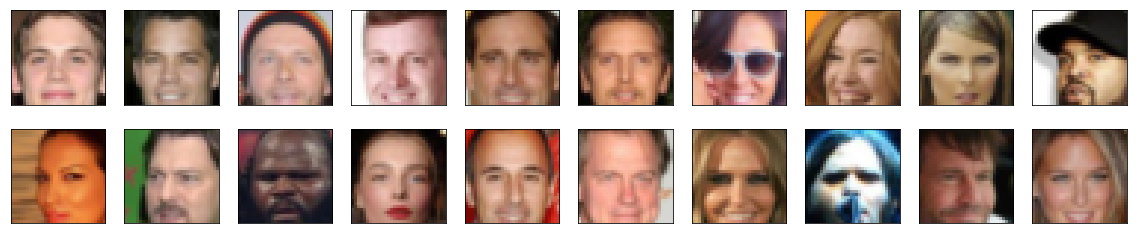

In [5]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

#### Exercise: Pre-process your image data and scale it to a pixel range of -1 to 1

You need to do a bit of pre-processing; you know that the output of a `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)

In [6]:
# TODO: Complete the scale function
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    min, max = feature_range
    x = x * (max - min) + min
    return x

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# check scaled range
# should be close to -1 to 1
img = images[0]
scaled_img = scale(img)

print('Min: ', scaled_img.min())
print('Max: ', scaled_img.max())

Min:  tensor(-0.9765)
Max:  tensor(0.9843)


---
# Define the Model

A GAN is comprised of two adversarial networks, a discriminator and a generator.

## Discriminator

Your first task will be to define the discriminator. This is a convolutional classifier like you've built before, only without any maxpooling layers. To deal with this complex data, it's suggested you use a deep network with **normalization**. You are also allowed to create any helper functions that may be useful.

#### Exercise: Complete the Discriminator class
* The inputs to the discriminator are 32x32x3 tensor images
* The output should be a single value that will indicate whether a given image is real or fake


In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
# helper conv function
def conv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True, dropout=False):
    """Creates a convolutional layer, with optional batch normalization.
    """
    layers = []
    conv_layer = nn.Conv2d(in_channels, out_channels, 
                           kernel_size, stride, padding, bias=False)
    
    # append conv layer
    layers.append(conv_layer)

    # append batchnorm layer
    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))
    
    #append dropout layer
    if dropout:
        layers.append(nn.Dropout(dropout))
 
    return nn.Sequential(*layers)

In [10]:
class Discriminator(nn.Module):

    def __init__(self, conv_dim):
        """
        Initialize the Discriminator Module
        :param conv_dim: The depth of the first convolutional layer
        """
        super(Discriminator, self).__init__()

        # complete init function
        self.conv_dim = conv_dim

        self.conv1 = conv(3, conv_dim, 4, batch_norm=False) 
        self.conv2 = conv(conv_dim, conv_dim*2, 4, dropout=0.2)
        self.conv3 = conv(conv_dim*2, conv_dim*4, 4, dropout=0.1)
        
        # fully-connected layer
        self.fc = nn.Linear(conv_dim*4*4*4, 1)
        
    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: Discriminator logits; the output of the neural network
        """
        # define feedforward behavior
        
        # leaky relu activation on all hidden layers
        out = F.leaky_relu(self.conv1(x), 0.2)
        out = F.leaky_relu(self.conv2(out), 0.2)
        out = F.leaky_relu(self.conv3(out), 0.2)
        
        # flatten
        out = out.view(-1, self.conv_dim*4*4*4)
        
        # final output layer
        out = self.fc(out)        
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(Discriminator)

Tests Passed


## Generator

The generator should upsample an input and generate a *new* image of the same size as our training data `32x32x3`. This should be mostly transpose convolutional layers with normalization applied to the outputs.

#### Exercise: Complete the Generator class
* The inputs to the generator are vectors of some length `z_size`
* The output should be a image of shape `32x32x3`

In [11]:
# helper deconv function
def deconv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True, dropout=False):
    """Creates a transposed-convolutional layer, with optional batch normalization.
    """
    # create a sequence of transpose + optional batch norm layers
    layers = []
    transpose_conv_layer = nn.ConvTranspose2d(in_channels, out_channels, 
                                              kernel_size, stride, padding, bias=False)
    # append transpose convolutional layer
    layers.append(transpose_conv_layer)
    
    # append batchnorm layer
    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))
    
    #append dropout layer
    if dropout:
        layers.append(nn.Dropout(dropout))
        
    return nn.Sequential(*layers)

In [12]:
class Generator(nn.Module):
    
    def __init__(self, z_size, conv_dim):
        """
        Initialize the Generator Module
        :param z_size: The length of the input latent vector, z
        :param conv_dim: The depth of the inputs to the *last* transpose convolutional layer
        """
        super(Generator, self).__init__()

        # complete init function
        self.conv_dim = conv_dim
        
        # first, fully-connected layer
        self.fc = nn.Linear(z_size, conv_dim*4*4*4)

        # transpose conv layers
        self.t_conv1 = deconv(conv_dim*4, conv_dim*2, 4, dropout=False)
        self.t_conv2 = deconv(conv_dim*2, conv_dim, 4, dropout=False)
        self.t_conv3 = deconv(conv_dim, 3, 4, batch_norm=False)
        
    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: A 32x32x3 Tensor image as output
        """
        # define feedforward behavior
        
        # fully-connected + reshape 
        out = self.fc(x)
        out = out.view(-1, self.conv_dim*4, 4, 4)
        
        # hidden transpose conv layers + relu
        out = F.relu(self.t_conv1(out))
        out = F.relu(self.t_conv2(out))
        
        # last layer + tanh activation
        out = self.t_conv3(out)
        out = F.tanh(out)
        
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(Generator)

Tests Passed


## Initialize the weights of your networks

To help your models converge, you should initialize the weights of the convolutional and linear layers in your model. From reading the [original DCGAN paper](https://arxiv.org/pdf/1511.06434.pdf), they say:
> All weights were initialized from a zero-centered Normal distribution with standard deviation 0.02.

So, your next task will be to define a weight initialization function that does just this!

You can refer back to the lesson on weight initialization or even consult existing model code, such as that from [the `networks.py` file in CycleGAN Github repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/models/networks.py) to help you complete this function.

#### Exercise: Complete the weight initialization function

* This should initialize only **convolutional** and **linear** layers
* Initialize the weights to a normal distribution, centered around 0, with a standard deviation of 0.02.
* The bias terms, if they exist, may be left alone or set to 0.

In [13]:
def weights_init_normal(m):
    """
    Applies initial weights to certain layers in a model .
    The weights are taken from a normal distribution 
    with mean = 0, std dev = 0.02.
    :param m: A module or layer in a network    
    """
    # classname will be something like:
    # `Conv`, `BatchNorm2d`, `Linear`, etc.
    classname = m.__class__.__name__
    
    # TODO: Apply initial weights to convolutional and linear layers
    if classname.find('Conv') != -1 or classname.find('Linear') != -1):
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)

## Build complete network

Define your models' hyperparameters and instantiate the discriminator and generator from the classes defined above. Make sure you've passed in the correct input arguments.

In [14]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
def build_network(d_conv_dim, g_conv_dim, z_size):
    # define discriminator and generator
    D = Discriminator(d_conv_dim)
    G = Generator(z_size=z_size, conv_dim=g_conv_dim)

    # initialize model weights
    D.apply(weights_init_normal)
    G.apply(weights_init_normal)

    print(D)
    print()
    print(G)
    
    return D, G


#### Exercise: Define model hyperparameters

In [15]:
# Define model hyperparams
d_conv_dim = 32
g_conv_dim = 32
z_size = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
D, G = build_network(d_conv_dim, g_conv_dim, z_size)

Discriminator(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.2)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.1)
  )
  (fc): Linear(in_features=2048, out_features=1, bias=True)
)

Generator(
  (fc): Linear(in_features=25, out_features=2048, bias=True)
  (t_conv1): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (t_conv2): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_s

### Training on GPU

Check if you can train on GPU. Here, we'll set this as a boolean variable `train_on_gpu`. Later, you'll be responsible for making sure that 
>* Models,
* Model inputs, and
* Loss function arguments

Are moved to GPU, where appropriate.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Training on GPU!')

Training on GPU!


---
## Discriminator and Generator Losses

Now we need to calculate the losses for both types of adversarial networks.

### Discriminator Losses

> * For the discriminator, the total loss is the sum of the losses for real and fake images, `d_loss = d_real_loss + d_fake_loss`. 
* Remember that we want the discriminator to output 1 for real images and 0 for fake images, so we need to set up the losses to reflect that.


### Generator Loss

The generator loss will look similar only with flipped labels. The generator's goal is to get the discriminator to *think* its generated images are *real*.

#### Exercise: Complete real and fake loss functions

**You may choose to use either cross entropy or a least squares error loss to complete the following `real_loss` and `fake_loss` functions.**

In [17]:
def real_loss(D_out, smooth=True):
    '''Calculates how close discriminator outputs are to being real.
       param, D_out: discriminator logits
       return: real loss'''    
    batch_size = D_out.size(0)
    #label smoothing
    if smooth:
        labels = torch.ones(batch_size)*0.85
    else:
        labels = torch.ones(batch_size) 

    if train_on_gpu:
        labels = labels.cuda()
        
    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(D_out.squeeze(), labels)
    return loss
    
def fake_loss(D_out):
    '''Calculates how close discriminator outputs are to being fake.
       param, D_out: discriminator logits
       return: fake loss'''
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size)
    
    if train_on_gpu:
        labels = labels.cuda()
        
    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(D_out.squeeze(), labels)
    return loss

## Optimizers

#### Exercise: Define optimizers for your Discriminator (D) and Generator (G)

Define optimizers for your models with appropriate hyperparameters.

In [18]:
import torch.optim as optim

# params
lr = 0.001
beta1=0.3
beta2=0.99

# Create optimizers for the discriminator D and generator G
d_optimizer = optim.Adam(D.parameters(), lr, [beta1, beta2])
g_optimizer = optim.Adam(G.parameters(), lr, [beta1, beta2])

---
## Training

Training will involve alternating between training the discriminator and the generator. You'll use your functions `real_loss` and `fake_loss` to help you calculate the discriminator losses.

* You should train the discriminator by alternating on real and fake images
* Then the generator, which tries to trick the discriminator and should have an opposing loss function


#### Saving Samples

You've been given some code to print out some loss statistics and save some generated "fake" samples.

#### Exercise: Complete the training function

Keep in mind that, if you've moved your models to GPU, you'll also have to move any model inputs to GPU.

In [19]:
def train(D, G, n_epochs, print_every=50):
    '''Trains adversarial networks for some number of epochs
       param, D: the discriminator network
       param, G: the generator network
       param, n_epochs: number of epochs to train for
       param, print_every: when to print and record the models' losses
       return: D and G losses'''
    
    # move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()

    # keep track of loss and generated, "fake" samples
    samples = []
    losses = []

    # Get some fixed data for sampling. These are images that are held
    # constant throughout training, and allow us to inspect the model's performance
    sample_size=100
    fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
    fixed_z = torch.from_numpy(fixed_z).float()
    # move z to GPU if available
    if train_on_gpu:
        fixed_z = fixed_z.cuda()

    # epoch training loop
    for epoch in range(n_epochs):

        # batch training loop
        for batch_i, (real_images, _) in enumerate(celeba_train_loader):

            batch_size = real_images.size(0)
            real_images = scale(real_images)

            # ===============================================
            #         YOUR CODE HERE: TRAIN THE NETWORKS
            # ===============================================
            
            d_optimizer.zero_grad()
        
            # Compute the discriminator losses on real images 
            if train_on_gpu:
                real_images = real_images.cuda()

            D_real = D(real_images)
            d_real_loss = real_loss(D_real)

            # Generate fake images
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()

            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)

            # Compute the discriminator losses on fake images            
            D_fake = D(fake_images)
            d_fake_loss = fake_loss(D_fake)

            # add up loss and perform backprop
            d_loss = d_real_loss + d_fake_loss
            d_loss.backward()
            d_optimizer.step()

            # =========================================
            #            TRAIN THE GENERATOR
            # =========================================
            g_optimizer.zero_grad()

            # Generate fake images
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)

            # Compute the discriminator losses on fake images 
            D_fake = D(fake_images)
            g_loss = real_loss(D_fake) 

            # perform backprop
            g_loss.backward()
            g_optimizer.step()
            
            # ===============================================
            #              END OF YOUR CODE
            # ===============================================

            # Print some loss stats
            if batch_i % print_every == 0:
                # append discriminator loss and generator loss
                losses.append((d_loss.item(), g_loss.item()))
                # print discriminator and generator loss
                print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                        epoch+1, n_epochs, d_loss.item(), g_loss.item()))


        ## AFTER EACH EPOCH##    
        # this code assumes your generator is named G, feel free to change the name
        # generate and save sample, fake images
        G.eval() # for generating samples
        samples_z = G(fixed_z)
        samples.append(samples_z)
        G.train() # back to training mode

    # Save training generator samples
    with open('train_samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    # finally return losses
    return losses

Set your number of training epochs and train your GAN!

In [20]:
# set number of epochs 
from workspace_utils import active_session

n_epochs = 30

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# call training function
with active_session():
    losses = train(D, G, n_epochs=n_epochs)

Epoch [    1/   30] | d_loss: 1.5676 | g_loss: 1.8198
Epoch [    1/   30] | d_loss: 1.2118 | g_loss: 1.2106
Epoch [    1/   30] | d_loss: 1.3205 | g_loss: 1.0148
Epoch [    1/   30] | d_loss: 1.3382 | g_loss: 1.0064
Epoch [    1/   30] | d_loss: 1.2957 | g_loss: 1.1599
Epoch [    1/   30] | d_loss: 1.3360 | g_loss: 1.4363
Epoch [    1/   30] | d_loss: 1.2231 | g_loss: 0.9197
Epoch [    1/   30] | d_loss: 1.3819 | g_loss: 0.9922
Epoch [    1/   30] | d_loss: 1.3320 | g_loss: 1.0207
Epoch [    1/   30] | d_loss: 1.2761 | g_loss: 1.1235
Epoch [    1/   30] | d_loss: 1.3724 | g_loss: 1.1032
Epoch [    1/   30] | d_loss: 1.2390 | g_loss: 0.9855
Epoch [    1/   30] | d_loss: 1.3461 | g_loss: 1.0485
Epoch [    1/   30] | d_loss: 1.4198 | g_loss: 0.8299
Epoch [    1/   30] | d_loss: 1.3431 | g_loss: 1.0040
Epoch [    1/   30] | d_loss: 1.5096 | g_loss: 1.4832
Epoch [    1/   30] | d_loss: 1.3105 | g_loss: 1.1806
Epoch [    1/   30] | d_loss: 1.4296 | g_loss: 1.3166
Epoch [    1/   30] | d_loss

Epoch [    6/   30] | d_loss: 1.1756 | g_loss: 1.2484
Epoch [    6/   30] | d_loss: 1.1262 | g_loss: 1.5940
Epoch [    6/   30] | d_loss: 1.3635 | g_loss: 1.2083
Epoch [    6/   30] | d_loss: 1.3242 | g_loss: 1.1767
Epoch [    6/   30] | d_loss: 1.0996 | g_loss: 1.0290
Epoch [    6/   30] | d_loss: 1.0367 | g_loss: 1.2198
Epoch [    6/   30] | d_loss: 1.1445 | g_loss: 1.0958
Epoch [    6/   30] | d_loss: 1.1667 | g_loss: 1.1195
Epoch [    6/   30] | d_loss: 1.2107 | g_loss: 1.3078
Epoch [    6/   30] | d_loss: 1.2183 | g_loss: 1.1104
Epoch [    6/   30] | d_loss: 1.2263 | g_loss: 1.1104
Epoch [    6/   30] | d_loss: 1.3033 | g_loss: 1.4539
Epoch [    6/   30] | d_loss: 1.1104 | g_loss: 1.2189
Epoch [    6/   30] | d_loss: 1.0540 | g_loss: 1.3276
Epoch [    6/   30] | d_loss: 1.1370 | g_loss: 1.4517
Epoch [    6/   30] | d_loss: 1.1631 | g_loss: 1.2405
Epoch [    6/   30] | d_loss: 1.1312 | g_loss: 1.5718
Epoch [    6/   30] | d_loss: 1.1459 | g_loss: 1.1477
Epoch [    6/   30] | d_loss

Epoch [   11/   30] | d_loss: 1.2192 | g_loss: 1.0520
Epoch [   11/   30] | d_loss: 1.0594 | g_loss: 1.1609
Epoch [   11/   30] | d_loss: 1.0452 | g_loss: 0.8892
Epoch [   11/   30] | d_loss: 1.2731 | g_loss: 1.1989
Epoch [   11/   30] | d_loss: 0.9690 | g_loss: 1.4258
Epoch [   11/   30] | d_loss: 1.1347 | g_loss: 1.4930
Epoch [   11/   30] | d_loss: 0.9019 | g_loss: 1.4038
Epoch [   11/   30] | d_loss: 1.2348 | g_loss: 1.0294
Epoch [   11/   30] | d_loss: 1.0972 | g_loss: 1.0981
Epoch [   11/   30] | d_loss: 0.9056 | g_loss: 1.2321
Epoch [   11/   30] | d_loss: 1.1493 | g_loss: 1.0164
Epoch [   11/   30] | d_loss: 1.1325 | g_loss: 1.1624
Epoch [   11/   30] | d_loss: 1.1453 | g_loss: 1.4692
Epoch [   11/   30] | d_loss: 1.2063 | g_loss: 1.0384
Epoch [   11/   30] | d_loss: 1.0696 | g_loss: 1.3259
Epoch [   12/   30] | d_loss: 1.4085 | g_loss: 1.9314
Epoch [   12/   30] | d_loss: 1.0962 | g_loss: 1.2624
Epoch [   12/   30] | d_loss: 1.0470 | g_loss: 1.6746
Epoch [   12/   30] | d_loss

Epoch [   16/   30] | d_loss: 1.0256 | g_loss: 1.2370
Epoch [   16/   30] | d_loss: 0.9906 | g_loss: 1.2590
Epoch [   16/   30] | d_loss: 0.9261 | g_loss: 1.8690
Epoch [   16/   30] | d_loss: 0.8004 | g_loss: 2.0469
Epoch [   16/   30] | d_loss: 0.9203 | g_loss: 1.6507
Epoch [   16/   30] | d_loss: 1.0989 | g_loss: 1.7100
Epoch [   16/   30] | d_loss: 1.2090 | g_loss: 1.1903
Epoch [   16/   30] | d_loss: 0.9363 | g_loss: 1.6896
Epoch [   17/   30] | d_loss: 1.2175 | g_loss: 1.2313
Epoch [   17/   30] | d_loss: 1.1590 | g_loss: 1.2929
Epoch [   17/   30] | d_loss: 1.2214 | g_loss: 1.0752
Epoch [   17/   30] | d_loss: 1.0685 | g_loss: 1.8262
Epoch [   17/   30] | d_loss: 1.2386 | g_loss: 1.2541
Epoch [   17/   30] | d_loss: 0.9934 | g_loss: 1.8081
Epoch [   17/   30] | d_loss: 0.9620 | g_loss: 1.7857
Epoch [   17/   30] | d_loss: 1.0527 | g_loss: 1.6375
Epoch [   17/   30] | d_loss: 0.9543 | g_loss: 1.5739
Epoch [   17/   30] | d_loss: 1.1965 | g_loss: 1.0549
Epoch [   17/   30] | d_loss

Epoch [   21/   30] | d_loss: 0.9567 | g_loss: 1.6327
Epoch [   22/   30] | d_loss: 0.8518 | g_loss: 1.5022
Epoch [   22/   30] | d_loss: 1.0249 | g_loss: 1.2545
Epoch [   22/   30] | d_loss: 1.0886 | g_loss: 1.1776
Epoch [   22/   30] | d_loss: 0.8546 | g_loss: 1.8375
Epoch [   22/   30] | d_loss: 1.3058 | g_loss: 2.0402
Epoch [   22/   30] | d_loss: 0.9406 | g_loss: 1.4312
Epoch [   22/   30] | d_loss: 1.0896 | g_loss: 2.1398
Epoch [   22/   30] | d_loss: 0.9451 | g_loss: 1.8012
Epoch [   22/   30] | d_loss: 1.0960 | g_loss: 1.2189
Epoch [   22/   30] | d_loss: 0.9997 | g_loss: 1.4769
Epoch [   22/   30] | d_loss: 1.0183 | g_loss: 1.2244
Epoch [   22/   30] | d_loss: 0.9061 | g_loss: 1.3280
Epoch [   22/   30] | d_loss: 1.0299 | g_loss: 1.4985
Epoch [   22/   30] | d_loss: 1.0063 | g_loss: 2.0507
Epoch [   22/   30] | d_loss: 1.0480 | g_loss: 1.8971
Epoch [   22/   30] | d_loss: 1.1872 | g_loss: 1.7176
Epoch [   22/   30] | d_loss: 0.9421 | g_loss: 1.7578
Epoch [   22/   30] | d_loss

Epoch [   27/   30] | d_loss: 0.7647 | g_loss: 1.7114
Epoch [   27/   30] | d_loss: 1.0503 | g_loss: 1.7322
Epoch [   27/   30] | d_loss: 0.9213 | g_loss: 1.7613
Epoch [   27/   30] | d_loss: 0.9609 | g_loss: 1.4050
Epoch [   27/   30] | d_loss: 1.7651 | g_loss: 3.3032
Epoch [   27/   30] | d_loss: 1.0904 | g_loss: 1.5000
Epoch [   27/   30] | d_loss: 1.0140 | g_loss: 1.3207
Epoch [   27/   30] | d_loss: 0.8595 | g_loss: 1.8828
Epoch [   27/   30] | d_loss: 1.1125 | g_loss: 1.5630
Epoch [   27/   30] | d_loss: 1.1347 | g_loss: 1.2960
Epoch [   27/   30] | d_loss: 0.9369 | g_loss: 2.3836
Epoch [   27/   30] | d_loss: 0.8519 | g_loss: 2.2670
Epoch [   27/   30] | d_loss: 0.9631 | g_loss: 1.4218
Epoch [   27/   30] | d_loss: 0.9186 | g_loss: 1.9854
Epoch [   27/   30] | d_loss: 0.8315 | g_loss: 2.4768
Epoch [   27/   30] | d_loss: 1.2274 | g_loss: 1.9975
Epoch [   27/   30] | d_loss: 1.0517 | g_loss: 1.2410
Epoch [   27/   30] | d_loss: 1.0492 | g_loss: 1.5678
Epoch [   27/   30] | d_loss

## Training loss

Plot the training losses for the generator and discriminator, recorded after each epoch.

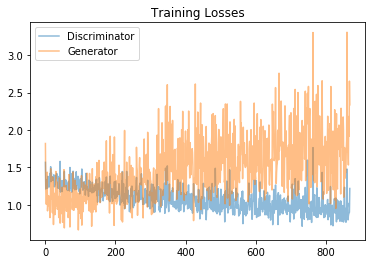

In [21]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## Generator samples from training

View samples of images from the generator, and answer a question about the strengths and weaknesses of your trained models.

In [3]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(100,90), nrows=10, ncols=10, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((32,32,3)))

In [4]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

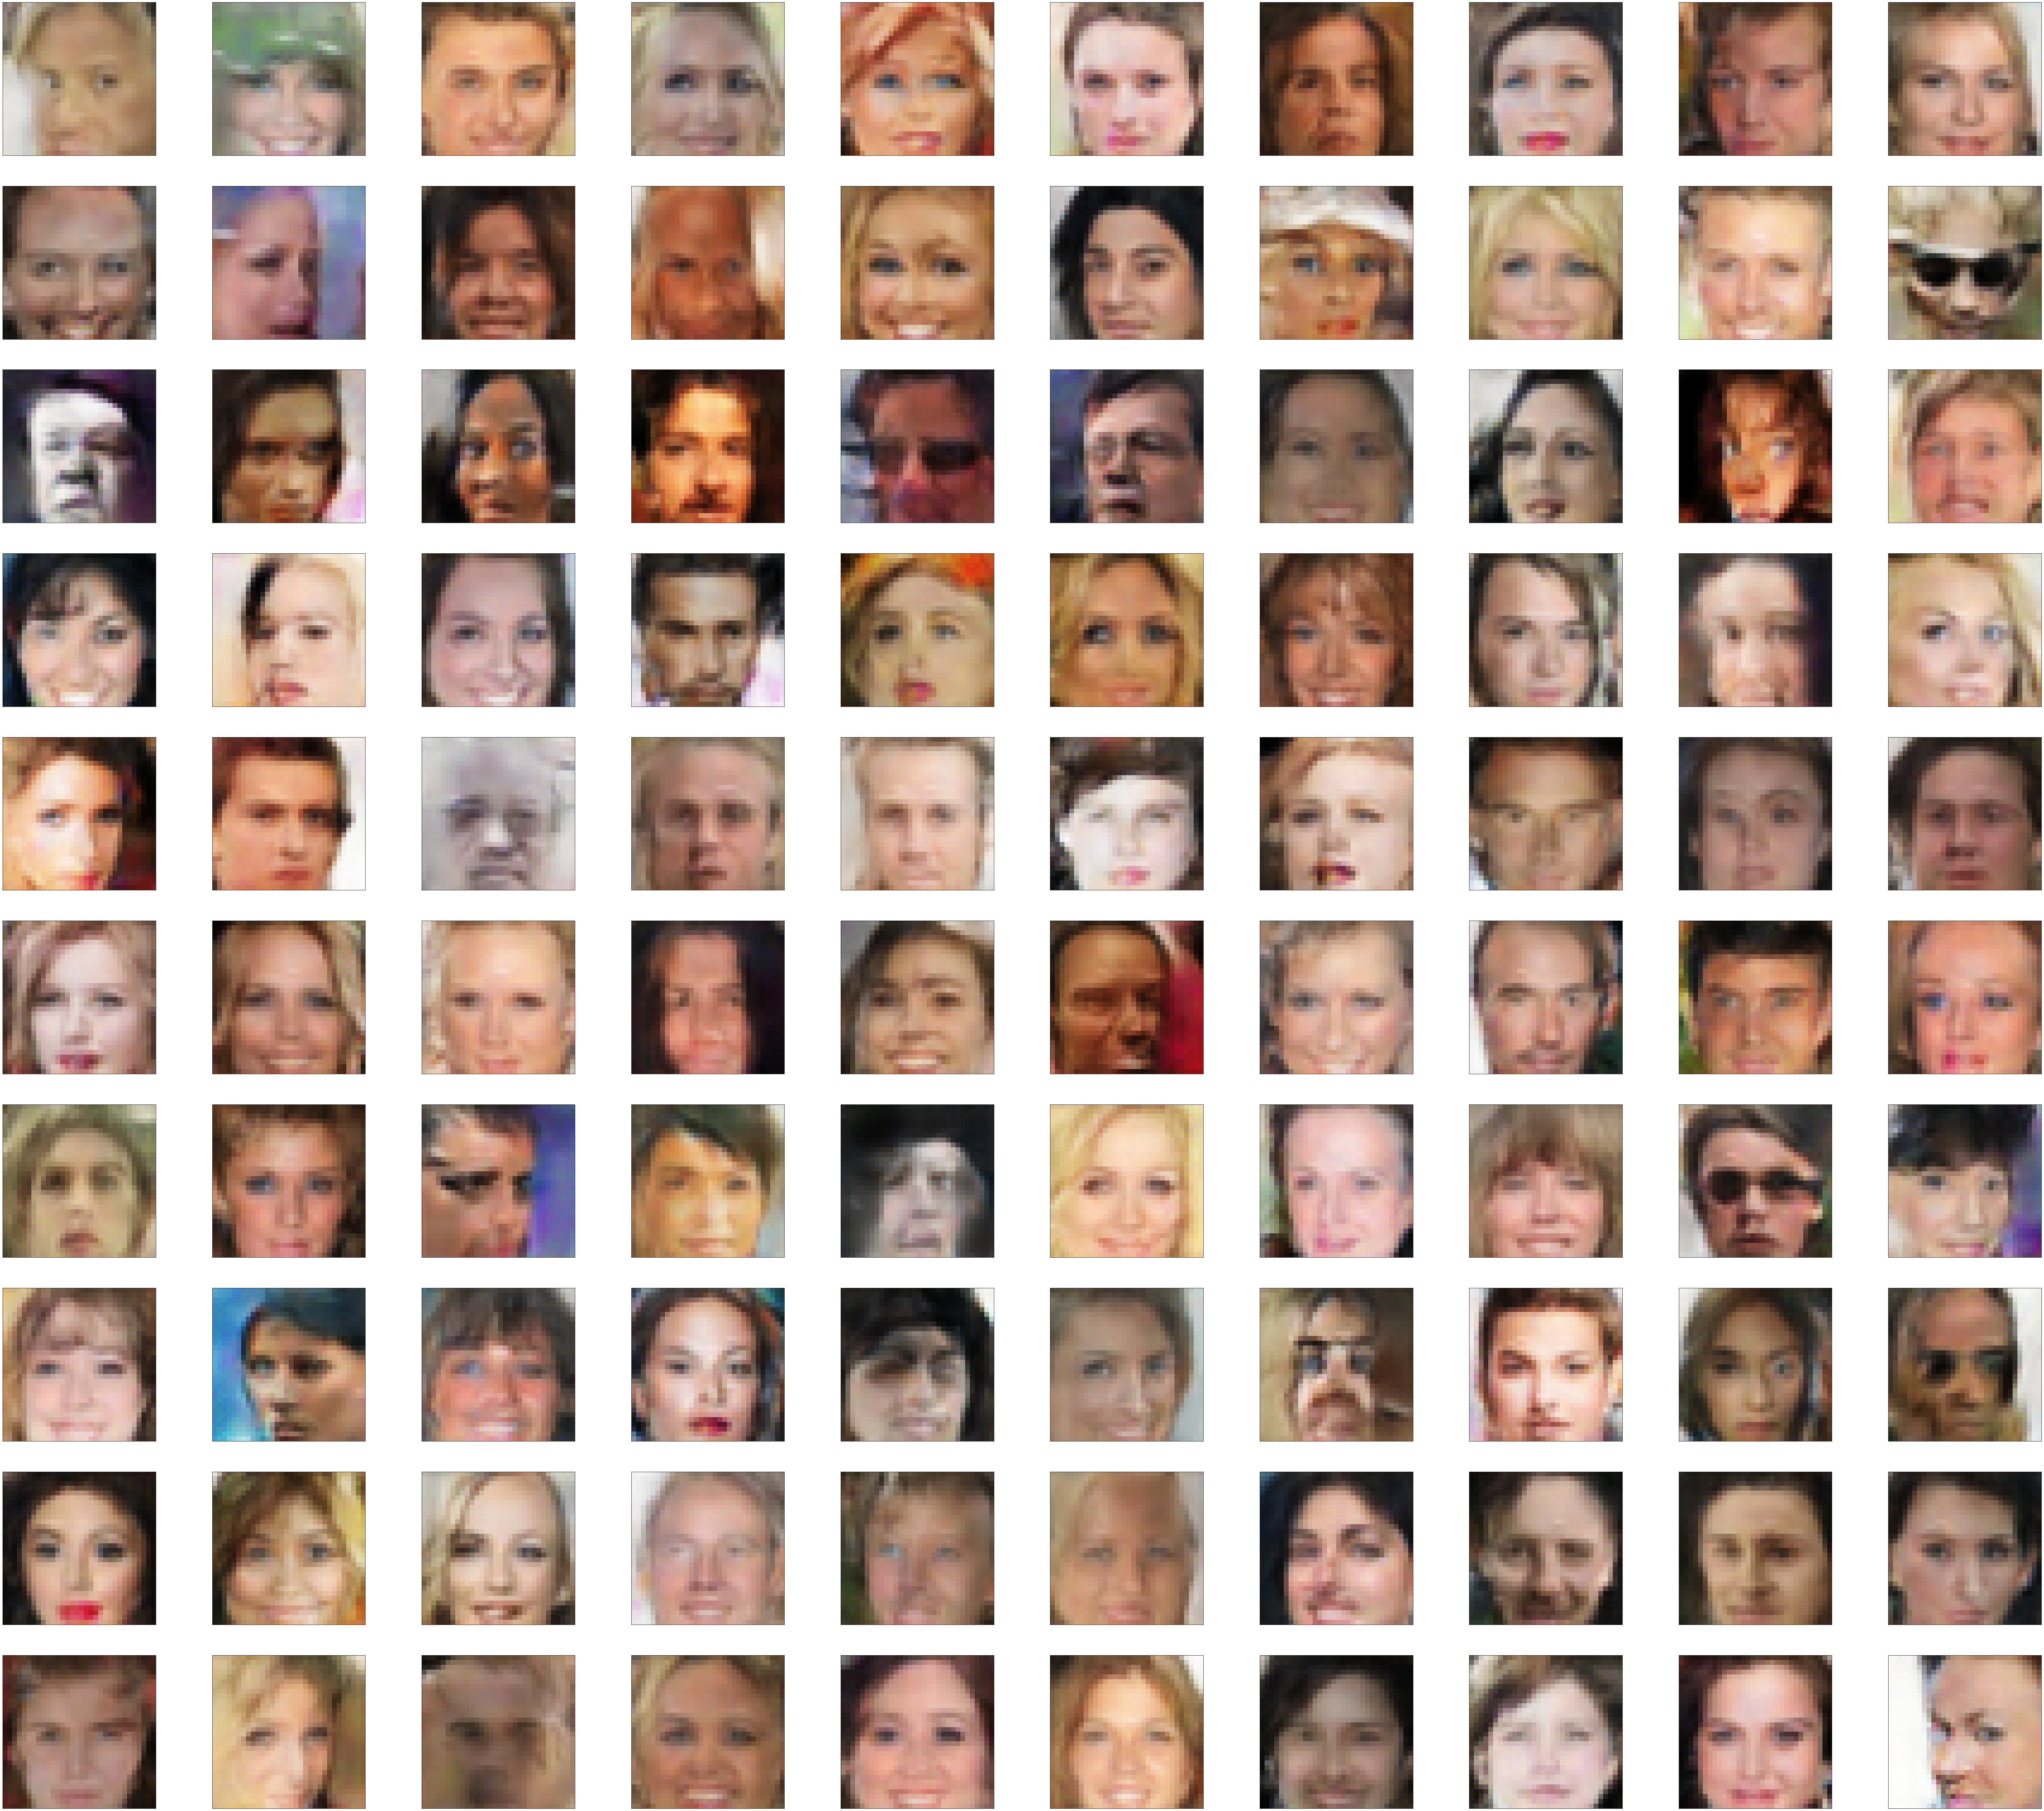

In [5]:
_ = view_samples(-1, samples)

### Question: What do you notice about your generated samples and how might you improve this model?
When you answer this question, consider the following factors:
* The dataset is biased; it is made of "celebrity" faces that are mostly white
* Model size; larger models have the opportunity to learn more features in a data feature space
* Optimization strategy; optimizers and number of epochs affect your final result


**Answer:**

It is possible to identify different parts of faces but also there are some artifacts when different textures overlaps or some shapes gets uniformal.

To improve model will need:
- Training model with bigger resolution images would make it reasonable to increase number of layers in CNN.
- Increase number of images using different shapes and colors faces.
- Implement grid search to find the best parameters for normalization, experiment with different optimization algorithm like Adamax or Adagrad.



### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "problem_unittests.py" files in your submission.